# Added Data Dictionary:
- 'start_date_converted' = the original 'start_date' column was in *Excel serial date numbers*; this column is in datetime Y-m-d format


## -----------------------------------------------------------------------------------------------

## Notes:
- 7.5% of schools are completely missing all their 'overall_rating' data, in this EDA notebook
- 1,766 schools present in this dataset (1,901 exist in SchoolLocationData_EDA; 135 difference)
- all together, 268/1,901 schools are either completely missing or are missing key metrics in this analysis (14.1%)

'bn' (building number) = 'building_code', in SchoolLocationData_EDA
* K = Brooklyn
* M = Manhattan
* Q = Queens
* R = Staten Island (Richmond)
* X = The Bronx

'overall_rating' codes: (according to Claude Haiku)
- O = Operationally Sound (the highest rating - school is functioning well)
- P = Proficient (good performance)
- U = Underdeveloped (needs improvement)
- D = Developing (in progress, showing some improvement)
- WD = Well Developed (strong performance)
- DYO = Demonstrates Year-to-Year Improvement (or similar progress indicator)
- UPF = Possibly "Underperforming" or a specific category
- UD = Underdeveloped (or similar, possibly a variant)

'overall_rating' codes: (according to Gemini)
- Rubric Ratings:
- WD = Well Developed (highest rating)
- P = Proficent
- D = Developing
- U = Underdeveloped (lowest rating)
- . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
- Overall/Legacy School Rating:
- O = Outstanding (The highest overall rating a school could receive in the older Progress Report system [e.g., 2007–2010])
- . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
- Data/Exclusion Codes:
- UD = U = Unsatisfactory Development
- DYO = Do Your Own (Often used in data models where a school's result was too statistically small to generate a reliable comparative score, indicating a school should use internal data for assessment)
- UPF = U = Underperforming or Unsatisfactory Progress/Fail (A generic placeholder for a failing/non-performing result, or a data-specific null value)

# Setup:

In [53]:
#!pip install sodapy

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sodapy import Socrata

import matplotlib.pyplot as plt
import numpy as np

#import os

#MyAppToken= os.getenv("MyAppToken")
#USERNAME = os.getenv("USERNAME")
#PASSWORD = os.getenv("PASSWORD")

In [54]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)


#client = Socrata('data.cityofnewyork.us',
#                 MyAppToken,
#                 username=USERNAME,
#                 password=PASSWORD)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("3wfy-sn5g", limit=10000)

#results_df = pd.DataFrame.from_records(results)
#results_df.to_csv('QualityReviewRatings.csv', index=False)

In [55]:
results_df = pd.read_csv('data/QualityReviewRatings.csv')

In [56]:
results_df.shape    # actually 9,008 rows, last row is just a label

(9009, 45)

In [57]:
results_df.sample(10)

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5
4273,Q091,2010-11,40679.0,P,WD,WD,WD,WD,No Data,No Data,No Data,No Data,P,P,D,P,No Data,No Data,No Data,No Data,P,P,P,P,No Data,No Data,No Data,No Data,No Data,WD,P,P,P,No Data,No Data,No Data,No Data,P,D,P,D,No Data,No Data,No Data,No Data
4819,K305,2011-12,41060.0,P,D,P,P,P,No Data,No Data,No Data,No Data,P,P,P,D,No Data,No Data,No Data,No Data,P,P,P,P,No Data,No Data,No Data,No Data,No Data,P,P,P,P,No Data,No Data,No Data,No Data,P,P,P,P,No Data,No Data,No Data,No Data
4193,K396,2010-11,40637.0,UD,U,U,D,P,No Data,No Data,No Data,No Data,U,U,U,D,No Data,No Data,No Data,No Data,D,D,U,D,No Data,No Data,No Data,No Data,No Data,U,D,U,D,No Data,No Data,No Data,No Data,U,U,U,U,No Data,No Data,No Data,No Data
7008,X314,2014-15,42138.0,No Data,P,D,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,D,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
3007,K403,2008-09,39790.0,UPF,P,UPF,P,P,No Data,No Data,No Data,P,UPF,P,P,P,No Data,No Data,No Data,P,UPF,UPF,P,P,No Data,No Data,No Data,No Data,UPF,UPF,P,P,P,No Data,No Data,No Data,P,UPF,UPF,P,P,No Data,No Data,No Data,UPF
8843,K211,2019-20,43762.0,No Data,WD,P,WD,D,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,P,P,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data
7253,K030,2015-16,42409.0,No Data,WD,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
465,M322,2006-07,39062.0,P,P,P,P,P,No Data,No Data,No Data,P,P,P,P,P,P,No Data,No Data,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,No Data,No Data,No Data,P
278,X415,2006-07,39029.0,P,WD,WD,WD,P,No Data,No Data,No Data,WD,P,P,WD,P,P,No Data,No Data,P,WD,P,WD,P,WD,P,WD,P,P,P,P,WD,P,WD,WD,WD,WD,WD,P,WD,P,No Data,No Data,No Data,P
2042,K257,2007-08,39482.0,WD,WD,WD,WD,P,WD,WD,WD,WD,WD,WD,WD,WD,P,WD,WD,WD,WD,O,WD,WD,WD,WD,WD,No Data,WD,WD,WD,WD,WD,WD,WD,O,WD,WD,WD,WD,WD,WD,WD,O,WD


In [58]:
results_df['start_date'].sort_values()

0       38810.0
1       38810.0
2       38810.0
4       38812.0
5       38812.0
6       38812.0
7       38812.0
10      38814.0
9       38814.0
11      38814.0
8       38814.0
12      38817.0
13      38831.0
15      38831.0
16      38831.0
18      38831.0
19      38831.0
22      38833.0
20      38833.0
21      38833.0
23      38833.0
28      38835.0
27      38835.0
24      38835.0
26      38835.0
29      38838.0
35      38839.0
32      38839.0
33      38839.0
34      38839.0
36      38839.0
37      38839.0
44      38845.0
43      38845.0
42      38845.0
41      38845.0
40      38845.0
38      38845.0
39      38845.0
47      38847.0
48      38847.0
49      38847.0
50      38847.0
51      38847.0
45      38847.0
46      38847.0
52      38848.0
56      38852.0
54      38852.0
55      38852.0
59      38852.0
58      38852.0
57      38852.0
53      38852.0
60      38853.0
66      38854.0
61      38854.0
62      38854.0
63      38854.0
64      38854.0
65      38854.0
68      38854.0
75      

# Data cleaning and engineering:

In [59]:
# Convert Excel serial date numbers to datetime
results_df['start_date_converted'] = pd.to_datetime(results_df['start_date'], unit='D', origin='1900-01-01')

results_df[['bn', 'start_date_converted', 'overall_rating']].sample(15)

,bn,start_date_converted,overall_rating
4471,K091,2011-12-17,D
2361,X331,2008-03-29,WD
2543,M057,2008-05-07,WD
336,X130,2006-11-22,WD
2110,K489,2008-02-15,P
4818,X439,2012-06-01,P
5410,K185,2013-12-04,WD
5846,K003,2014-11-05,No Data
206,X047,2006-10-26,WD
7547,M019,2016-10-22,No Data


In [60]:
# Drop the last row (the 'All Quality Review Ratings from 2005 to 2020' label row)
results_df = results_df.drop(results_df.index[-1])

print(f"New shape: {results_df.shape}")

New shape: (9008, 46)


In [61]:
# re-sort by 'bn' and 'start_date_converted' to see trends over time for each school
results_df = results_df.sort_values(by=['start_date_converted'])
results_df[['bn', 'start_date_converted', 'overall_rating']][100:150]

,bn,start_date_converted,overall_rating
111,K061,2006-09-27,WD
112,K161,2006-09-27,WD
118,K539,2006-09-27,P
113,K189,2006-09-27,WD
117,K312,2006-09-27,WD
116,K251,2006-09-27,WD
120,K625,2006-09-27,P
114,K198,2006-09-27,P
115,K208,2006-09-27,WD
121,K246,2006-09-28,P


In [62]:
# Find 'bn' value that starts with lowercase 'q' and 'k'
#lowercase_q = results_df[results_df['bn'].str[0] == 'q']
#lowercase_k = results_df[results_df['bn'].str[0] == 'k']

# Fix them by converting to uppercase
results_df.loc[results_df['bn'].str[0] == 'q', 'bn'] = results_df.loc[results_df['bn'].str[0] == 'q', 'bn'].str.upper()
results_df.loc[results_df['bn'].str[0] == 'k', 'bn'] = results_df.loc[results_df['bn'].str[0] == 'k', 'bn'].str.upper()

## -----------------------------------------------------------------------------------------------
# Imporant Sets/Rating Values:

In [63]:
bn_boroughs = ['K', 'M', 'Q', 'R', 'X']

In [64]:
# 8 = best; 1 = worst; 1 = Do Your Own value; 0 = No Data
ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}

## -----------------------------------------------------------------------------------------------

In [65]:
all_grouped = results_df.groupby('bn').agg(
    data_pts = ('bn', 'count'),
    missing_overall_rating = ('overall_rating', lambda x: x.isin(['No Data']).sum()),
    first_review_date = ('start_date_converted', 'min'),
    last_review_date = ('start_date_converted', 'max')
)

all_grouped.head(20)

,data_pts,missing_overall_rating,first_review_date,last_review_date
bn,,,,
K001,5,2,2007-02-07,2017-01-26
K002,6,2,2006-10-13,2019-04-14
K003,6,2,2007-02-28,2017-01-06
K004,6,2,2007-02-08,2017-12-15
K005,6,2,2007-02-28,2019-10-31
K006,5,2,2007-04-22,2020-01-17
K007,5,2,2007-05-27,2017-02-09
K008,7,2,2007-02-09,2019-01-19
K009,6,2,2007-04-18,2017-01-07


In [66]:
results_df.columns

Index(['bn', 'school_year', 'start_date', 'overall_rating', 'indicator_1_1',
       'indicator_1_2', 'indicator_1_3', 'indicator_1_4', 'indicator_1_5',
       'indicator_1_6', 'indicator_1_7', 'indicatoroverall_1', 'indicator_2_1',
       'indicator_2_2', 'indicator_2_3', 'indicator_2_4', 'indicator_2_5',
       'indicator_2_6', 'indicator_2_7', 'indicatoroverall_2', 'indicator_3_1',
       'indicator_3_2', 'indicator_3_3', 'indicator_3_4', 'indicator_3_5',
       'indicator_3_6', 'indicator_3_7', 'indicator_3_8', 'indicatoroverall_3',
       'indicator_4_1', 'indicator_4_2', 'indicator_4_3', 'indicator_4_4',
       'indicator_4_5', 'indicator_4_6', 'indicator_4_7', 'indicatoroverall_4',
       'indicator_5_1', 'indicator_5_2', 'indicator_5_3', 'indicator_5_4',
       'indicator_5_5', 'indicator_5_6', 'indicator_5_7', 'indicatoroverall_5',
       'start_date_converted'],
      dtype='object')

In [67]:
# group by borough (beginning letter of 'bn')
boroughs_grouped = results_df[results_df['bn'].str[0].isin(bn_boroughs)].groupby(results_df['bn'].str[0]).agg(
    data_pts = ('bn', 'count'),
    missing_overall_rating = ('overall_rating', lambda x: x.isin(['No Data']).sum()),
    num_schools = ('bn', lambda x: x.nunique()),
    # line below creates a dictionary of boroughs' schools and a 2D list of their ratings and year the ratings were given
    bn_ratings_dict = ('overall_rating', lambda x: {bn: results_df.loc[results_df['bn'] == bn, ['overall_rating', 'start_date_converted']].values.tolist() for bn in results_df.loc[x.index, 'bn'].unique()})
).rename_axis('borough')

boroughs_grouped

,data_pts,missing_overall_rating,num_schools,bn_ratings_dict
borough,,,,
K,2794,941,543,"{'K544': [['P', 2006-04-12 00:00:00], ['P', 20..."
M,1729,607,340,"{'M307': [['P', 2006-04-05 00:00:00], ['WD', 2..."
Q,1861,688,370,"{'Q263': [['WD', 2006-04-26 00:00:00], ['DYO',..."
R,402,135,77,"{'R035': [['WD', 2006-05-18 00:00:00], ['P', 2..."
X,2222,809,432,"{'X231': [['P', 2006-04-28 00:00:00], ['P', 20..."


In [68]:
# Adding totals row
boroughs_totals = boroughs_grouped.copy()
# Sum only numeric columns, leave dictionary column as empty dict for totals row
totals_row = boroughs_grouped[['data_pts', 'missing_overall_rating', 'num_schools']].sum()
totals_row['bn_ratings_dict'] = {}
boroughs_totals.loc['Total'] = totals_row
boroughs_totals

,data_pts,missing_overall_rating,num_schools,bn_ratings_dict
borough,,,,
K,2794,941,543,"{'K544': [['P', 2006-04-12 00:00:00], ['P', 20..."
M,1729,607,340,"{'M307': [['P', 2006-04-05 00:00:00], ['WD', 2..."
Q,1861,688,370,"{'Q263': [['WD', 2006-04-26 00:00:00], ['DYO',..."
R,402,135,77,"{'R035': [['WD', 2006-05-18 00:00:00], ['P', 2..."
X,2222,809,432,"{'X231': [['P', 2006-04-28 00:00:00], ['P', 20..."
Total,9008,3180,1762,{}


In [69]:
results_df[results_df['bn'].str[0] == 'K'].sort_values(by='start_date_converted')[['bn', 'overall_rating', 'start_date_converted']].head()

,bn,overall_rating,start_date_converted
12,K544,P,2006-04-12
13,K337,P,2006-04-26
15,K685,WD,2006-04-26
20,K524,P,2006-04-28
21,K533,P,2006-04-28


## Note:
- was expecting 1,766 schools, not 1,762
-
- *bn_ratings_dict:* in order of start_date_converted
-
- Q: Should they be in alpha/numerical order?

# Dictionaries of Schools' Average QR Scores by Borough:

In [70]:
# creating dictionary of Brooklyn schools:
K_schools_dict = boroughs_grouped.loc['K', 'bn_ratings_dict']
K_schools_dict



{'K544': [['P', Timestamp('2006-04-12 00:00:00')],
  ['P', Timestamp('2007-04-28 00:00:00')],
  ['WD', Timestamp('2008-03-15 00:00:00')],
  ['P', Timestamp('2010-02-10 00:00:00')],
  ['No Data', Timestamp('2014-12-03 00:00:00')]],
 'K337': [['P', Timestamp('2006-04-26 00:00:00')],
  ['DYO', Timestamp('2007-05-23 00:00:00')],
  ['WD', Timestamp('2008-05-15 00:00:00')],
  ['WD', Timestamp('2009-05-02 00:00:00')],
  ['D', Timestamp('2012-03-28 00:00:00')],
  ['P', Timestamp('2013-12-06 00:00:00')],
  ['No Data', Timestamp('2015-02-27 00:00:00')],
  ['No Data', Timestamp('2017-10-21 00:00:00')]],
 'K685': [['WD', Timestamp('2006-04-26 00:00:00')],
  ['DYO', Timestamp('2007-05-25 00:00:00')],
  ['WD', Timestamp('2008-05-16 00:00:00')],
  ['No Data', Timestamp('2015-04-23 00:00:00')],
  ['No Data', Timestamp('2019-04-06 00:00:00')]],
 'K524': [['P', Timestamp('2006-04-28 00:00:00')],
  ['DYO', Timestamp('2007-05-24 00:00:00')],
  ['WD', Timestamp('2008-05-31 00:00:00')],
  ['P', Timestamp('2

# Functions:

In [128]:
def sep_2D_list_to_lists(borough_dict):
    ''' Transforms the 2D list of ratings and dates in the borough_dict into two separate lists;
        one for ratings, one for dates.
        Input:
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...}, 'K400': [['P', '2019-03-20'], ...], ...}
        Output:
        * transformed_dict - Dictionary of single borough's school overall Quality Review ratings, with 2D list transformed into two separate lists:
            {'K336': { 'ratings': ['P', 'P', ...], 'dates': ['2020-01-15', '2018-06-10', ...]}, ...}
    '''

    transformed_dict = {}
    
    for bn, twoD_list in borough_dict.items():
        ratings = [item[0] for item in twoD_list]
        dates = [item[1] for item in twoD_list]
        transformed_dict[bn] = [ratings, dates]

    return transformed_dict


def convert_to_avg_ratings(borough_dict, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):
    ''' Converts the borough_dict's 2D list of ratings and dates into average ratings based on the latest date for each school.
        Input:
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...}, 'K400': [['P', '2019-03-20'], ...], ...}
        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for averaging:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}
        Output:
        * avg_ratings_dict - Dictionary of single borough's school average Quality Review ratings and their latest review date, eg. {'K336': [6.0, '2020-01-15', 'K400': [6.0, ...}
    '''

    borough_dict = sep_2D_list_to_lists(borough_dict)

    avg_ratings_dict = {}

    for bn, twoD_list in borough_dict.items():

        # drop non-date entries from date list:
        twoD_list[1] = [date for date in twoD_list[1] if isinstance(date, pd.Timestamp)]

        # Sort the dict by date in descending order to get the latest date first
        sorted_list = sorted(twoD_list[1], reverse=True)
        latest_date = sorted_list[0]
        
        # Convert ratings to numerical values and calculate average
        numeric_ratings = [ratings_rank[rating] for rating in twoD_list[0]]
        avg_rating = np.mean(numeric_ratings) if numeric_ratings else 0
        avg_ratings_dict[bn] = [avg_rating, latest_date]

    return avg_ratings_dict



def barplot_borough_avgs_by_location(avg_ratings_dict, all_schools, location_type):
    ''' Inputs: 
        * avg_ratings_dict - Dictionary of single borough's school's average overall Quality Review ratings, eg. {'K544': [5.0, Timestamp('2014-12-03 00:00:00')],'K337': [4.0, Timestamp('2017-10-21 00:00:00')], ...}
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': ['P', 'P', 'P', 'D'], 'K400': ['P'], ...}
            Frame ex -->[ 'bn' : [avg_rating, latest_date] ]

        * all_schools - data from SchoolLocationData, containing 'bn'/'Location Code' and associated 'Zip',	'Census Tract', and 'Community District'

        * location_type - string specifying which location type to group by: 'Zip', 'Census Tract', or 'Community District'

        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for plotting:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}

        Output: 
        * barplots of school overall Quality Review ratings for each specified location type
    '''

    # Create a DataFrame from the borough_dict
    borough_df = pd.DataFrame(list(avg_ratings_dict.items()), columns=['bn', 'twoD_list'])

    print(borough_df.head())

    # separating the 2D list into two separate lists: one for ratings, one for dates
    borough_df['avg_ratings_numeric'] = borough_df['twoD_list'].apply(
        lambda x: x[0]
    )
    borough_df['latest_review_date'] = borough_df['twoD_list'].apply(
        lambda x: x[1]
    )

    # Merge with all_schools to get location info
    merged_df = pd.merge(borough_df, all_schools, on='bn', how='left')

    # Plotting the data by making separate plots for each cluster within the location_type, i.e. separate plots for each Zip code if location_type='Zip'

    unique_locations = merged_df[location_type].unique()

    for loc in unique_locations:
        if pd.notna(loc):
            loc_df = merged_df[merged_df[location_type] == loc]
            plt.figure(figsize=(20, 12))
            plt.bar(loc_df['bn'], loc_df['avg_ratings_numeric'])
            plt.xlabel('School BN')
            plt.ylabel('Average Overall Rating (Numeric)')
            plt.title(f'School Overall Quality Review Ratings for {location_type} {loc}')
            plt.xticks(rotation=90)
            plt.legend()
            plt.tight_layout()
            plt.show()





def barplot_borough_schools_by_yr(borough_dict, all_schools, start_year, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):
    ''' Inputs: 
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': ['P', 'P', 'P', 'D'], 'K400': ['P'], ...}.     # CHANGED DICT TO INCLUDE 2D LIST W DATETIMES
        Uses associated ratings_rank dictionary to convert ratings to numerical values for plotting

        * all_schools - data from SchoolLocationData, containing 'bn'/'Location Code' and associated 'Zip',	'Census Tract', and 'Community District'

        * start_year - integer specifying which year to filter by, e.g. 2020

        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for plotting:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}


        Output: 
        * 3 bar plots of school overall Quality Review ratings for each school in the borough,
          grouped by Zip code (barplot 1), Census Tract (barplot 2), and Community District (barplot 3).
    '''

    # convert start_year to datetime for filtering
    start_year = str(start_year) + '-01-01'
    start_year = pd.to_datetime(start_year)

    # Create a DataFrame from the borough_dict
    borough_df = pd.DataFrame(list(borough_dict.items()), columns=['bn', 'twoD_list'])

    # separating the 2D list into two separate lists: one for ratings, one for dates
    borough_df['overall_ratings_numeric'] = borough_df['twoD_list'].apply(
        lambda ratings: [ratings_rank[rating[0]] for rating in ratings]                     # MAPPING OF RATINGS TO NUMERICAL VALUES HAPPENS HERE
    )
    borough_df['rating_dates'] = borough_df['twoD_list'].apply(
        lambda x: [rating_date[1] for rating_date in x]
    )

    
    

    print(borough_df.head())


    # Map overall_ratings_list to numerical values using ratings_rank
    # 1. EXPLODE: Convert the lists into individual rows
    # This creates a 'long' DataFrame where each school's rating/date pair gets its own row.
    exploded_df = borough_df.explode(['overall_ratings_numeric', 'rating_dates'])

    # 2. CONVERT: Ensure the exploded column is a proper datetime Series
    exploded_df['rating_dates'] = pd.to_datetime(exploded_df['rating_dates'])

    # Merge with all_schools to get location info (using the exploded DataFrame)
    merged_df = pd.merge(borough_df, all_schools, on='bn', how='left')
    
    # Plotting the data:
    location_columns = ['Zip', 'Census Tract', 'Community District']

    # plotting the data:
    for loc_col in location_columns:
        # Filter the long-form data to only include the target year's ratings
        one_yr_df = merged_df[merged_df['rating_dates'].year == start_year.dt.year].copy()
        
        # Group by the location column and calculate the average rating for that location
        agg_df = one_yr_df.groupby(loc_col)['overall_ratings_numeric'].mean().reset_index()
        agg_df.rename(columns={'overall_ratings_numeric': 'Average_Rating'}, inplace=True)
        
        # PLOTTING:
        if not agg_df.empty:
            plt.figure(figsize=(12, 6)) # Reduced figure size for better viewing
            
            # Create the bar plot using the aggregated data
            plt.bar(
                agg_df[loc_col].astype(str), # Ensure location values are strings for clean x-axis
                agg_df['Average_Rating'],
                color='skyblue'
            )
            
            plt.xlabel(loc_col)
            plt.ylabel('Average Overall Rating (Numeric)')
            plt.title(f'Average School QR Rating by {loc_col} in {start_year}')
            
            # Rotate x-axis labels if there are many unique groups
            if len(agg_df[loc_col].unique()) > 10:
                plt.xticks(rotation=45, ha='right')
                
            plt.tight_layout()
            plt.savefig(f'barplot_rating_by_{loc_col}_{start_year}.png')
            plt.close() # Close figure to prevent memory issues
        else:
             print(f"No data available for plotting {loc_col} in {start_year}")




    '''for loc_col in location_columns:
        plt.figure(figsize=(100, 20))
        one_yr_df = merged_df[merged_df['rating_dates'].dt.year == start_year.year]          # filtering by yr happens here
        for loc_value, group in one_yr_df.groupby(loc_col):
            plt.bar(group['bn'], group['overall_ratings_numeric'].apply(lambda x: np.mean(x)), label=f'{loc_col} {loc_value}')   
            plt.xlabel('School BN')
            plt.ylabel('Average Overall Rating (Numeric)')
            plt.title(f'School Overall Quality Review Ratings by {loc_col}')
            plt.xticks(rotation=90)
            plt.legend()
            plt.tight_layout()
            plt.show()'''


In [131]:
# Testing functions:
#transform_2D_list_to_dict(K_schools_dict)
K_avg_ratings = convert_to_avg_ratings(K_schools_dict)

K_avg_ratings

{'K544': [5.0, Timestamp('2014-12-03 00:00:00')],
 'K337': [4.0, Timestamp('2017-10-21 00:00:00')],
 'K685': [3.0, Timestamp('2019-04-06 00:00:00')],
 'K524': [3.3333333333333335, Timestamp('2018-11-17 00:00:00')],
 'K533': [5.111111111111111, Timestamp('2016-02-28 00:00:00')],
 'K330': [4.25, Timestamp('2015-01-31 00:00:00')],
 'K546': [3.25, Timestamp('2018-05-03 00:00:00')],
 'K350': [3.7142857142857144, Timestamp('2016-12-23 00:00:00')],
 'K697': [4.166666666666667, Timestamp('2017-04-28 00:00:00')],
 'K101': [5.6, Timestamp('2016-01-08 00:00:00')],
 'K670': [4.0, Timestamp('2017-04-01 00:00:00')],
 'K485': [3.5, Timestamp('2017-03-30 00:00:00')],
 'K336': [5.75, Timestamp('2011-05-18 00:00:00')],
 'K429': [4.0, Timestamp('2016-12-22 00:00:00')],
 'K425': [4.5, Timestamp('2017-11-16 00:00:00')],
 'K400': [6.0, Timestamp('2006-05-24 00:00:00')],
 'K590': [4.333333333333333, Timestamp('2018-11-17 00:00:00')],
 'K531': [3.6, Timestamp('2018-12-15 00:00:00')],
 'K062': [4.0, Timestamp(

In [120]:
# importing data for school location info (zip, census tract, community district)
school_location_df = pd.read_csv('data/LCGMS_\SchoolData_20251204_1133.csv')
school_location_df = school_location_df[['Location Code', 'Zip', 'Census Tract', 'Community District']]
school_location_df = school_location_df.rename(columns={'Location Code': 'bn'})

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_72248/1077167014.py:2: SyntaxWarning: invalid escape sequence '\S'
  school_location_df = pd.read_csv('data/LCGMS_\SchoolData_20251204_1133.csv')


     bn                                  twoD_list
0  K544                 [5.0, 2014-12-03 00:00:00]
1  K337                 [4.0, 2017-10-21 00:00:00]
2  K685                 [3.0, 2019-04-06 00:00:00]
3  K524  [3.3333333333333335, 2018-11-17 00:00:00]
4  K533   [5.111111111111111, 2016-02-28 00:00:00]


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_72248/3900887571.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


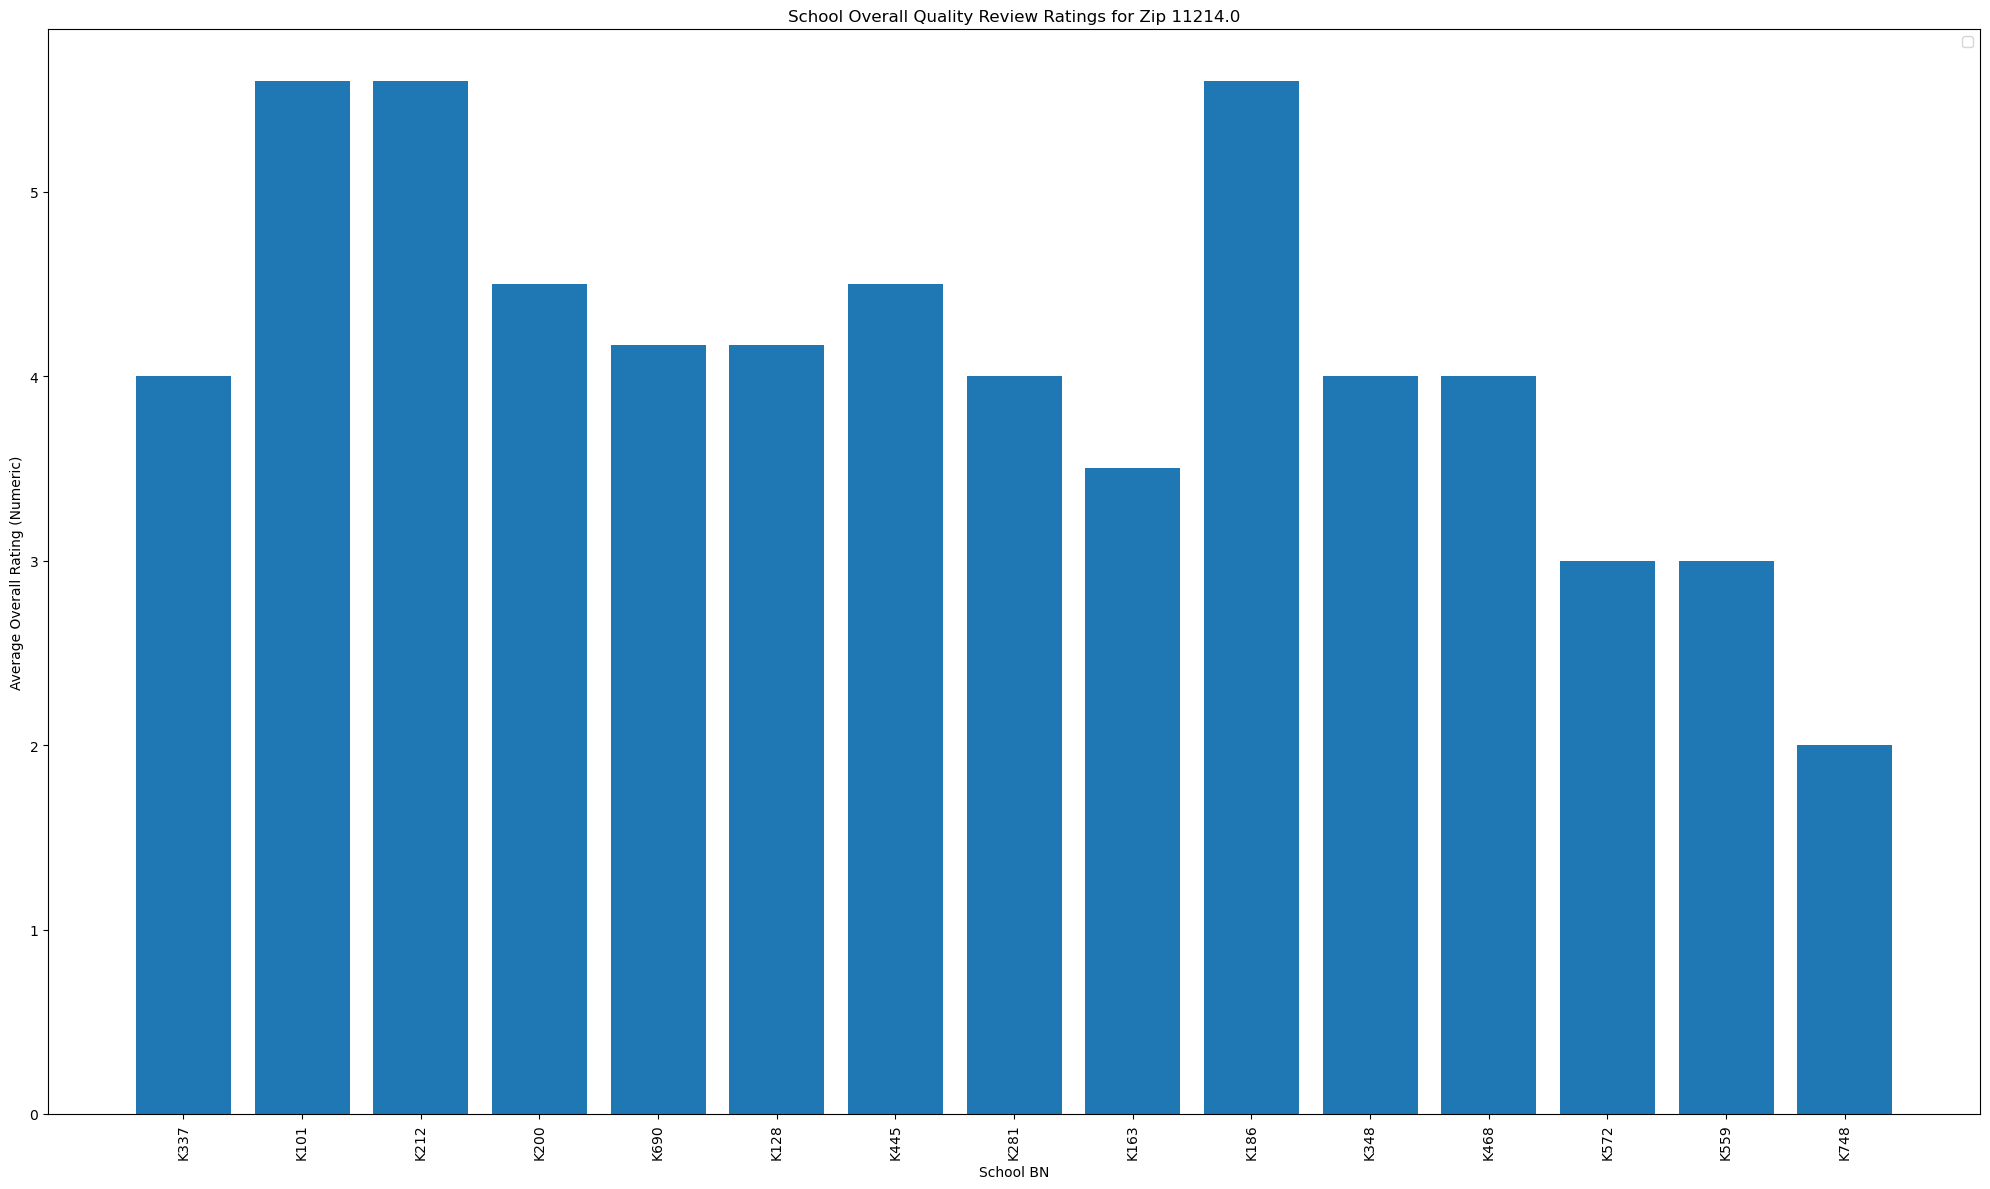

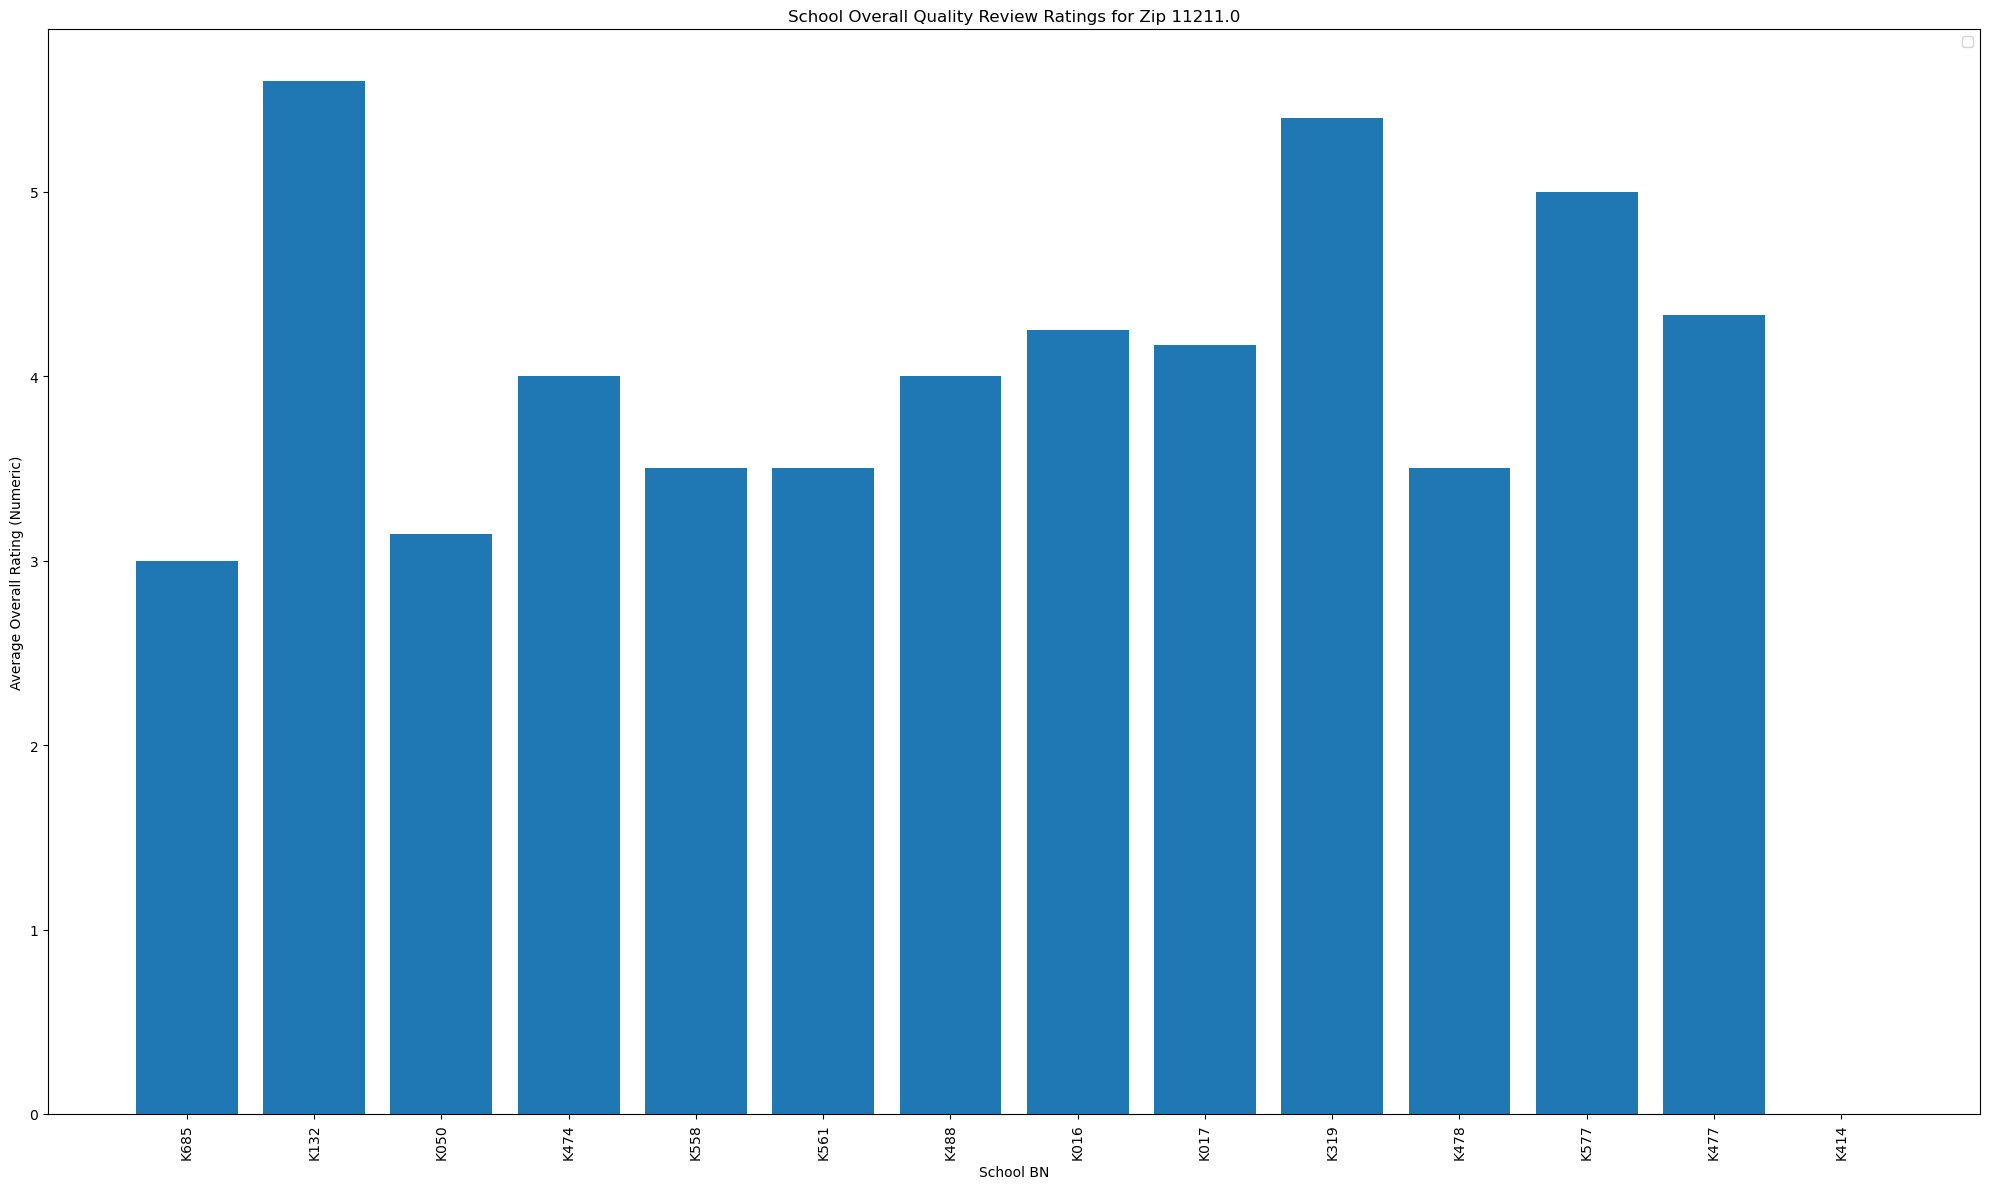

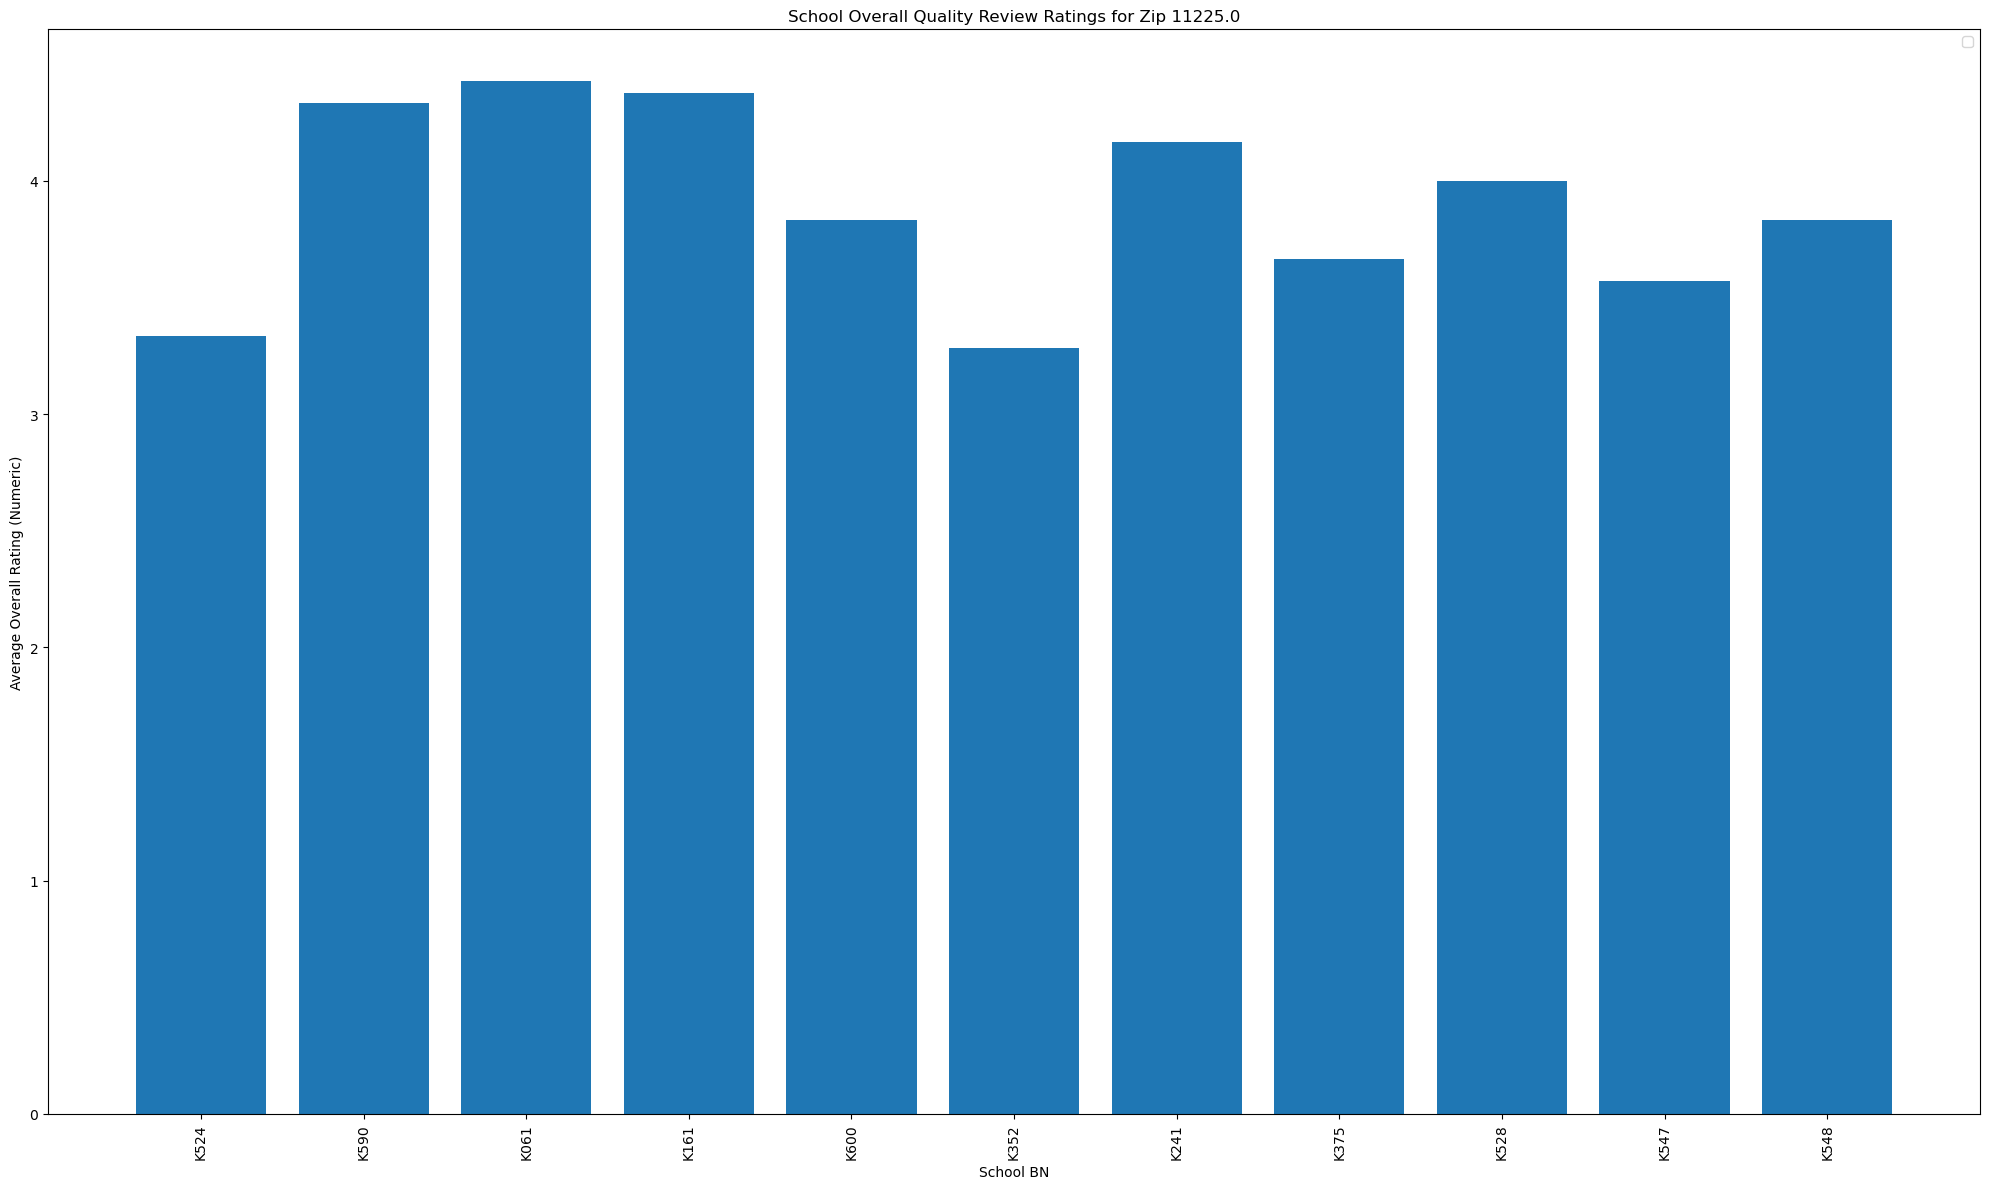

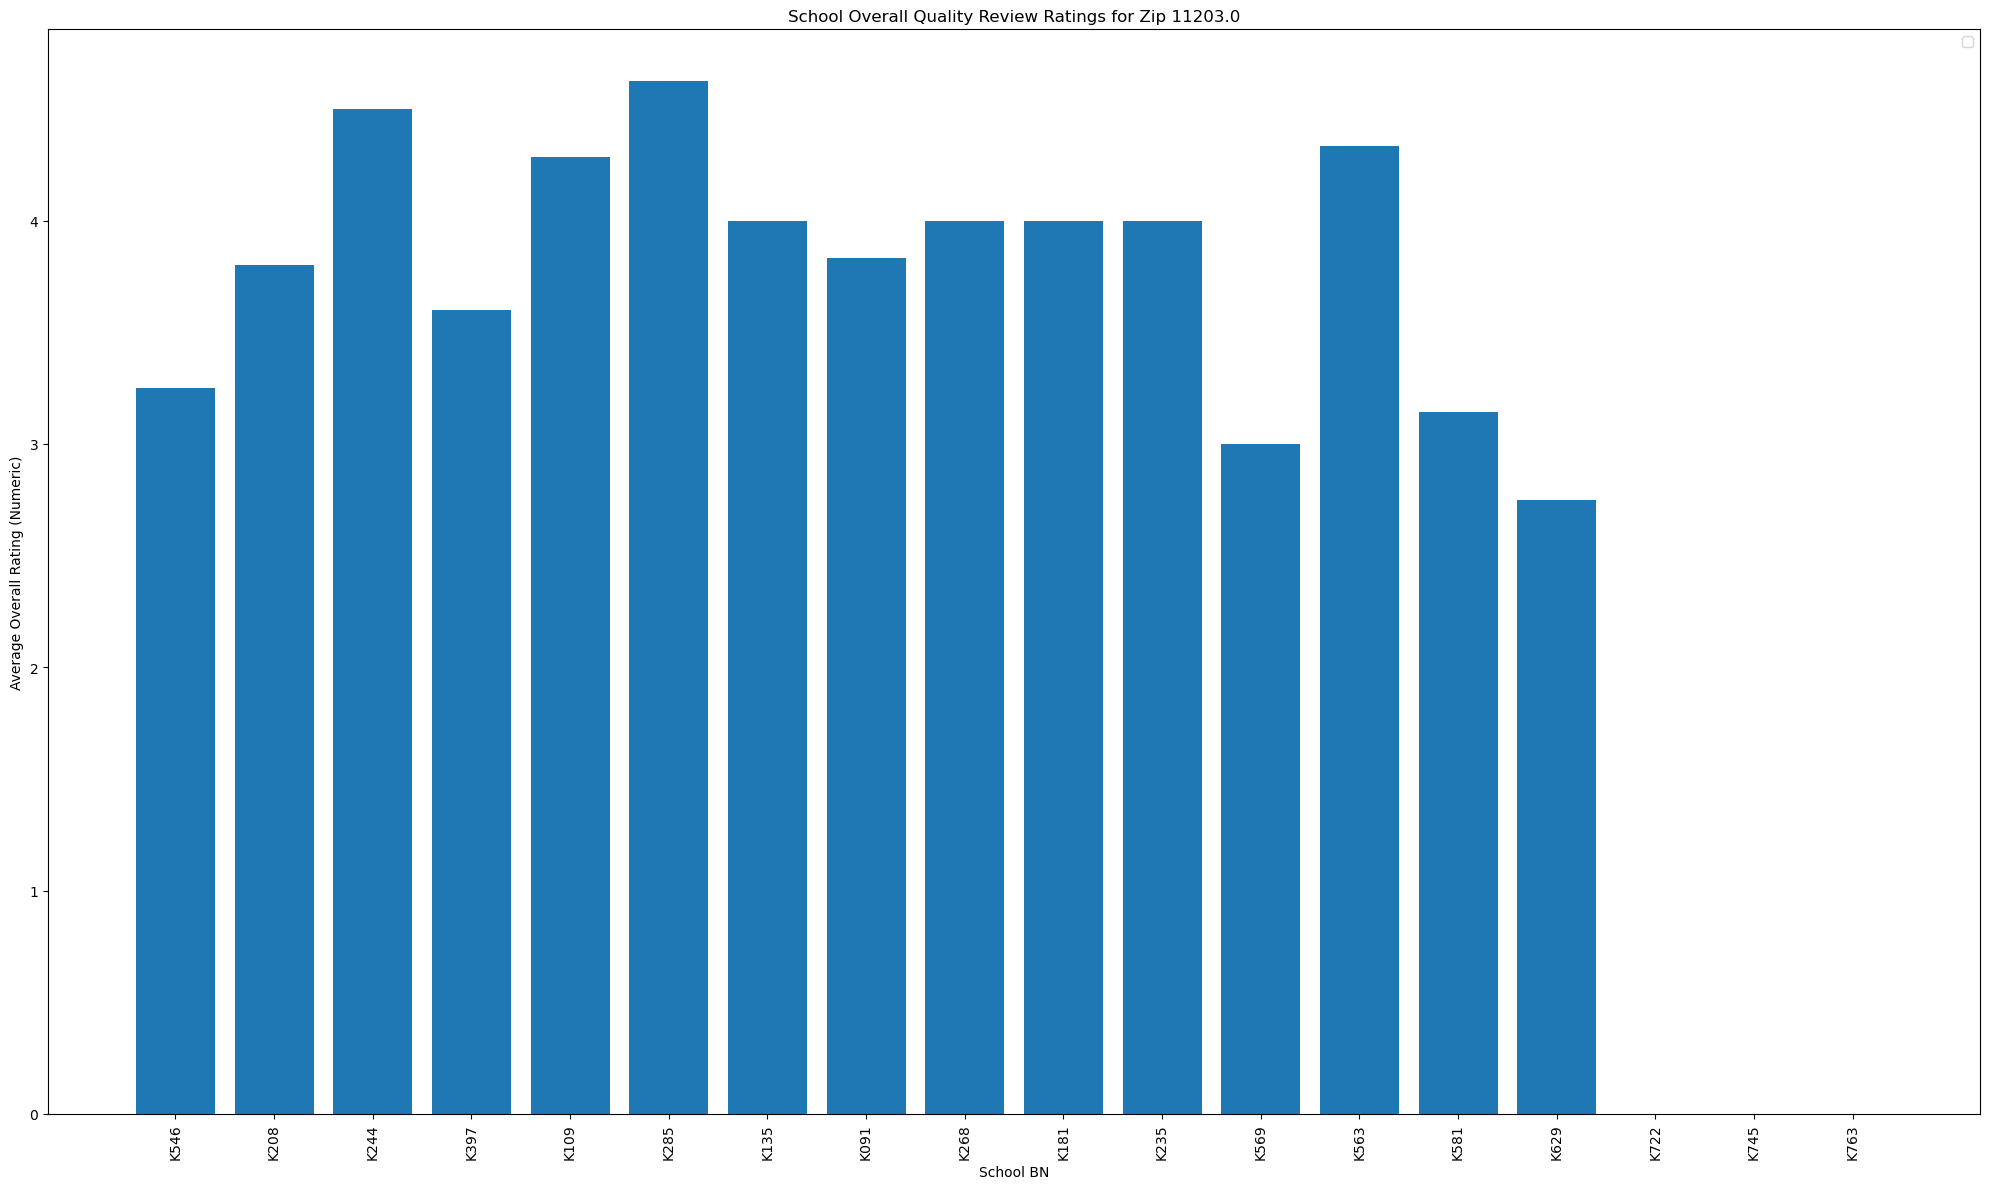

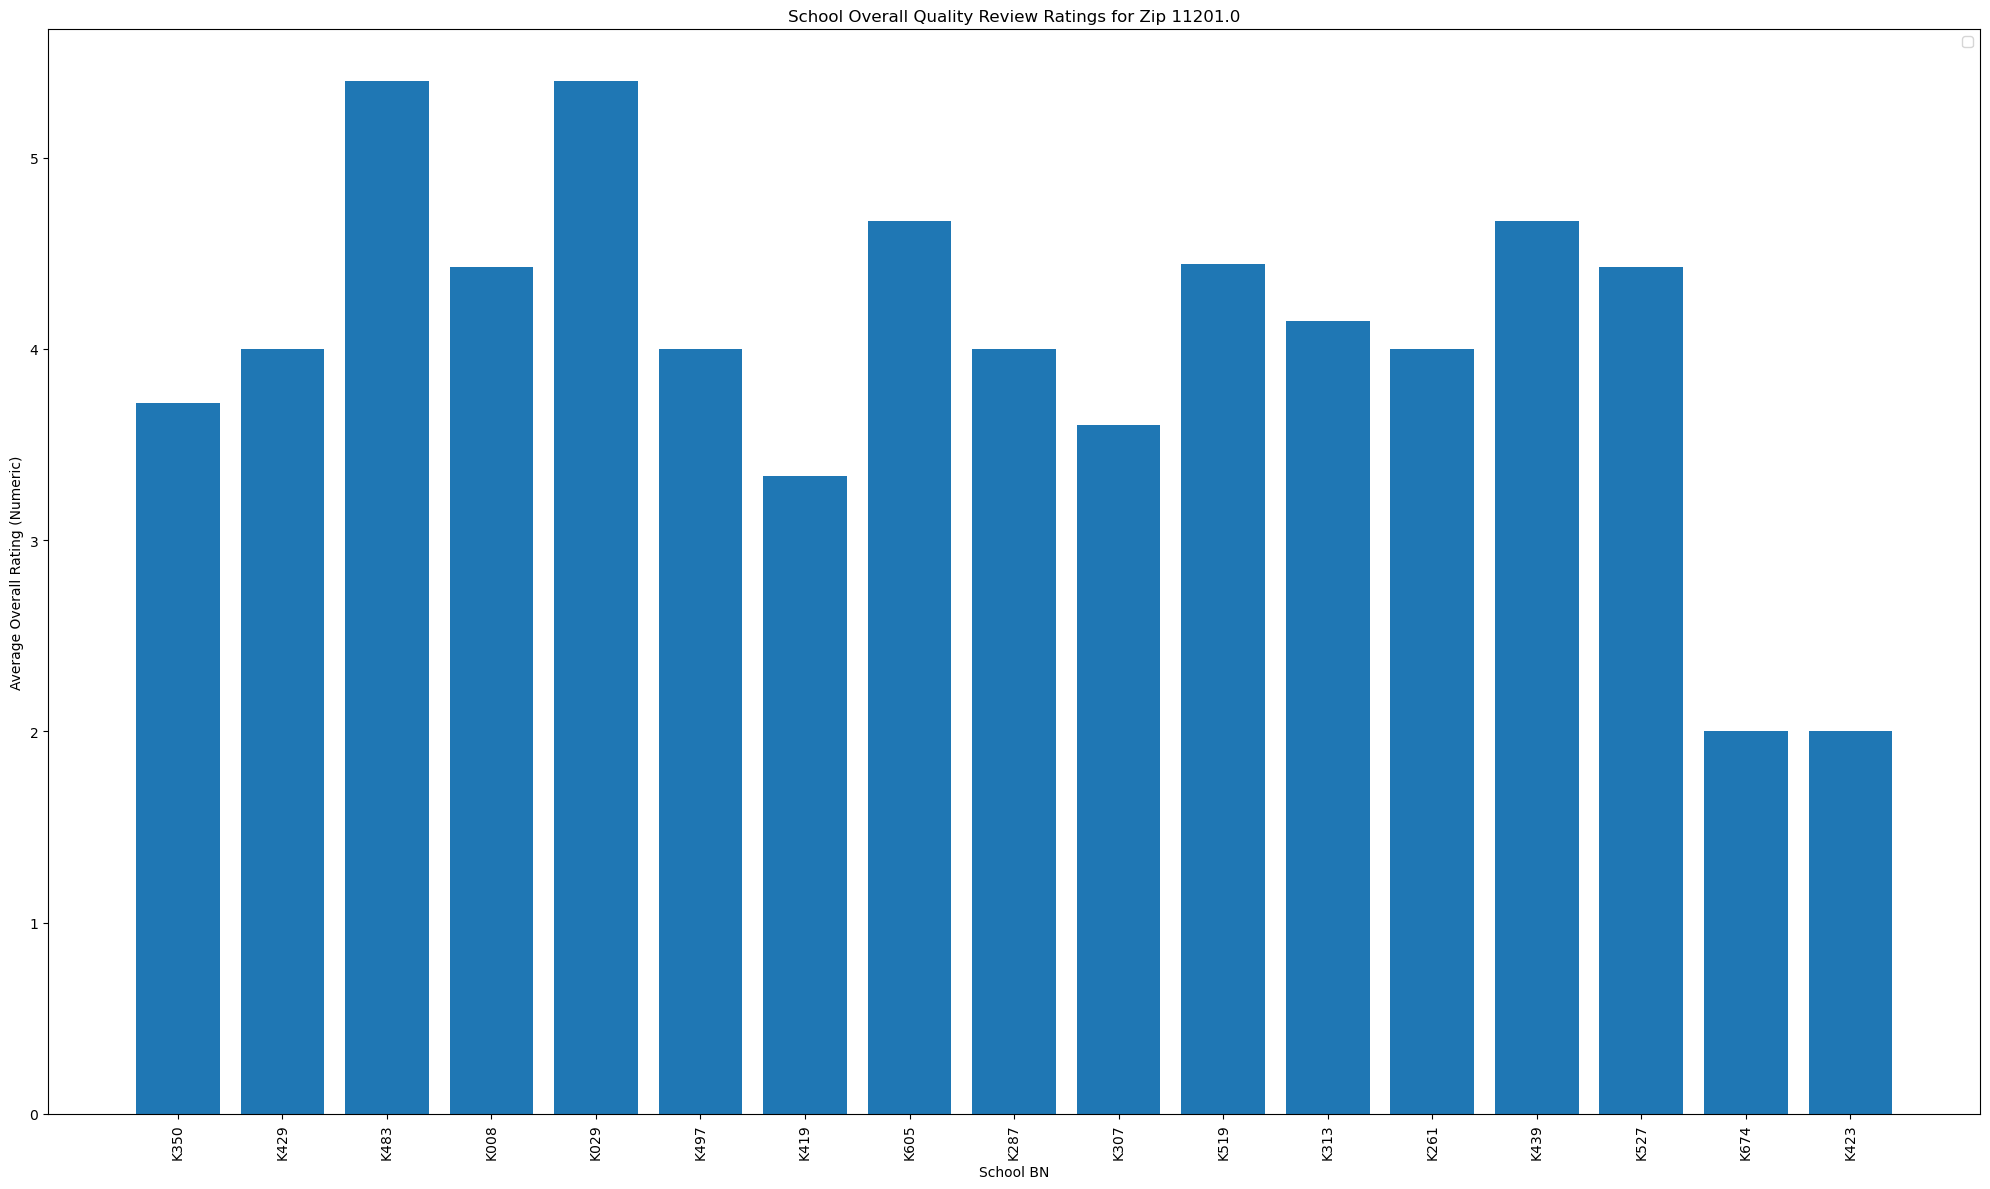

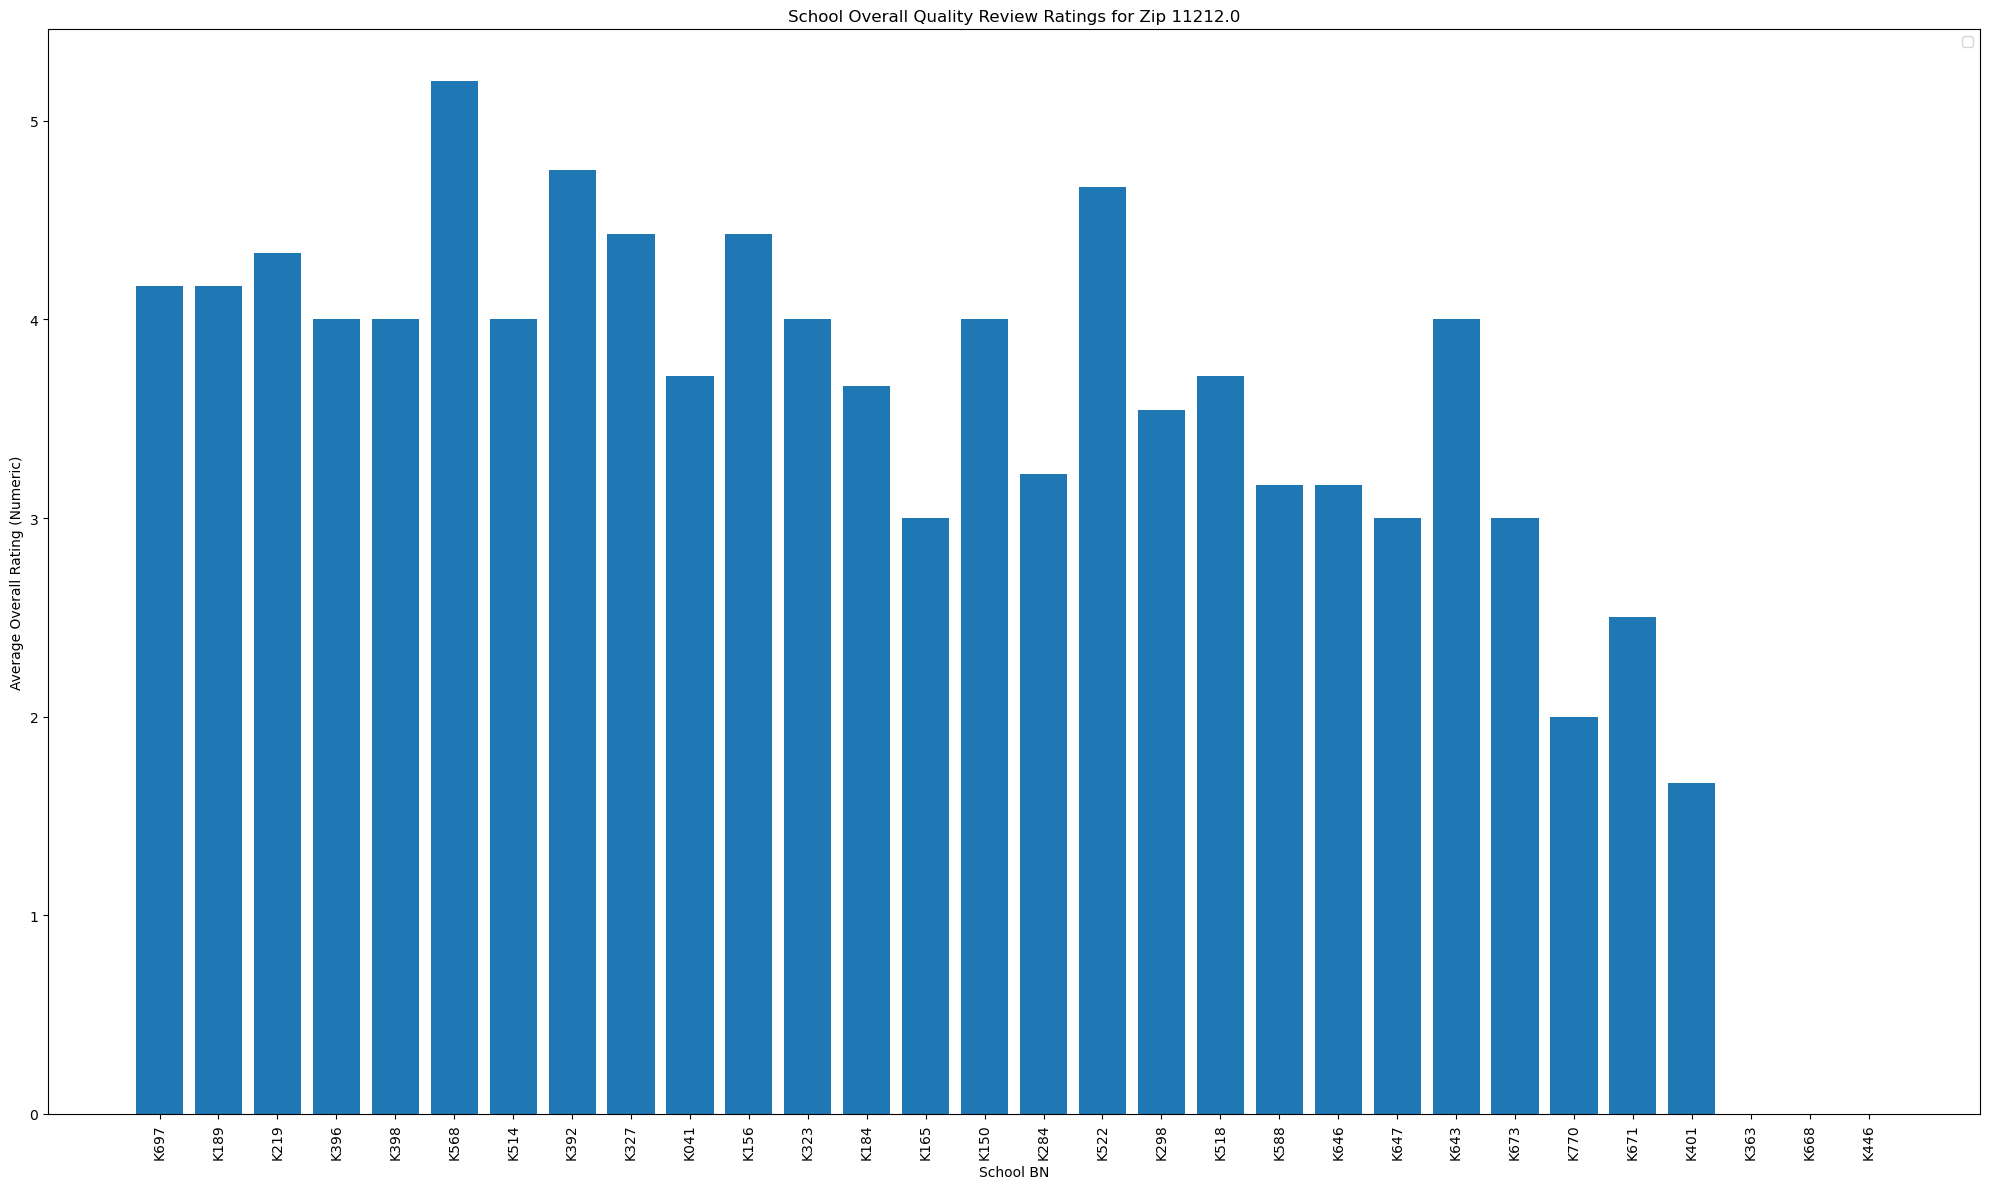

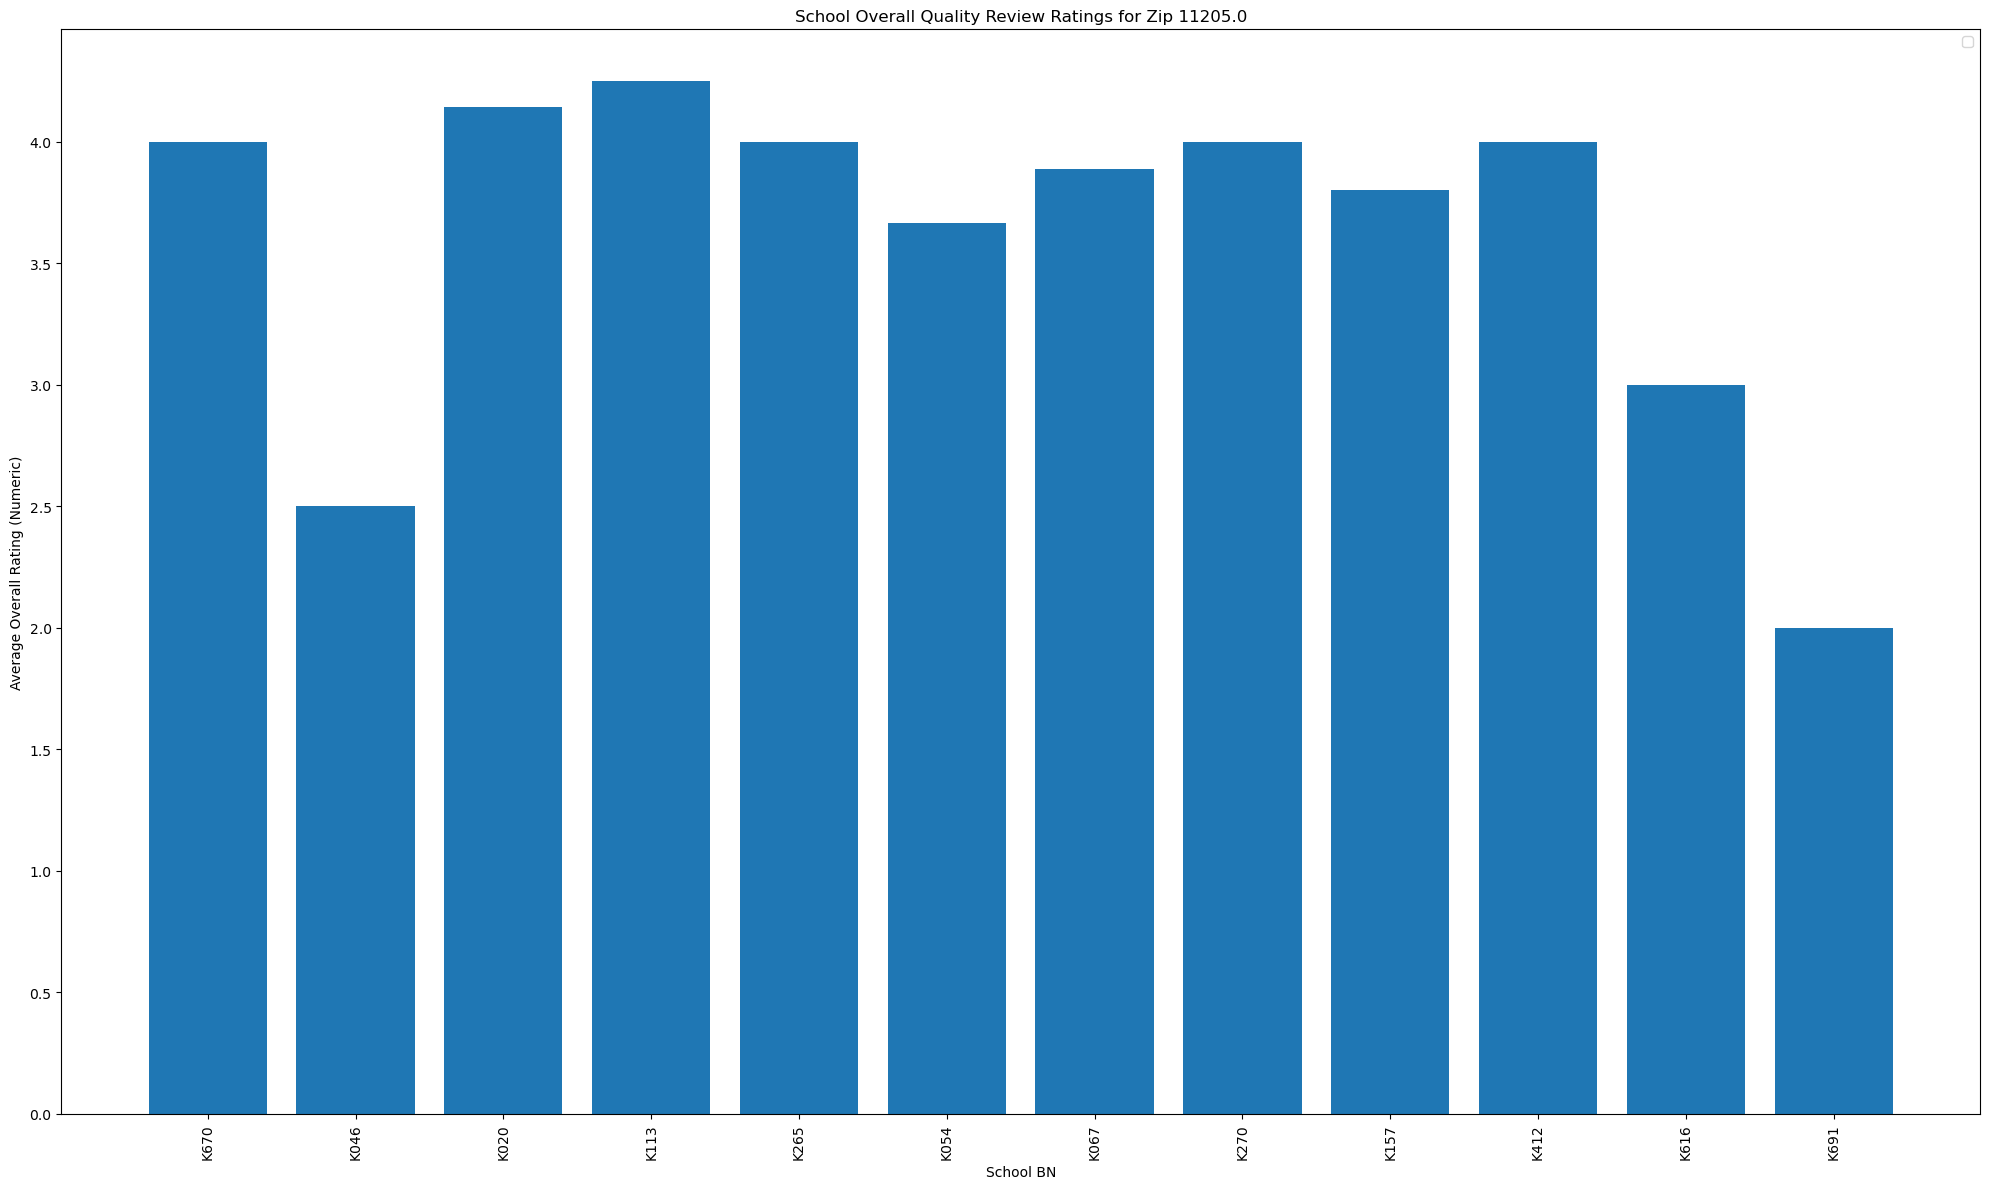

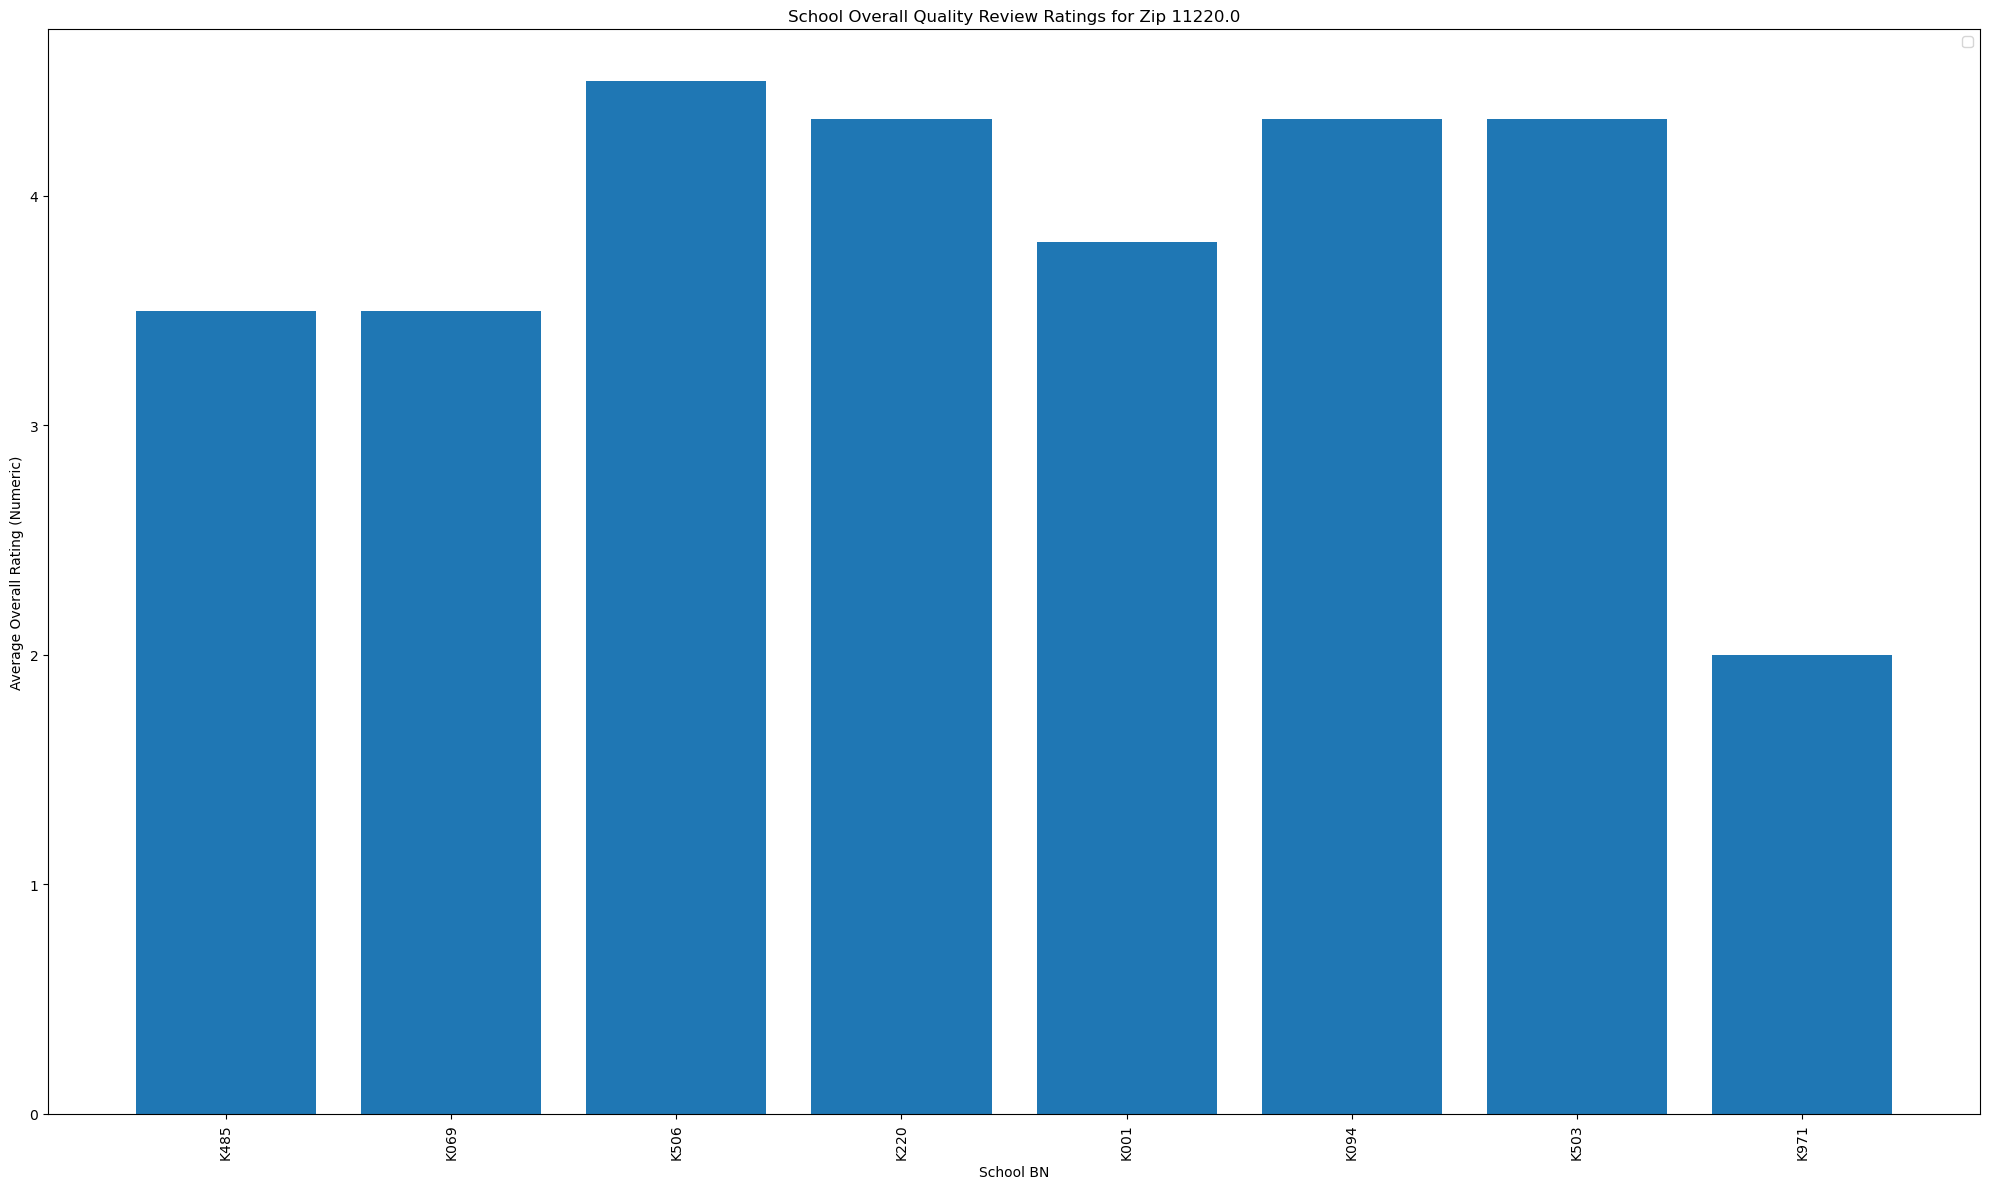

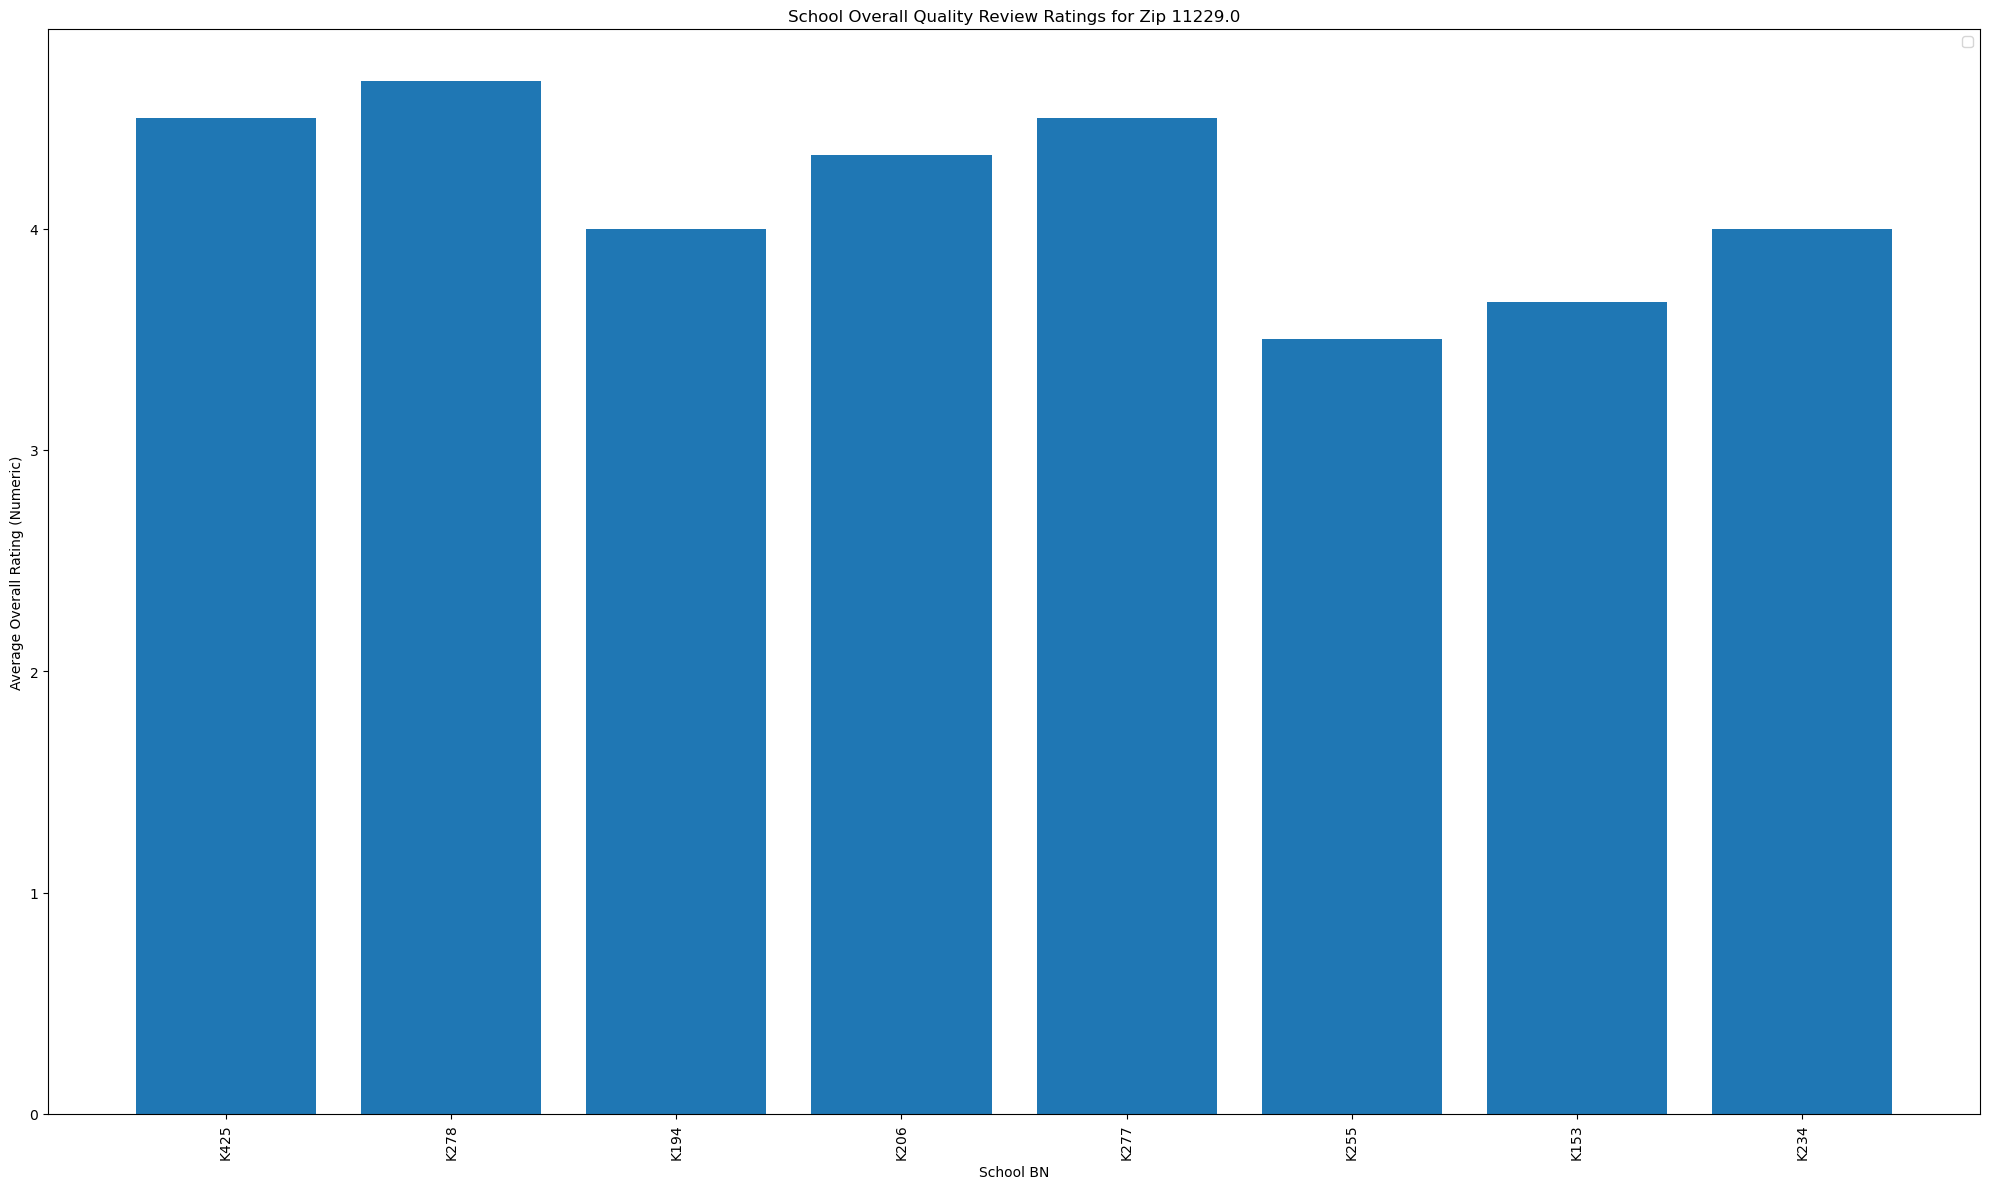

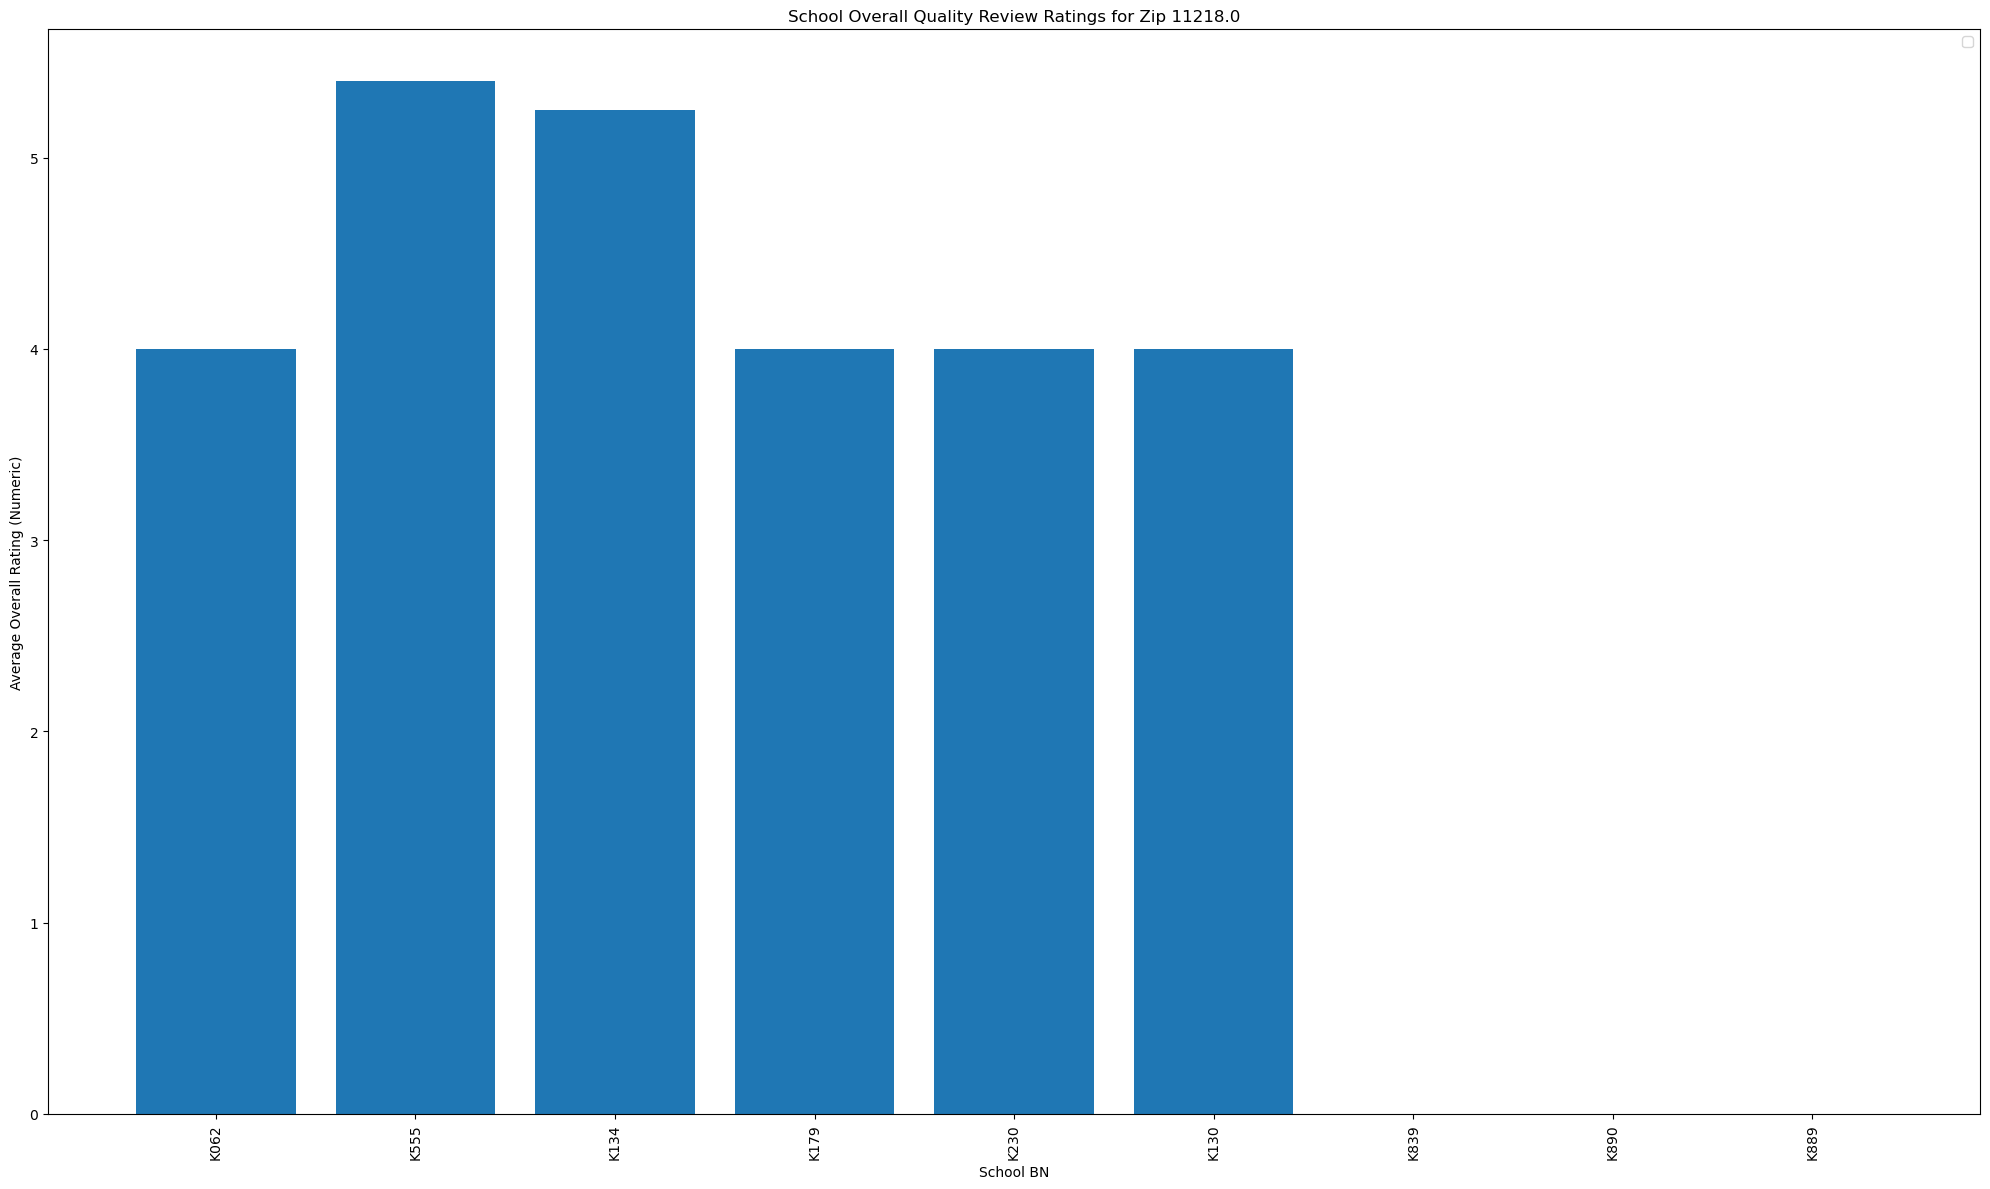

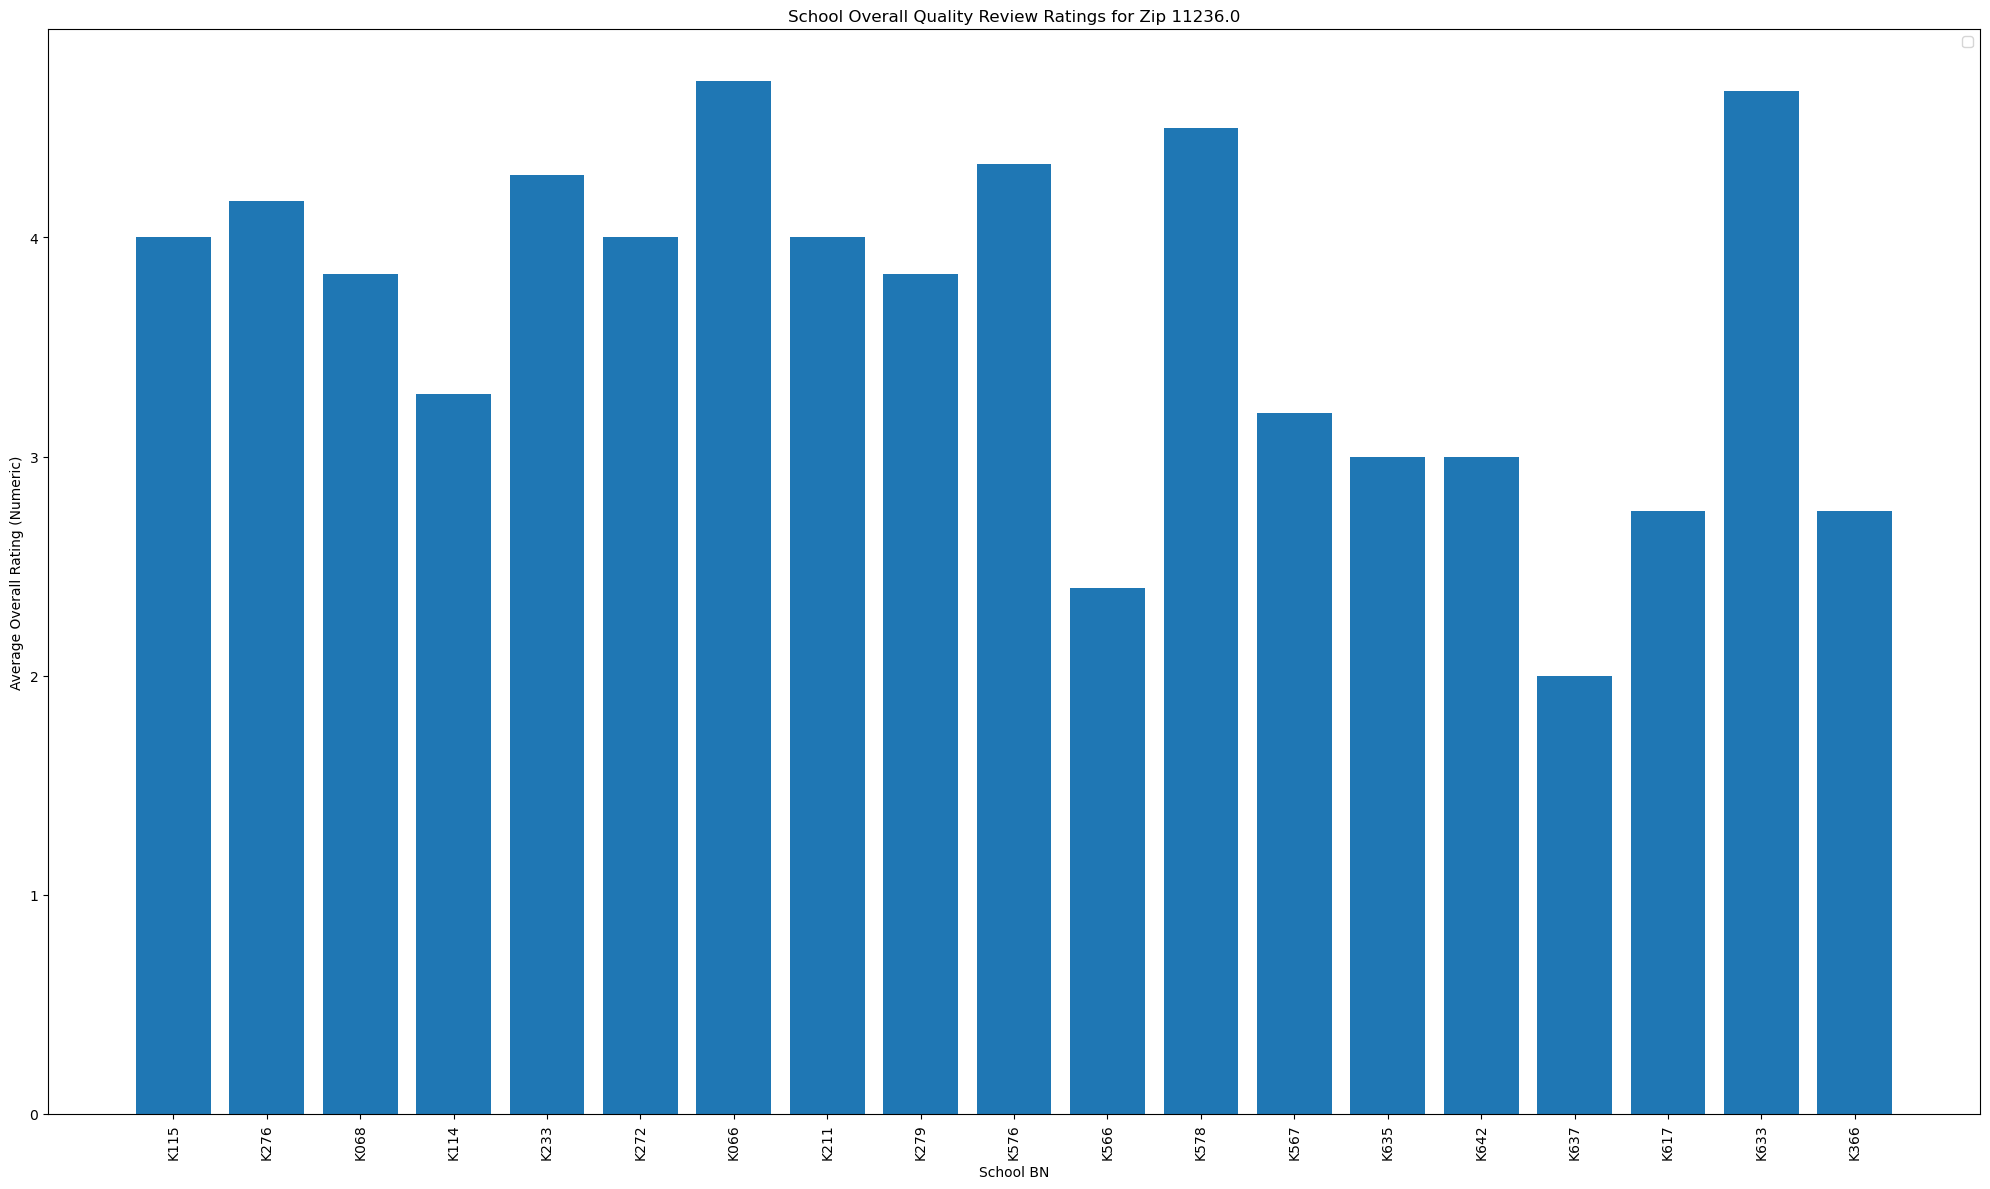

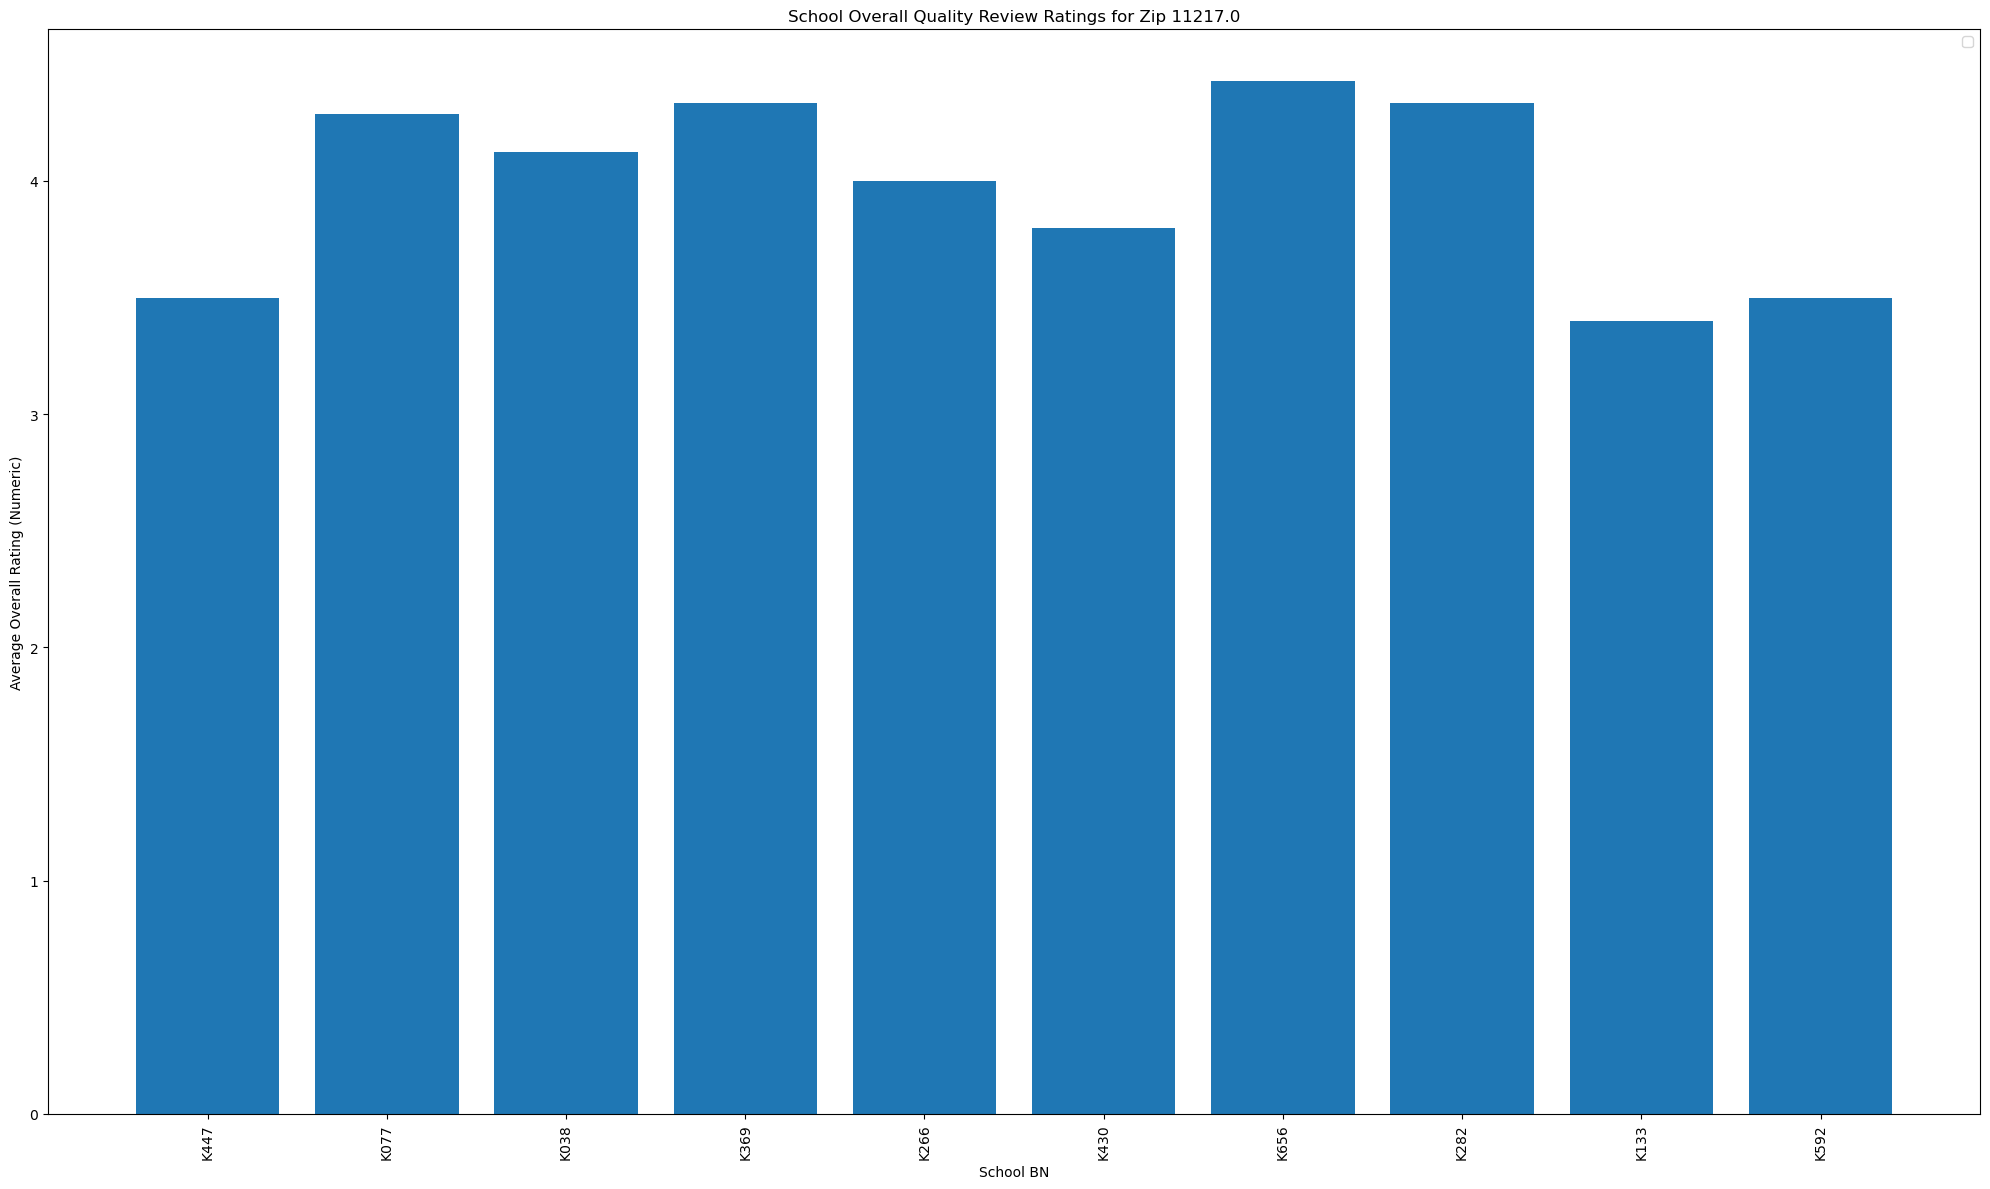

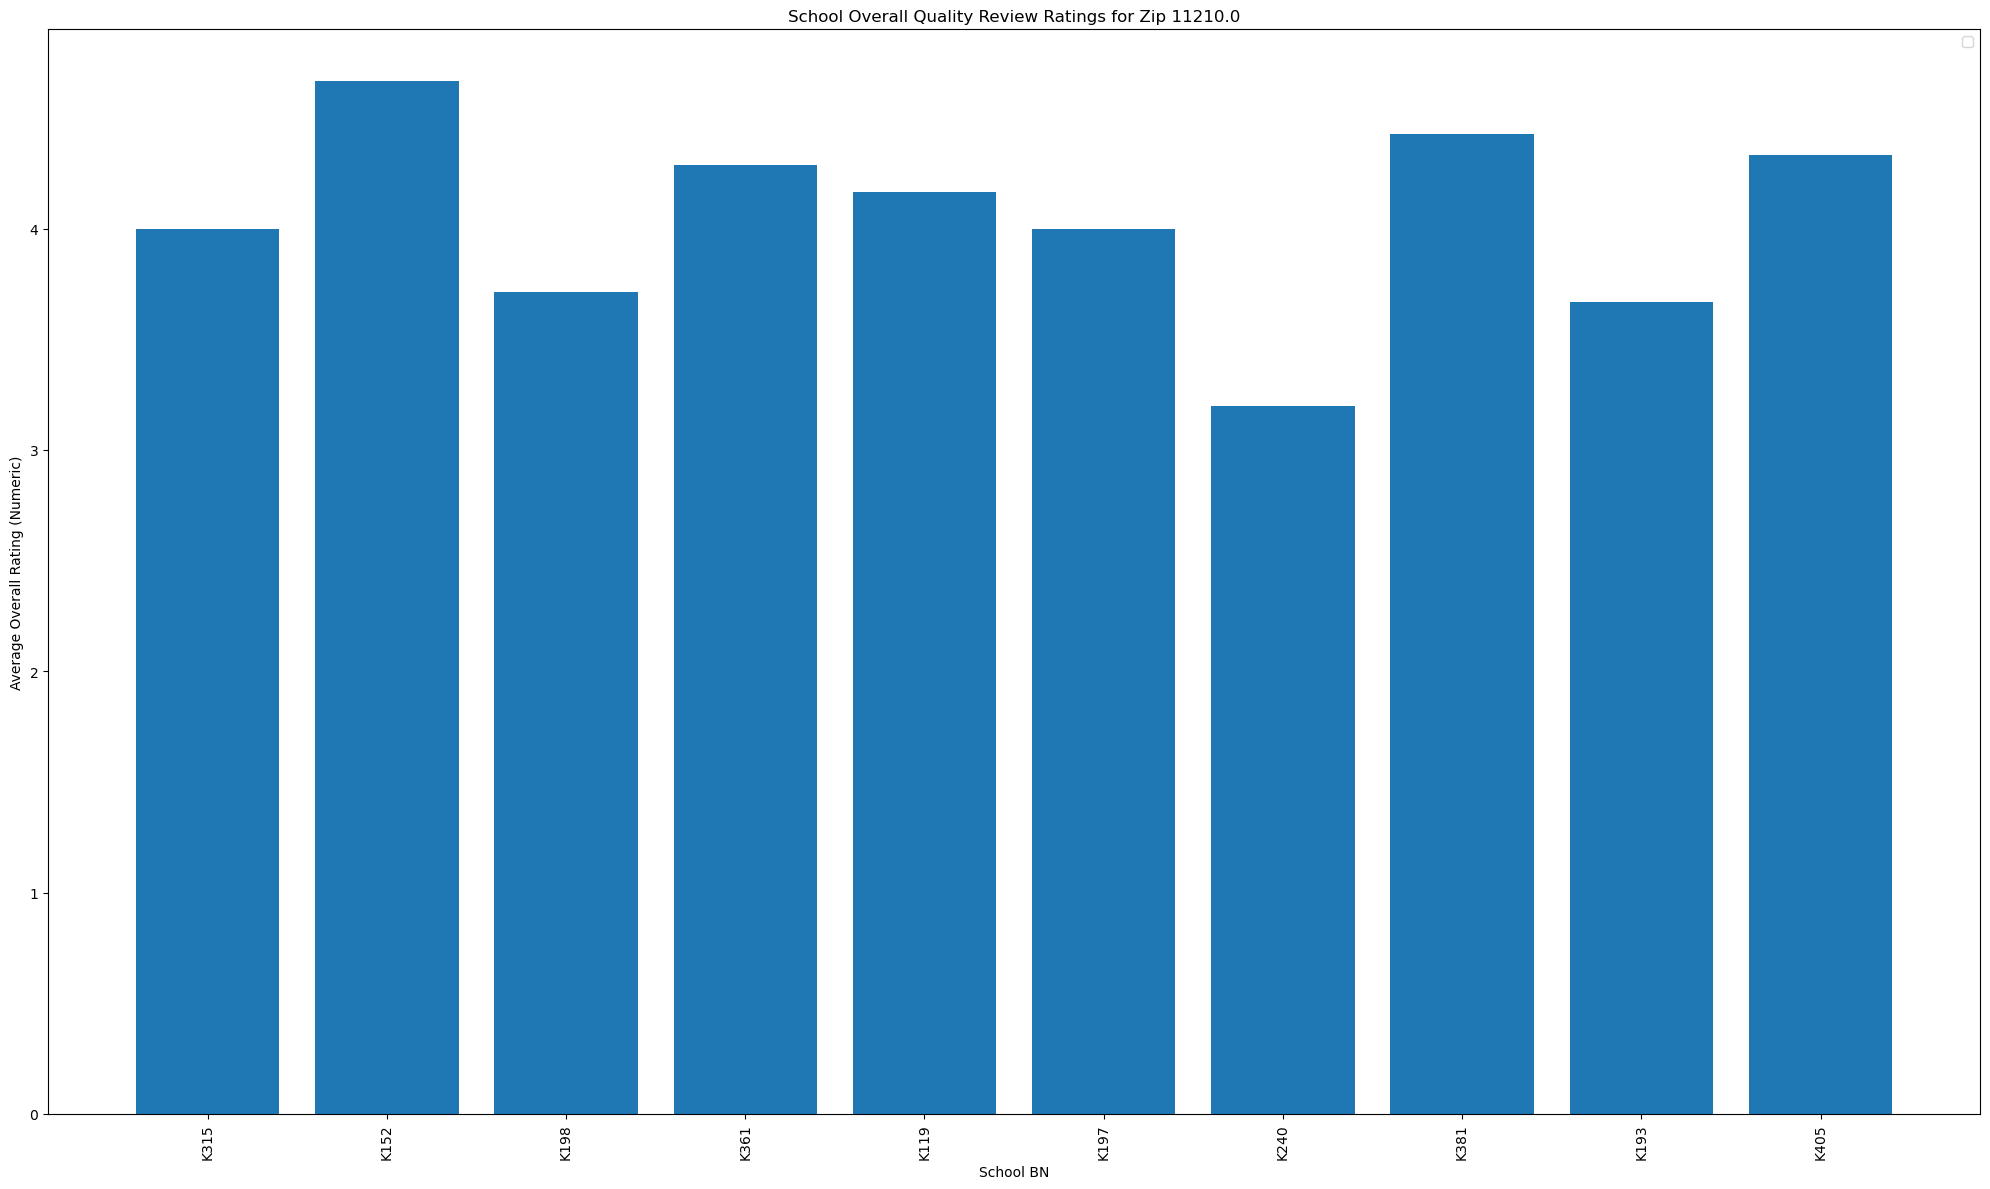

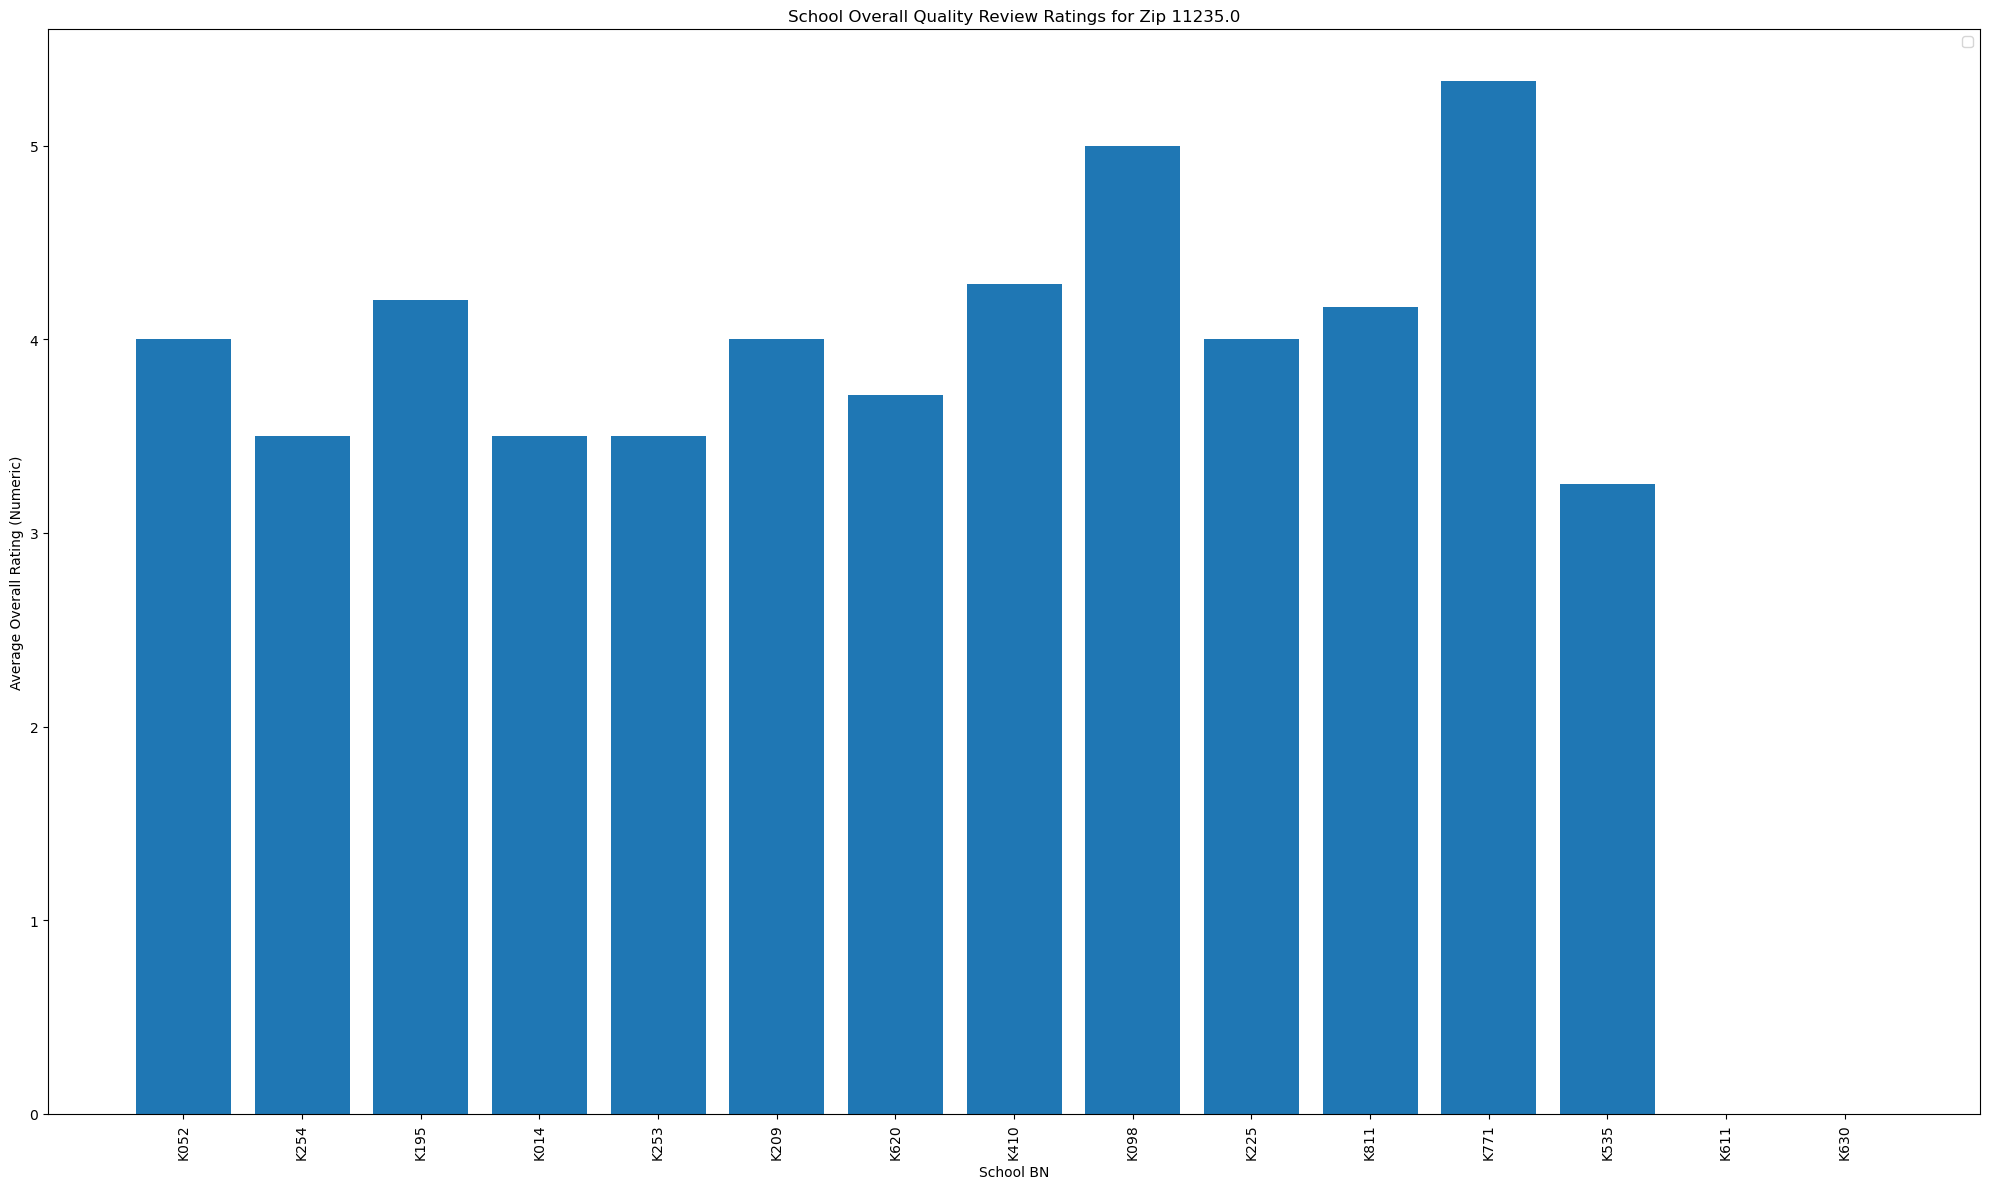

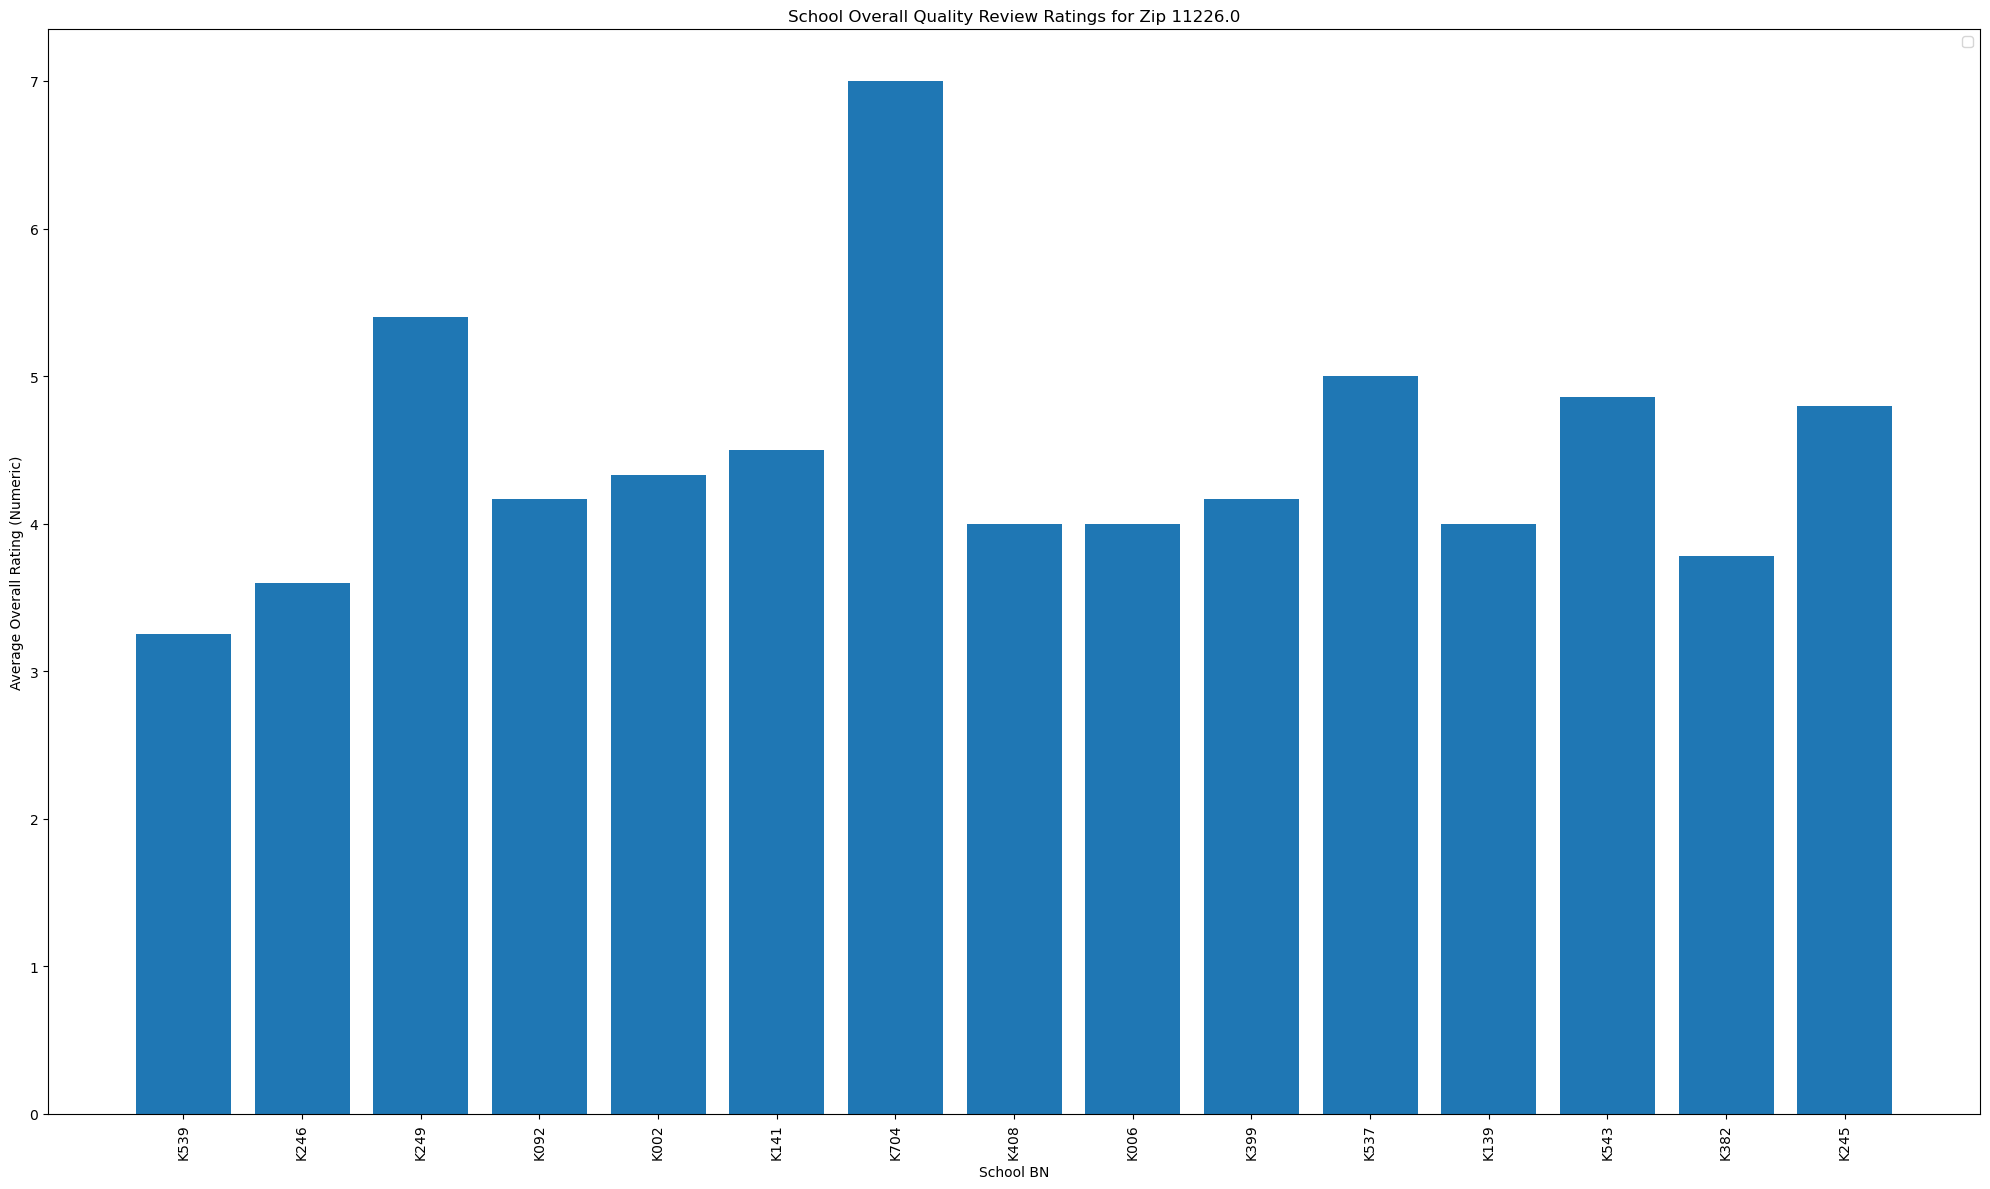

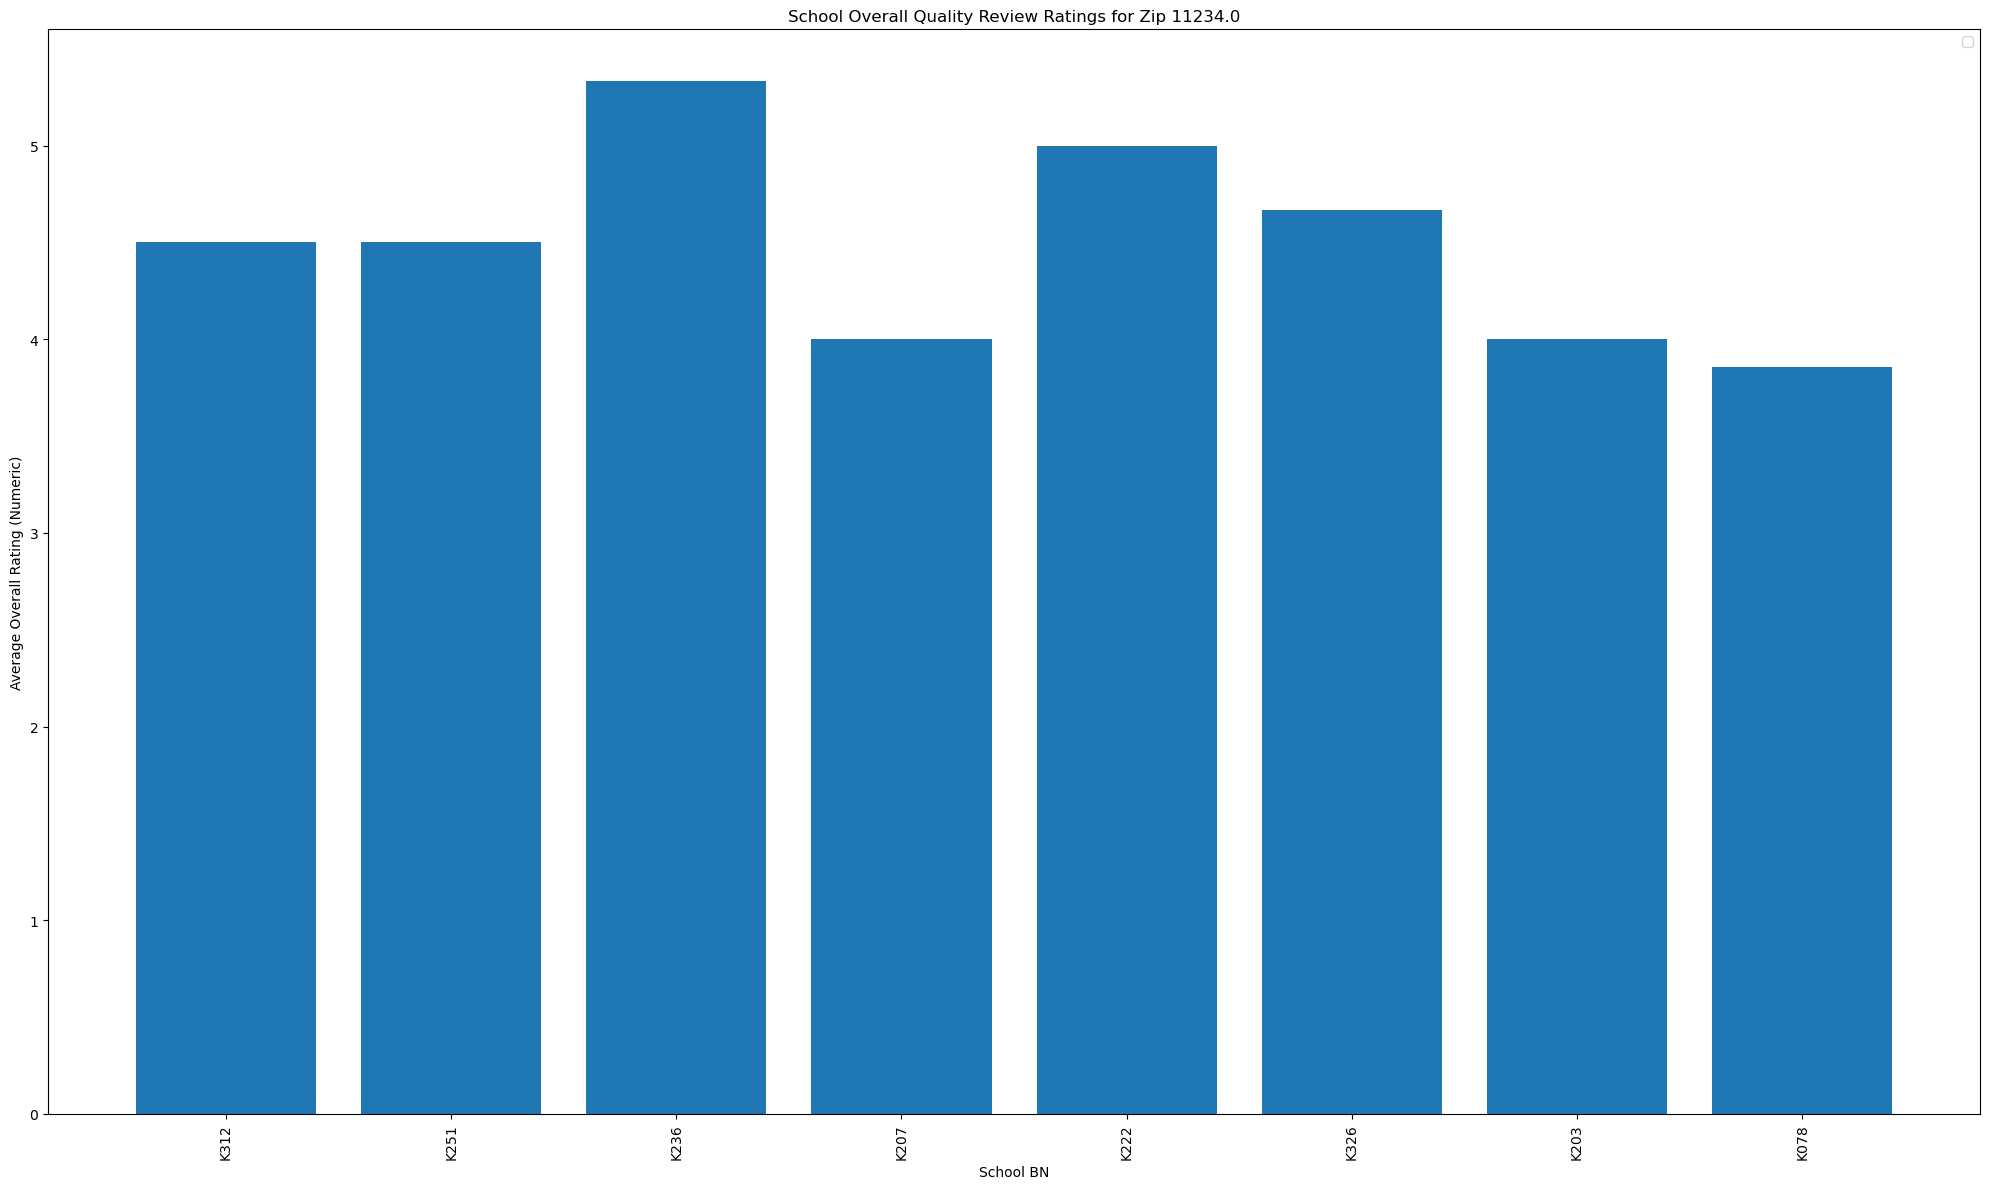

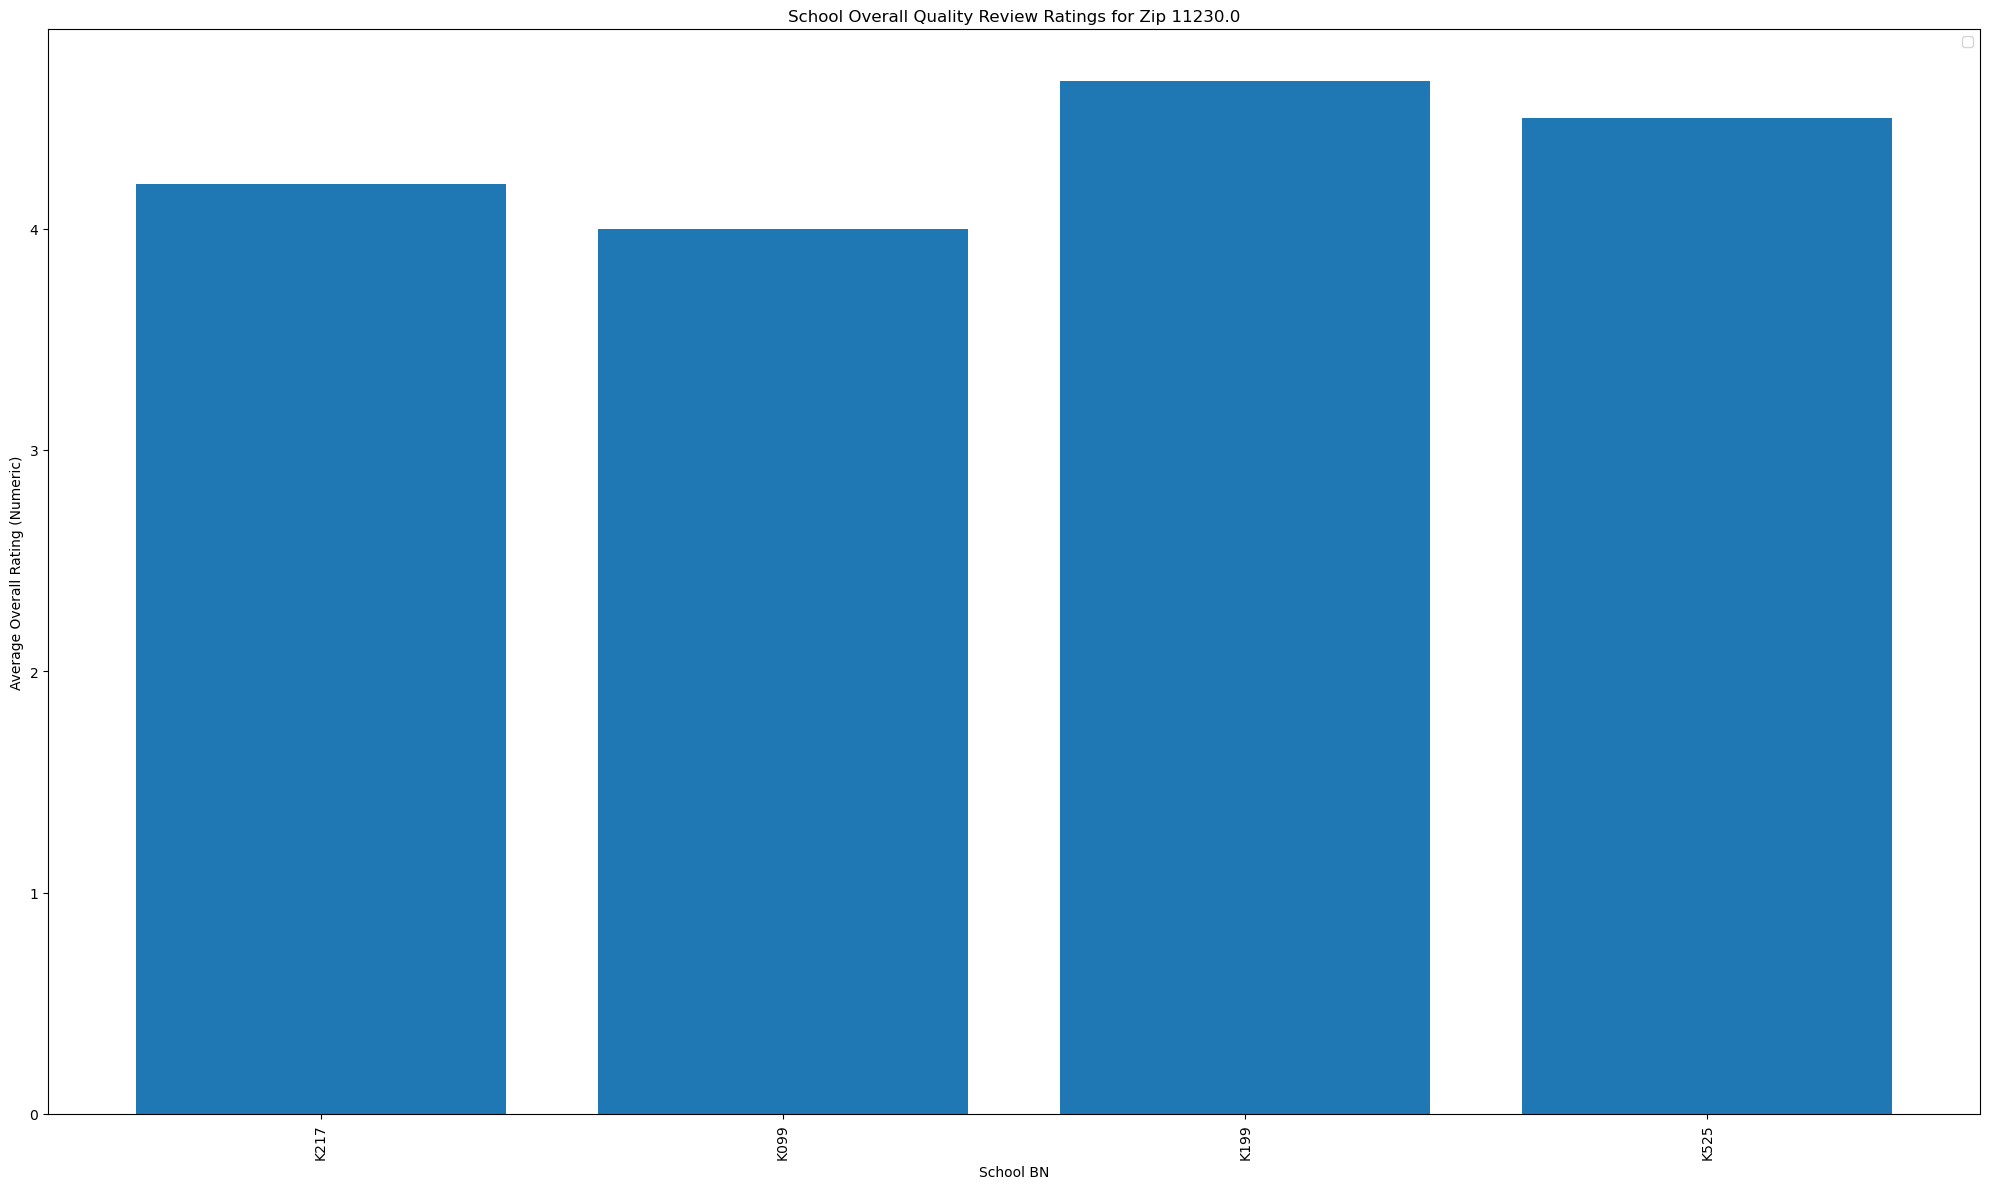

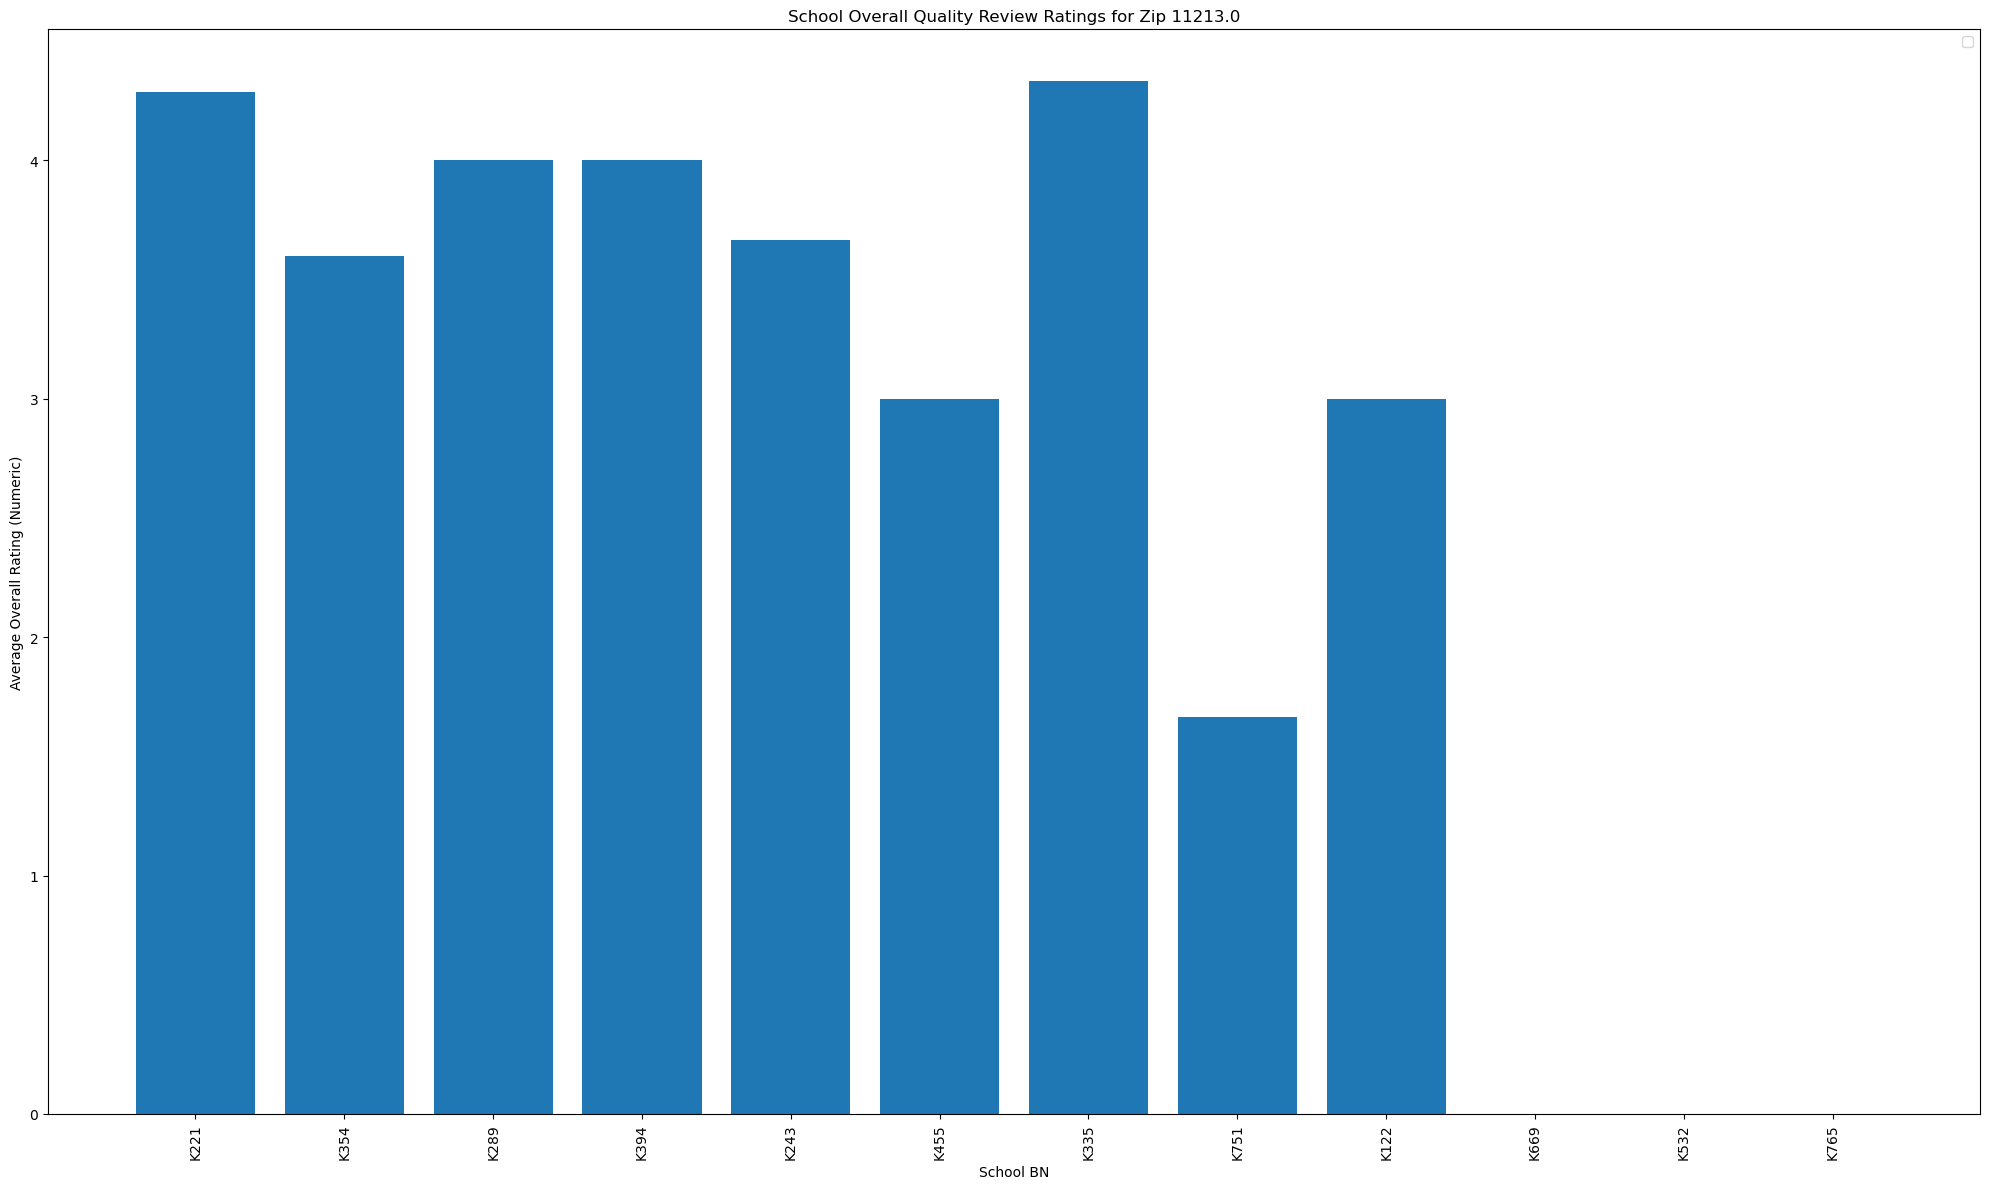

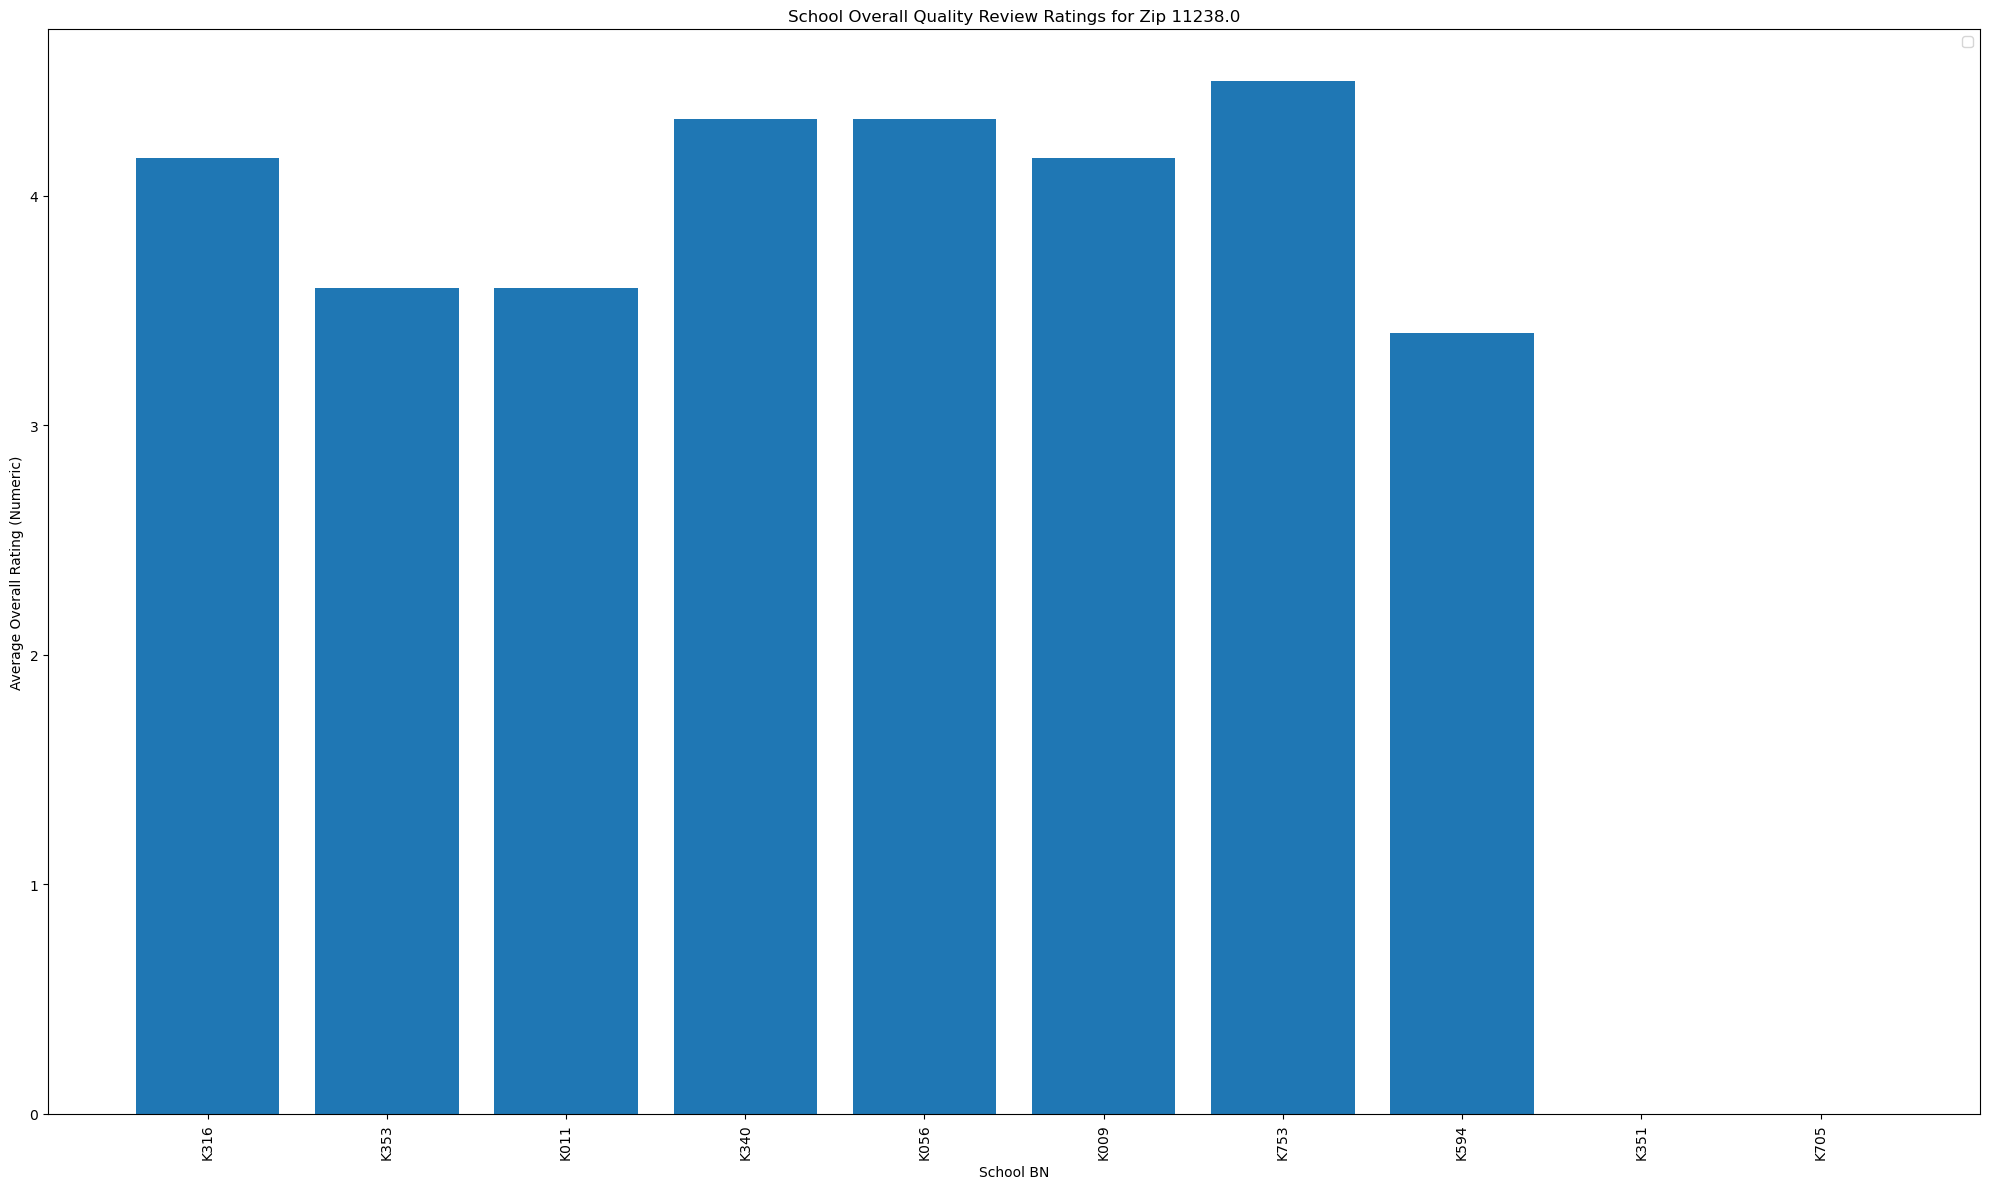

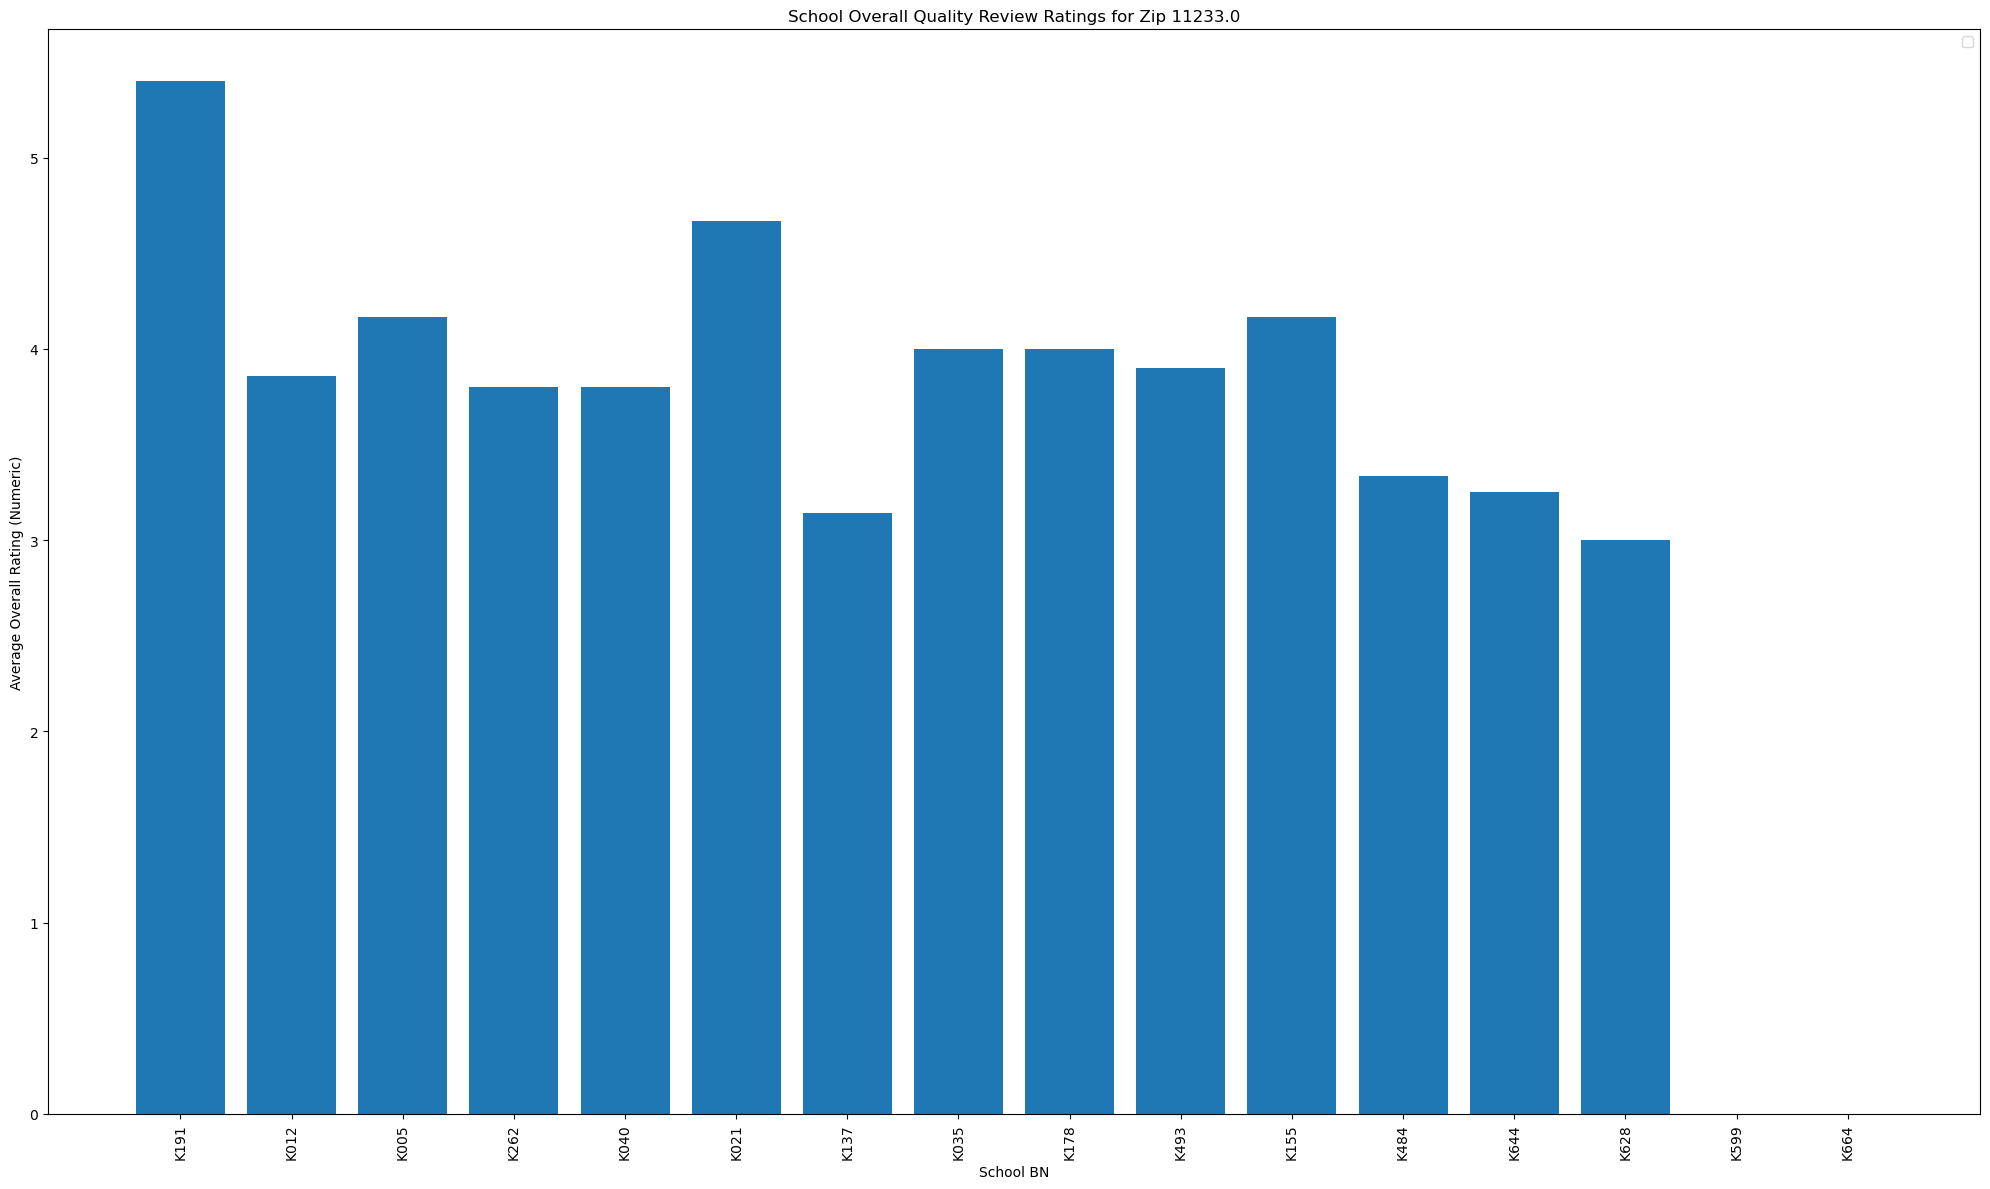

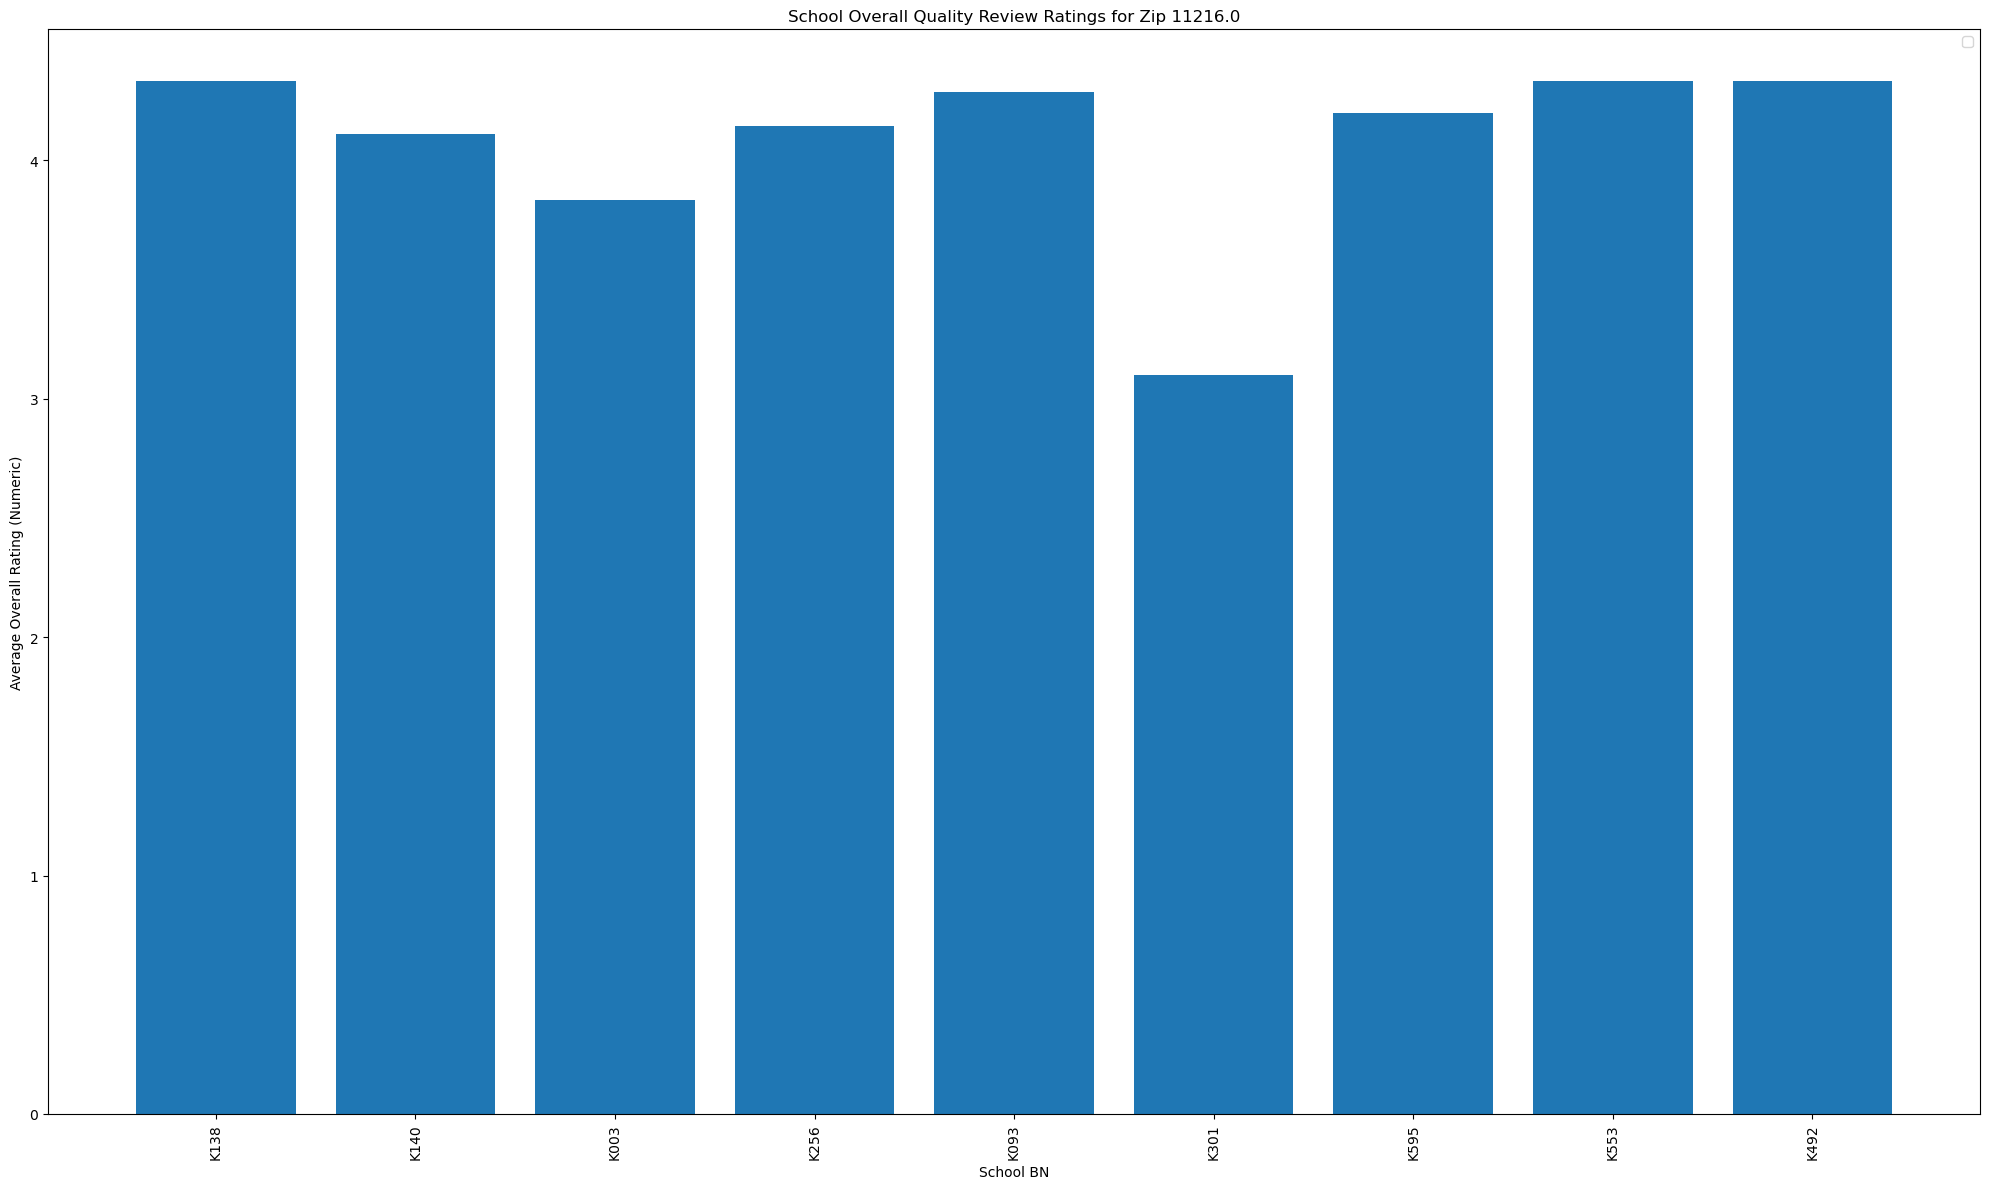

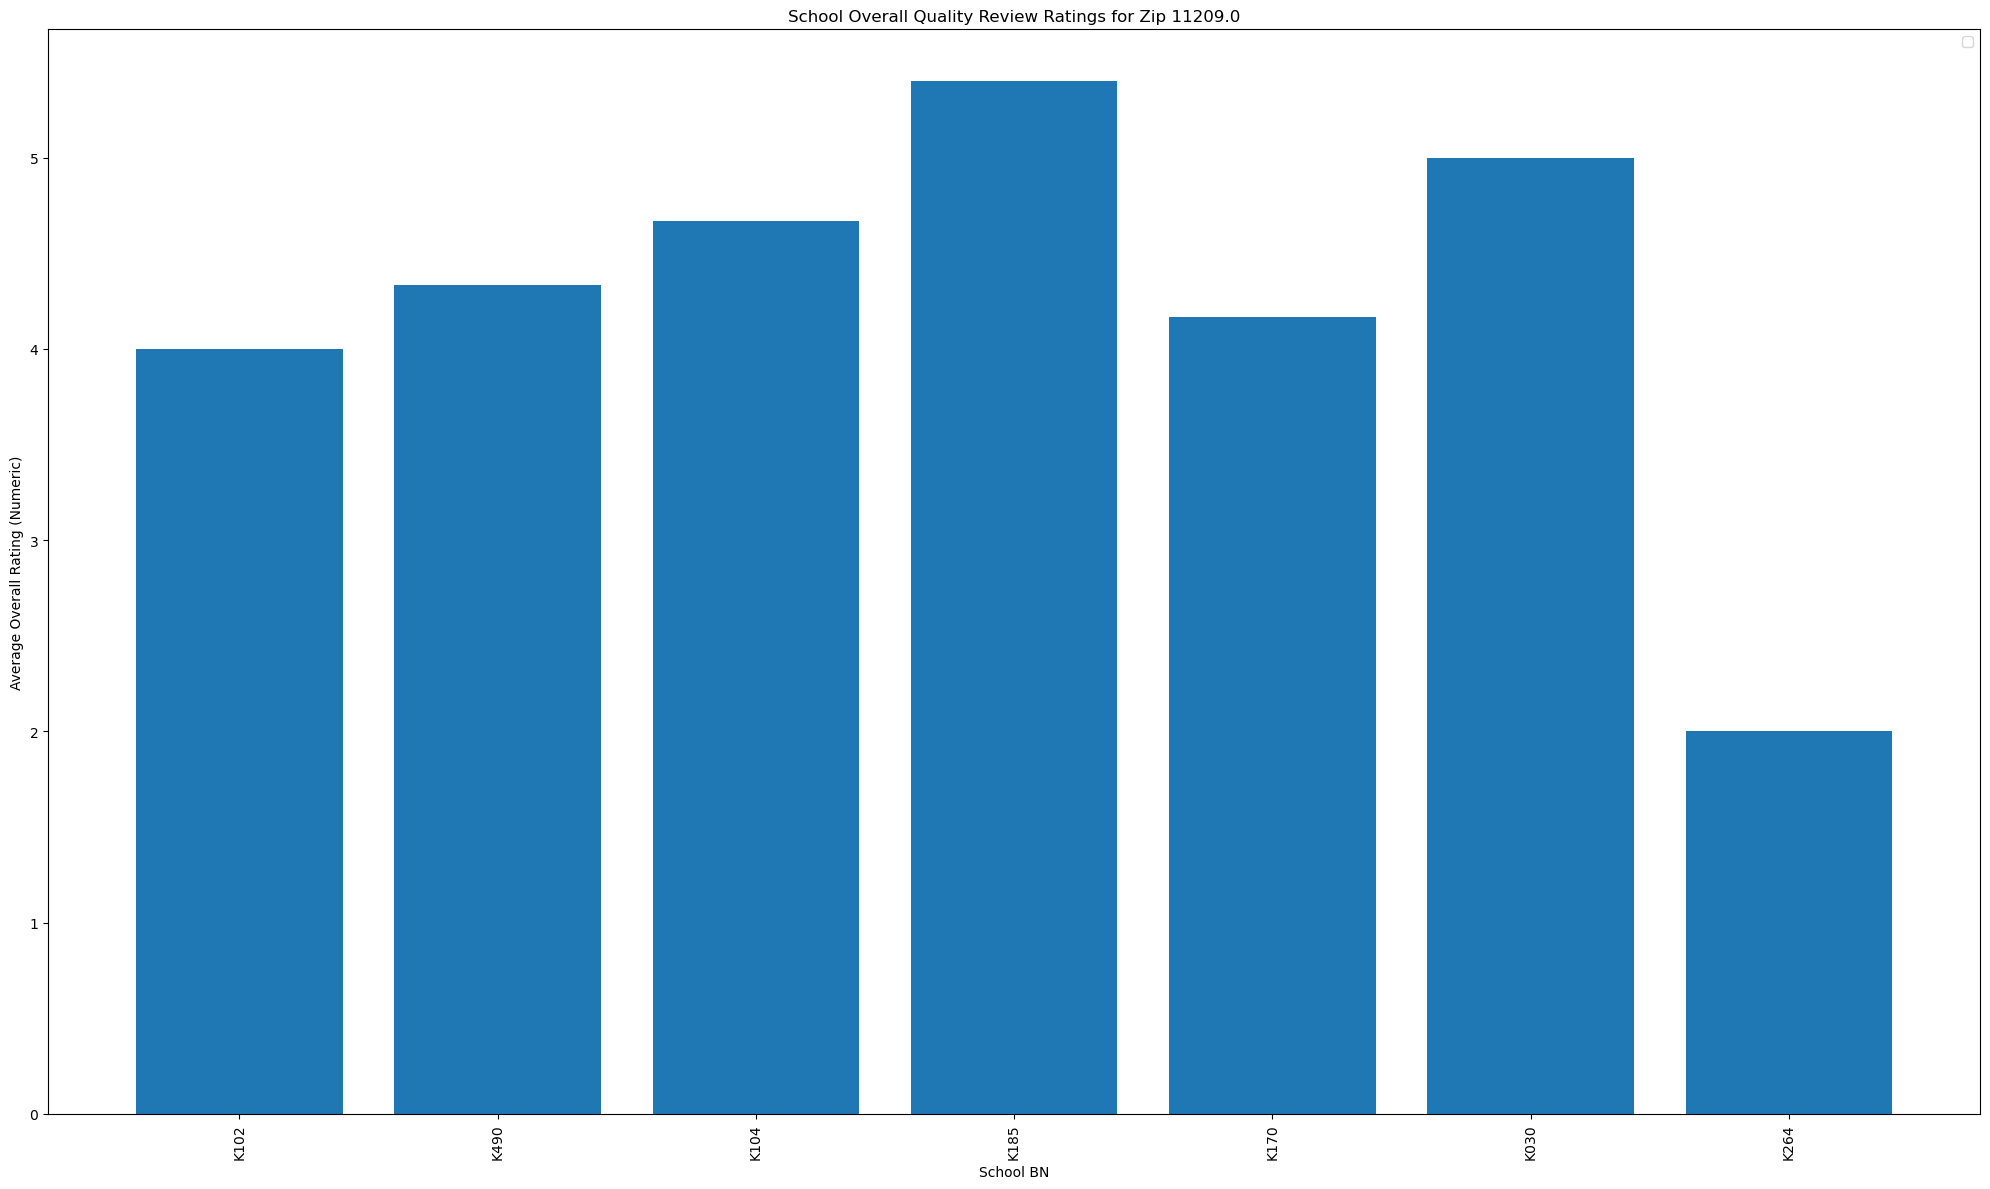

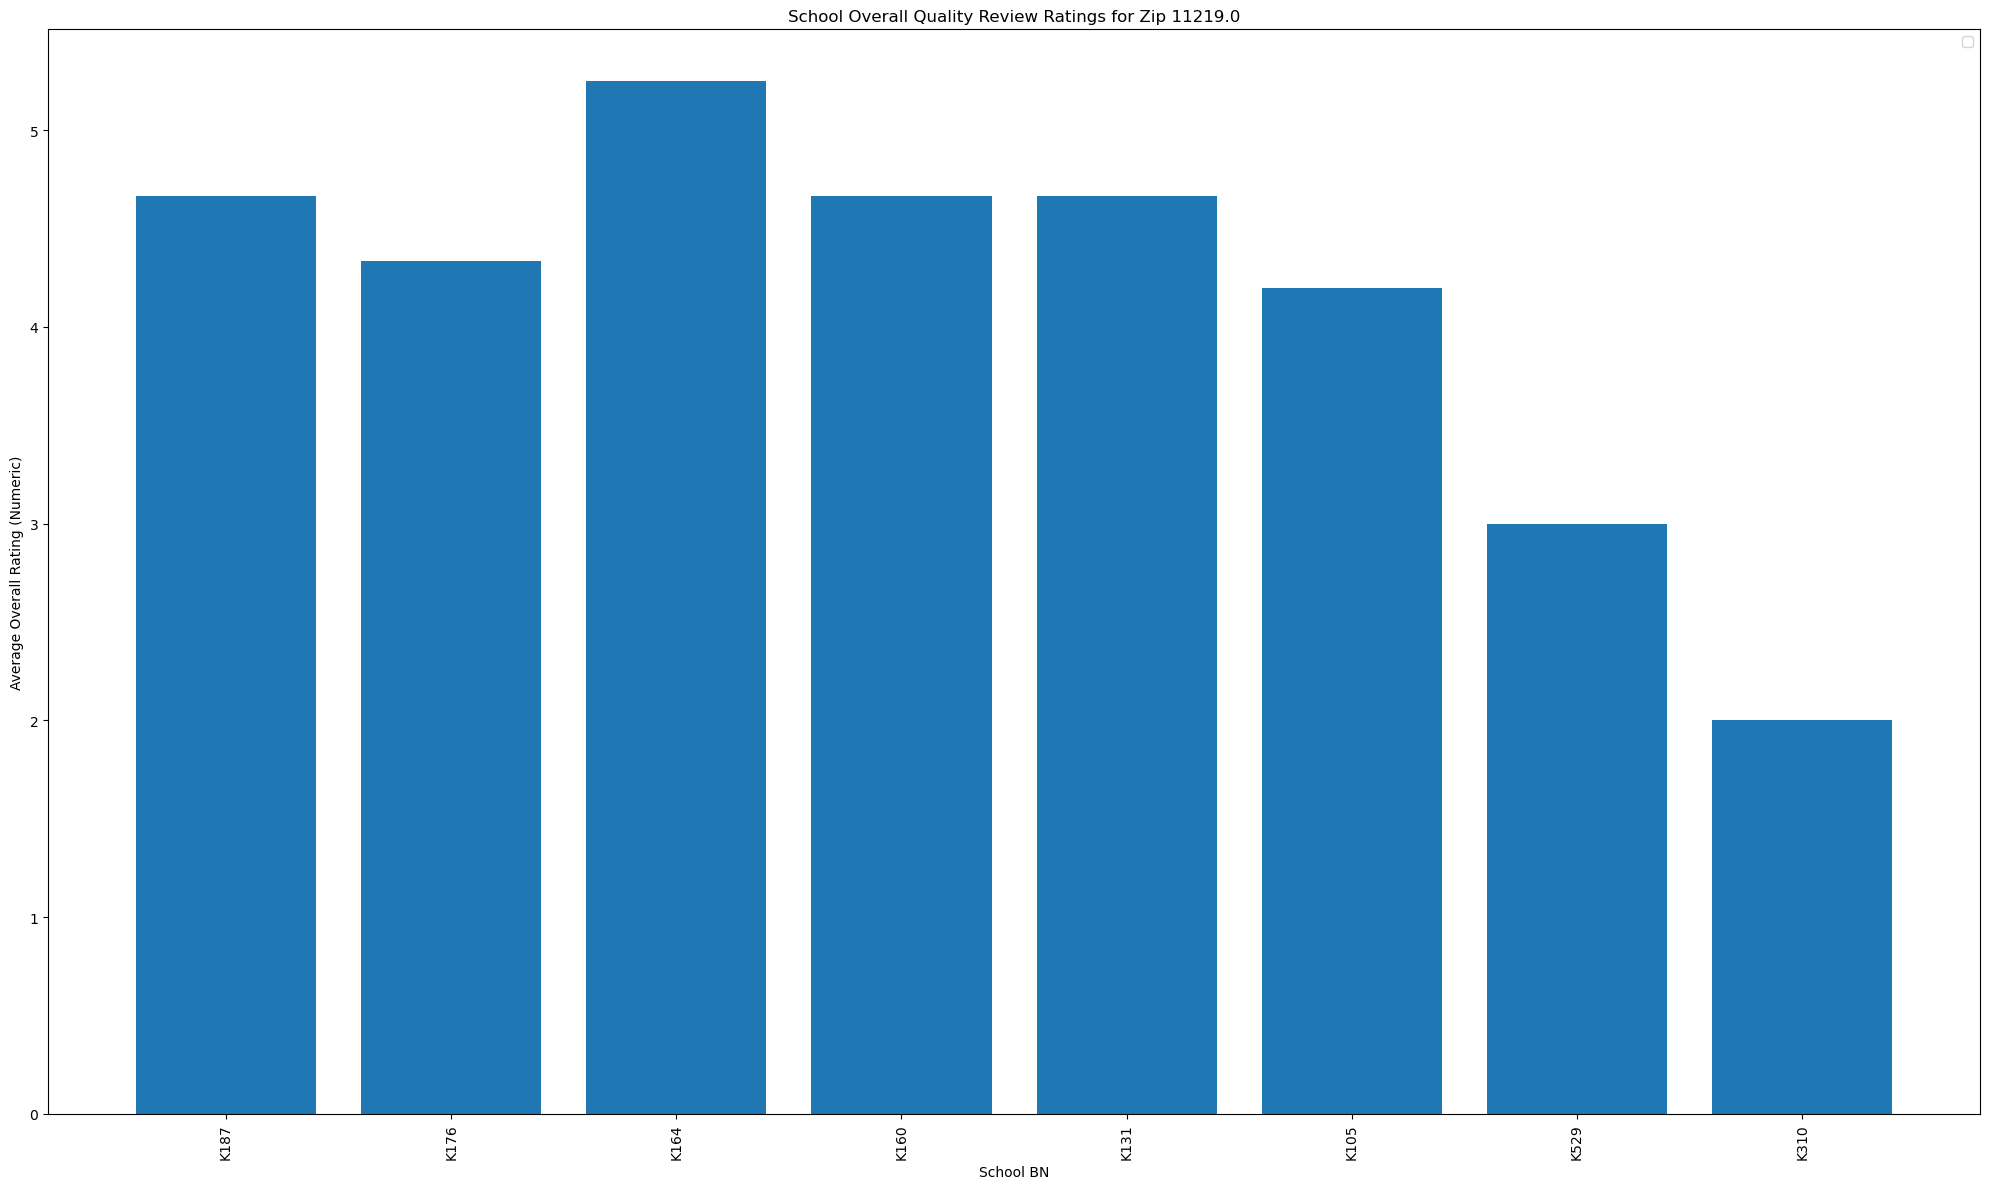

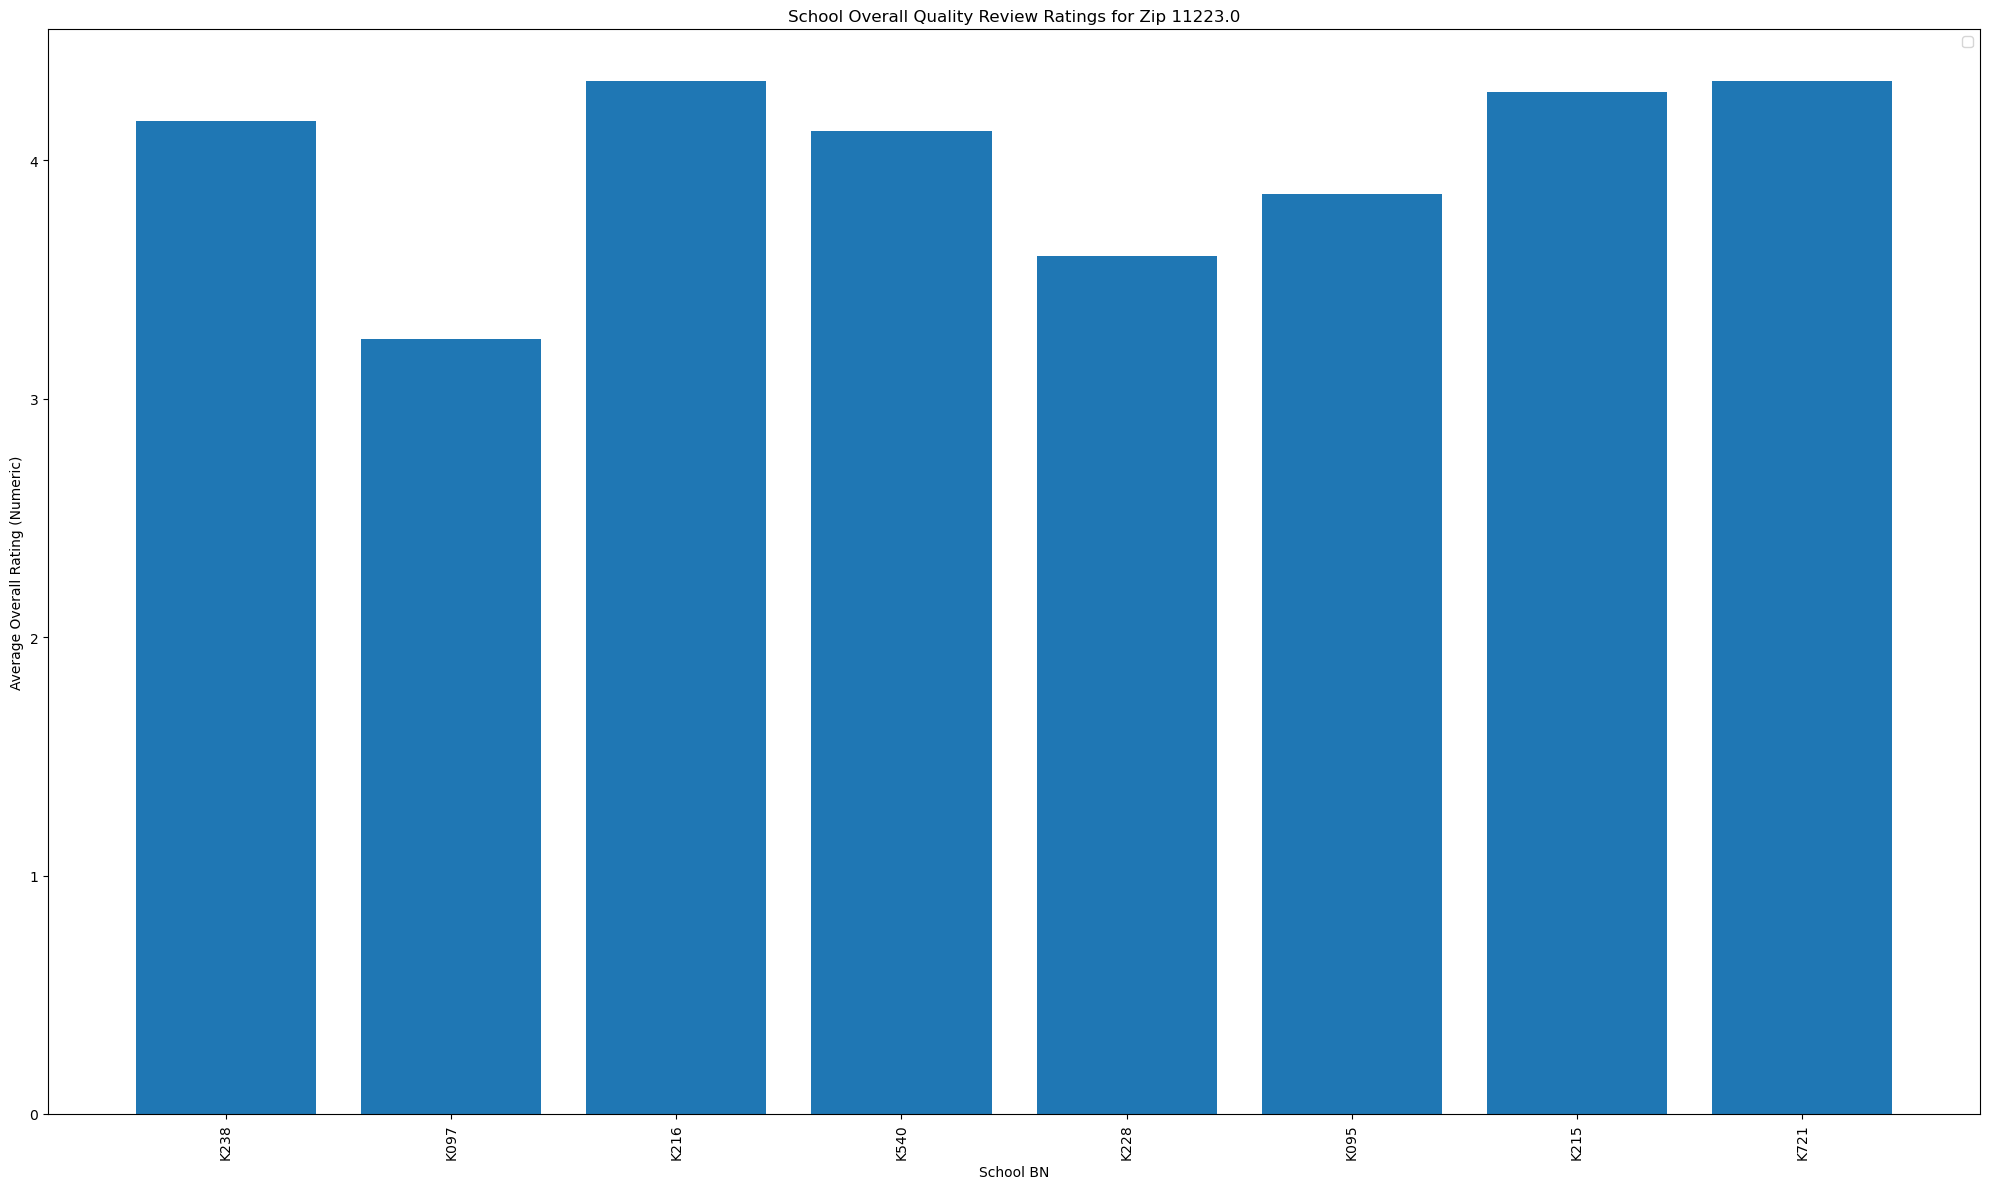

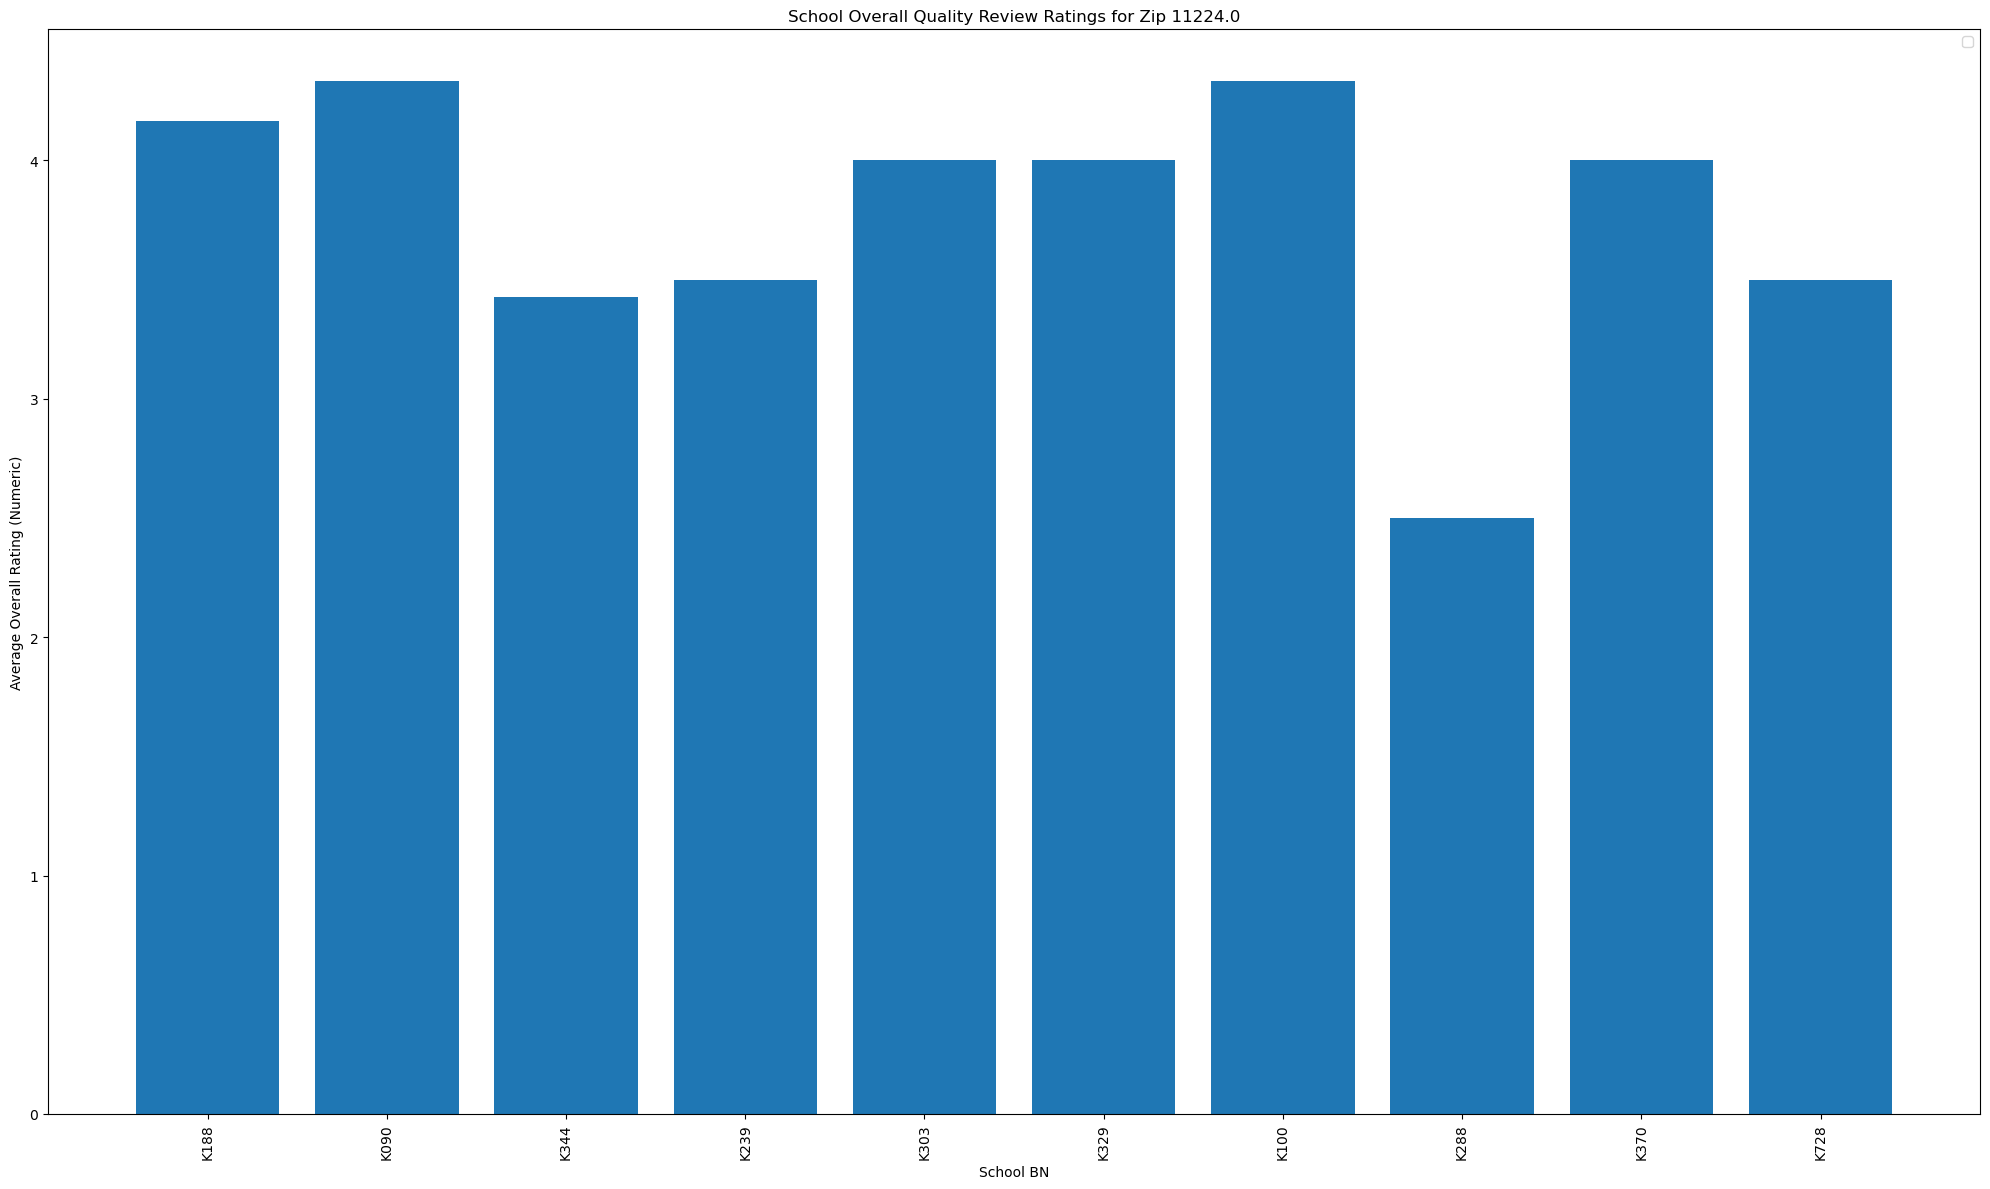

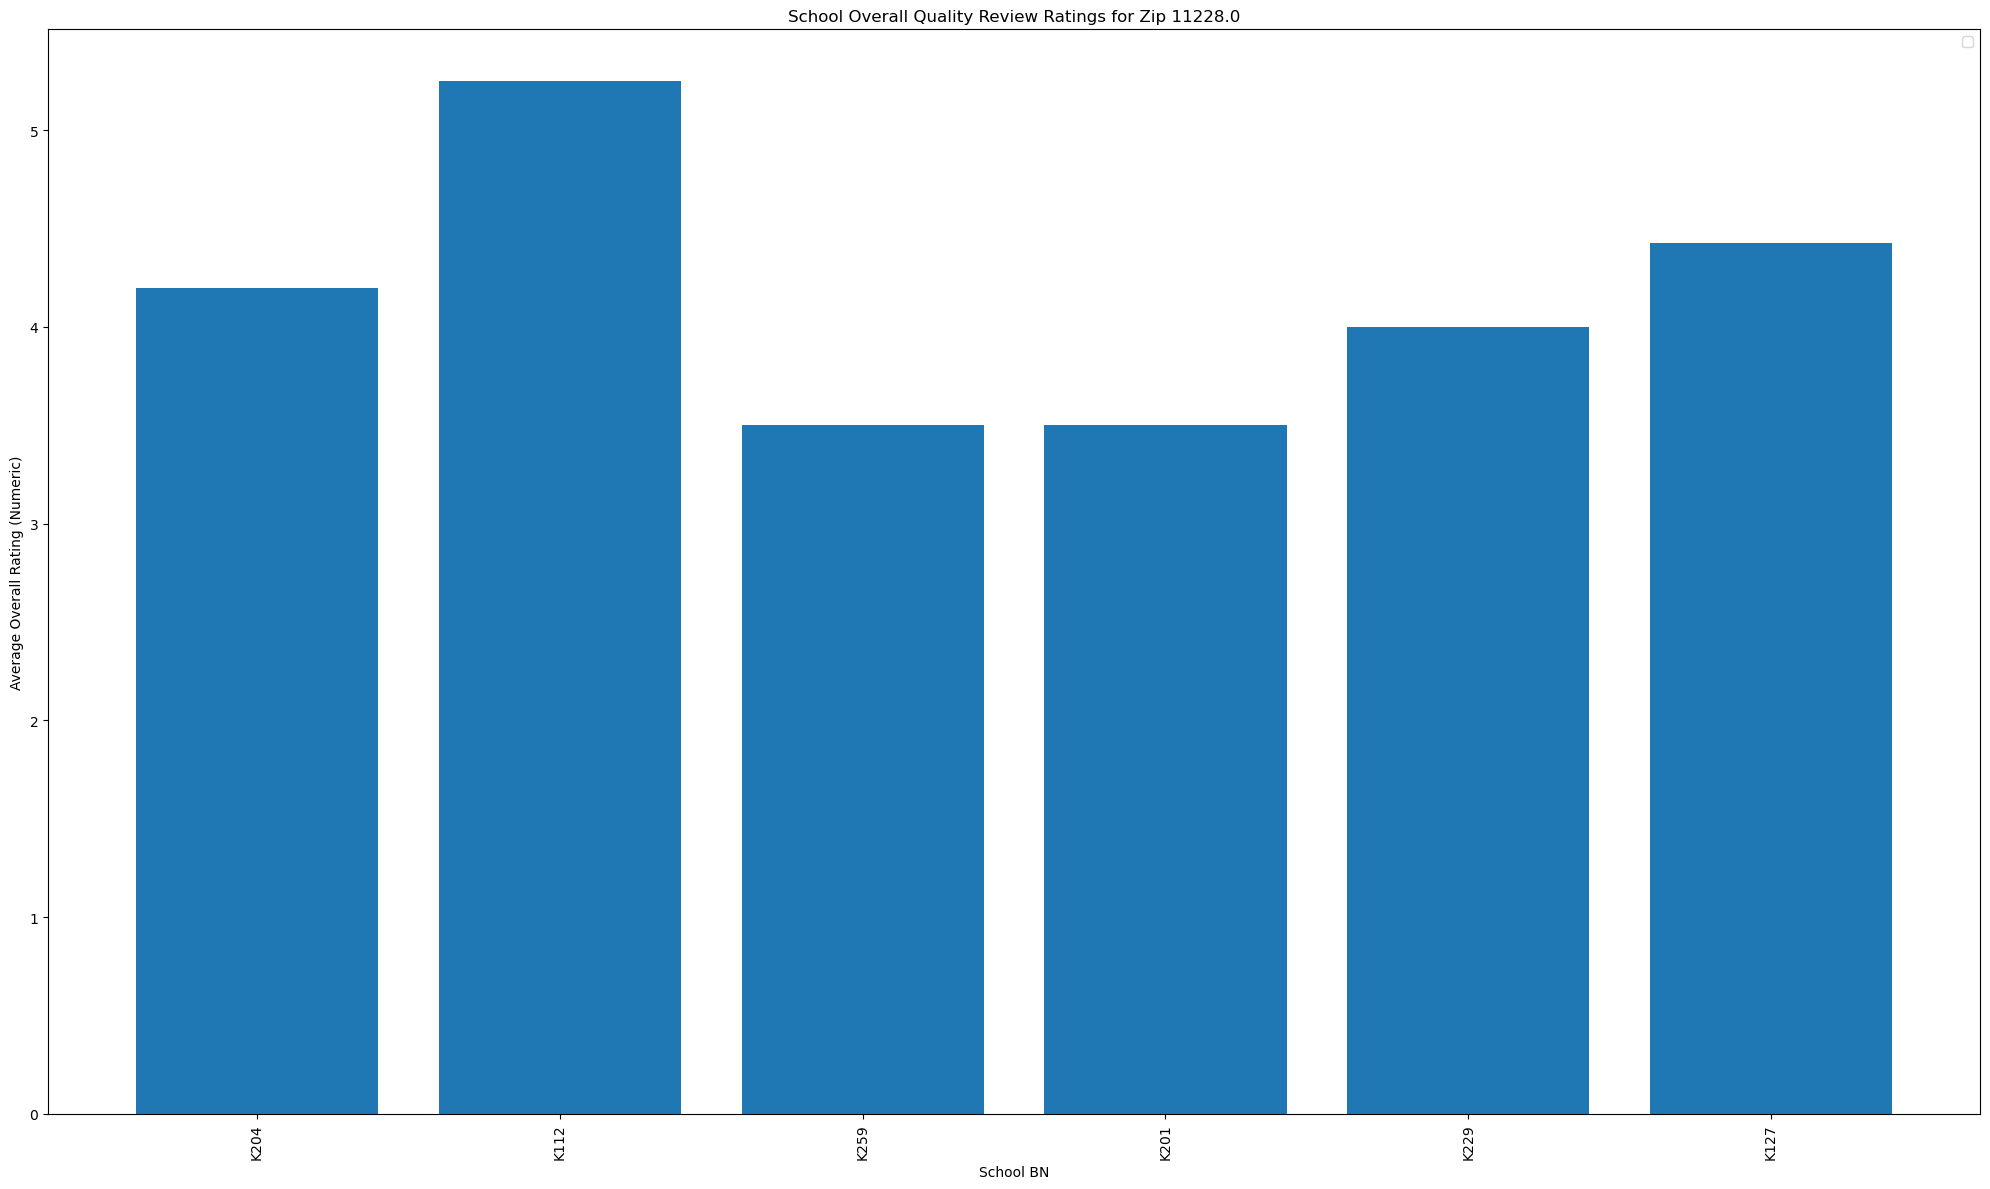

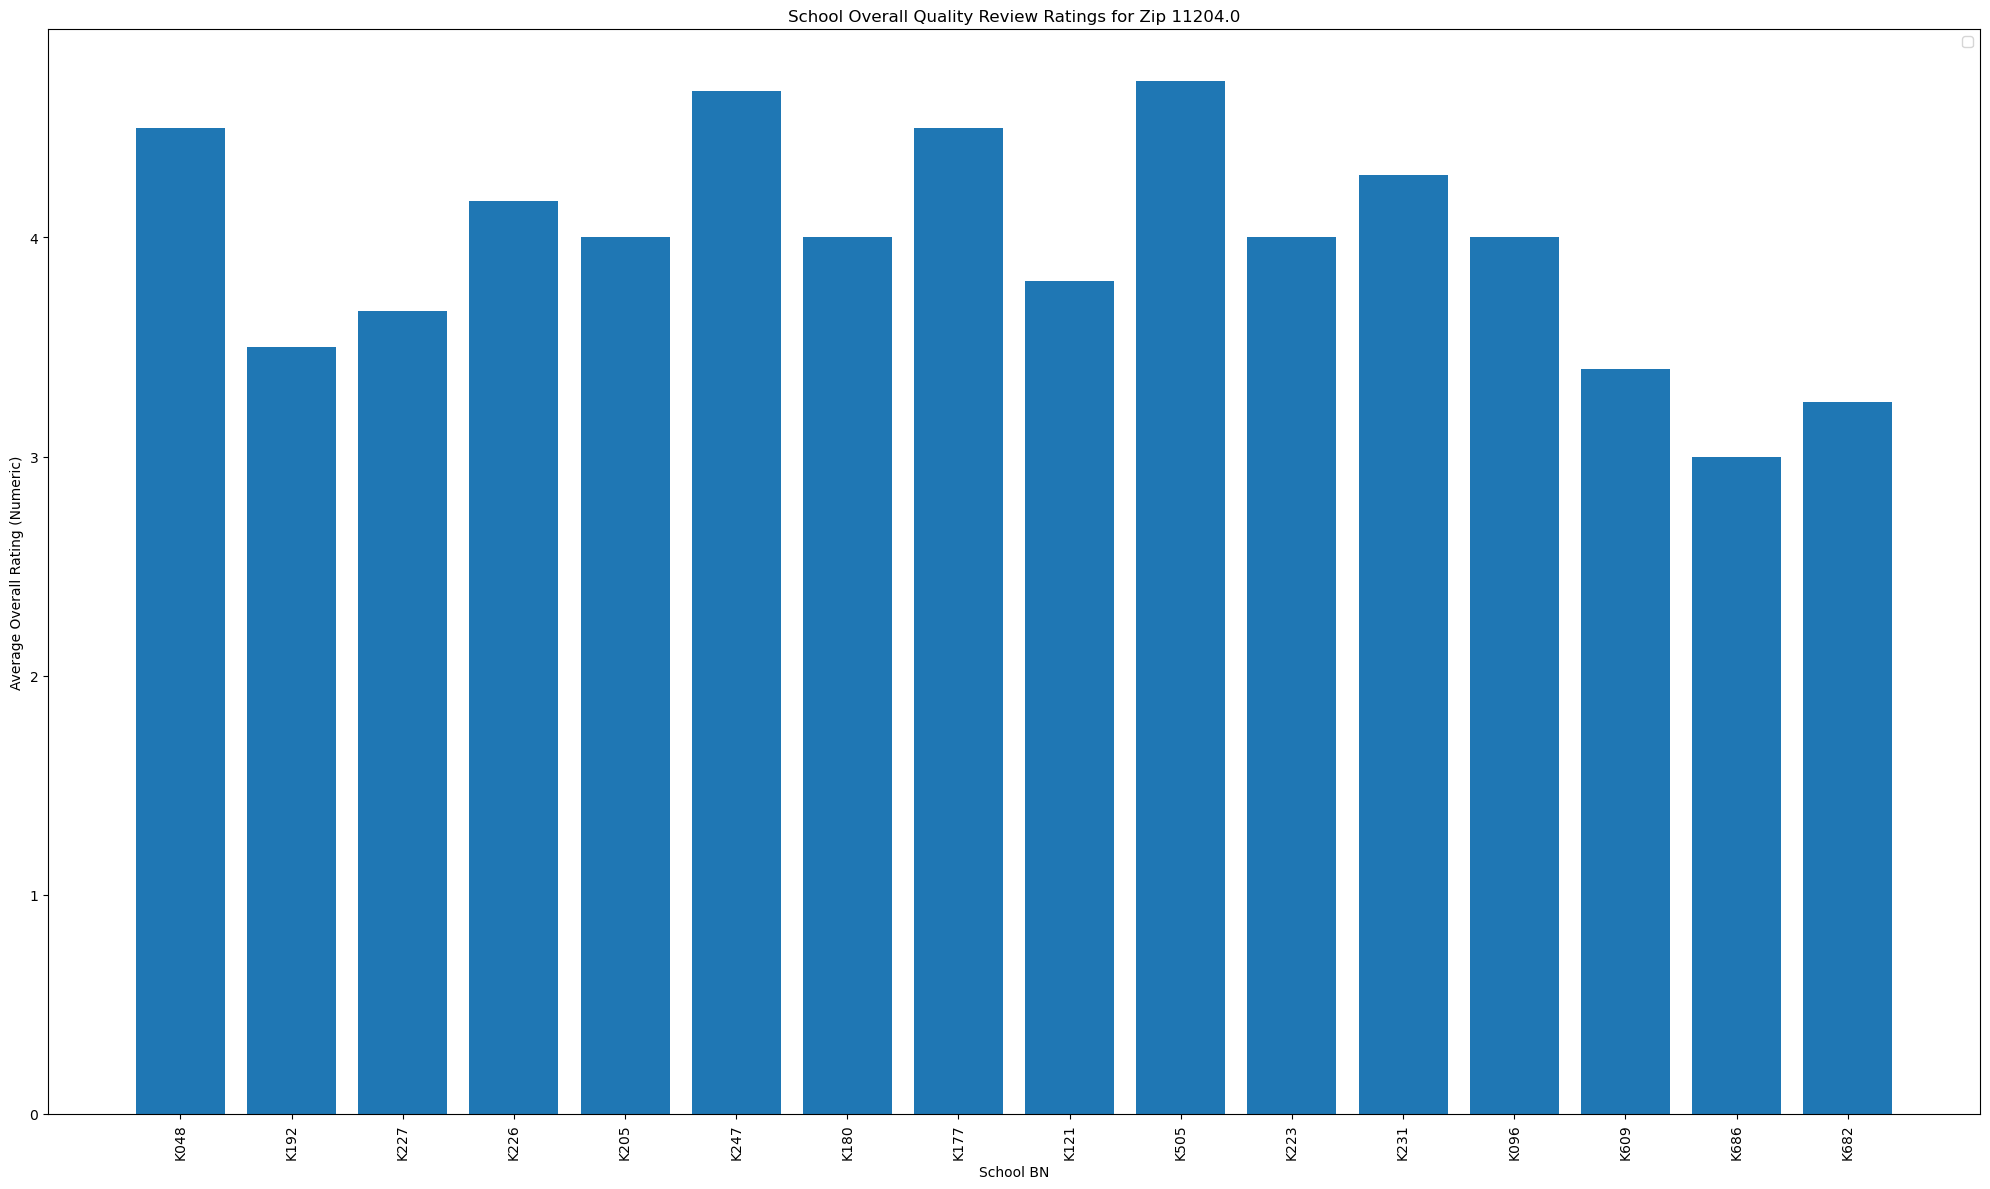

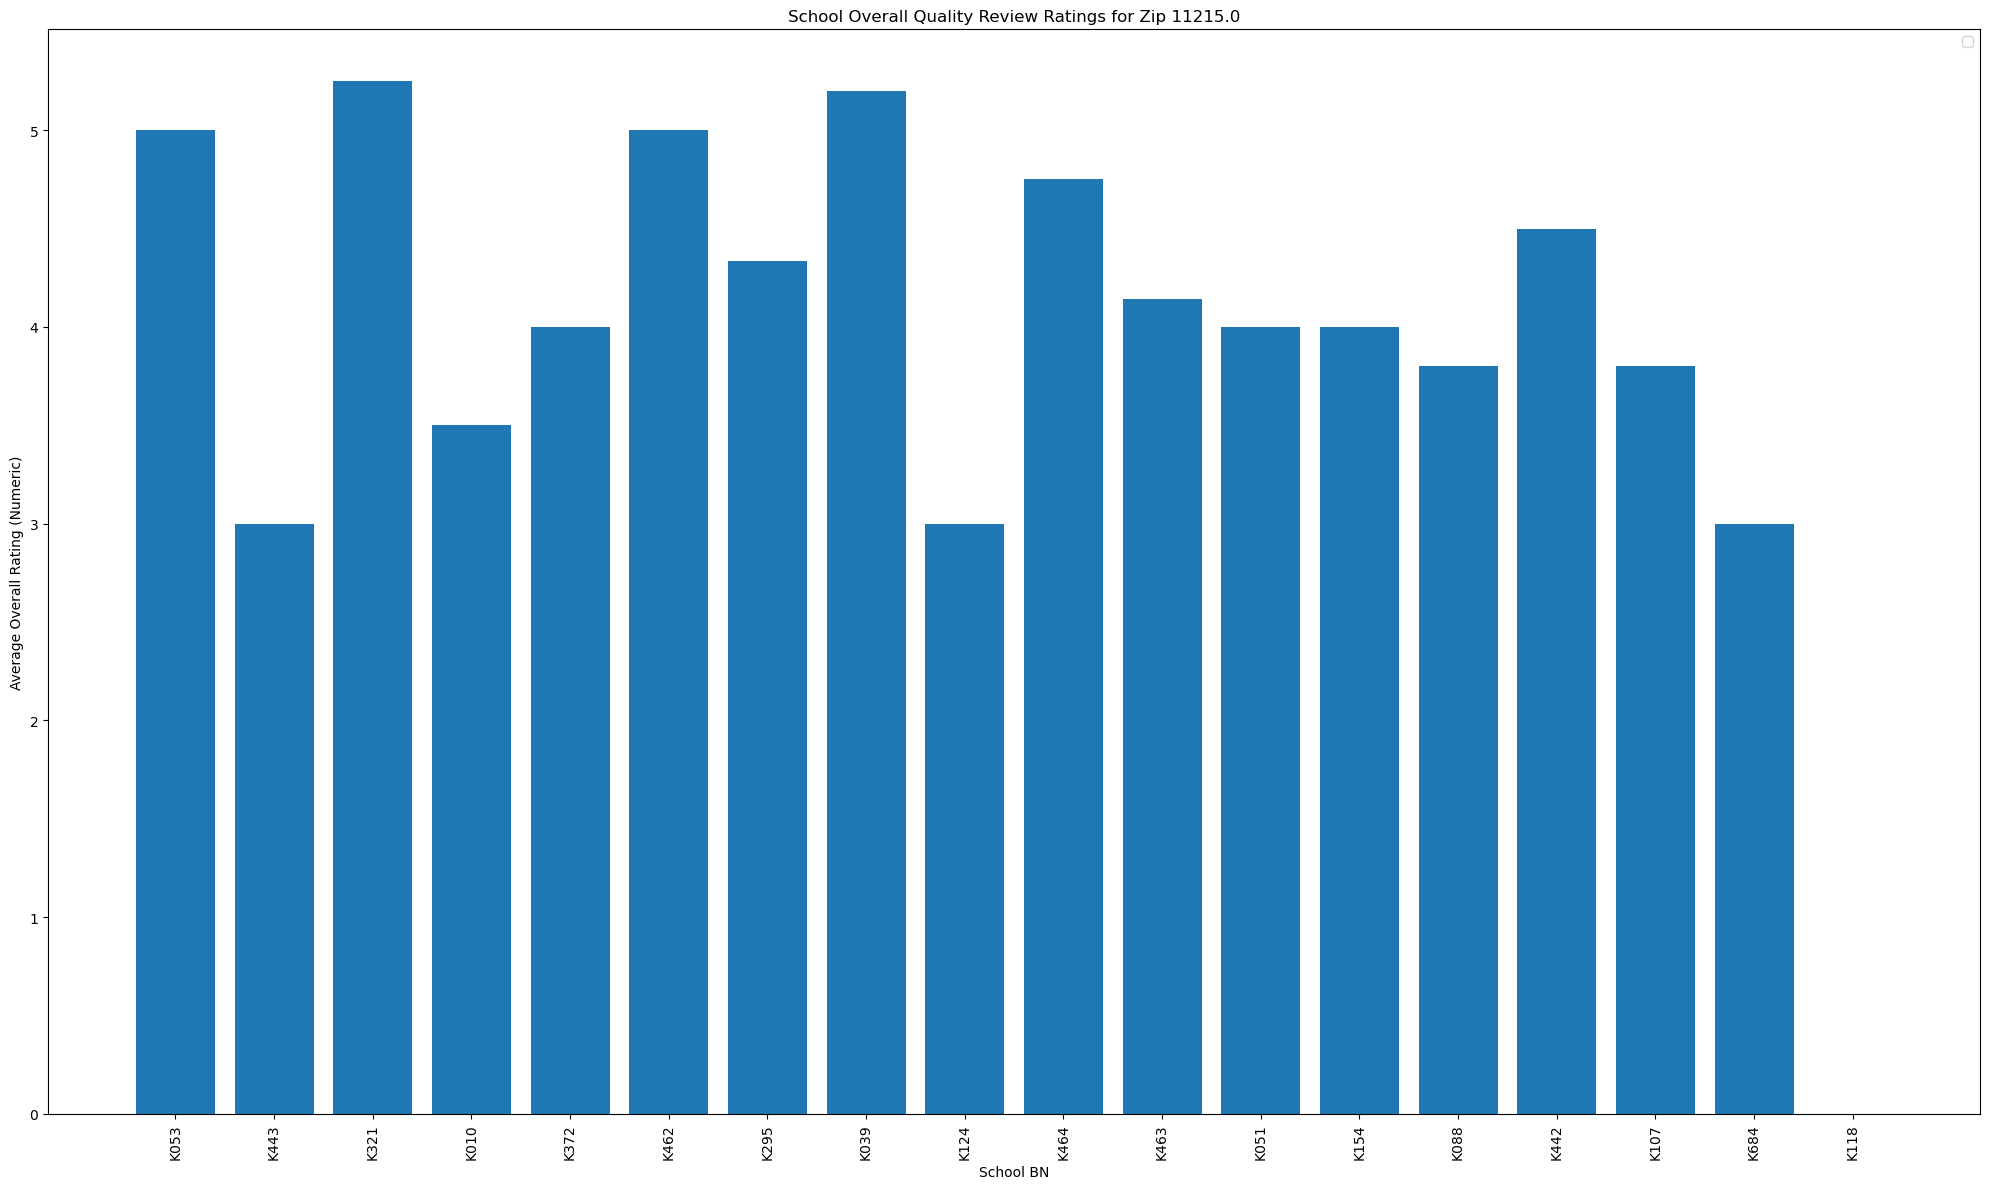

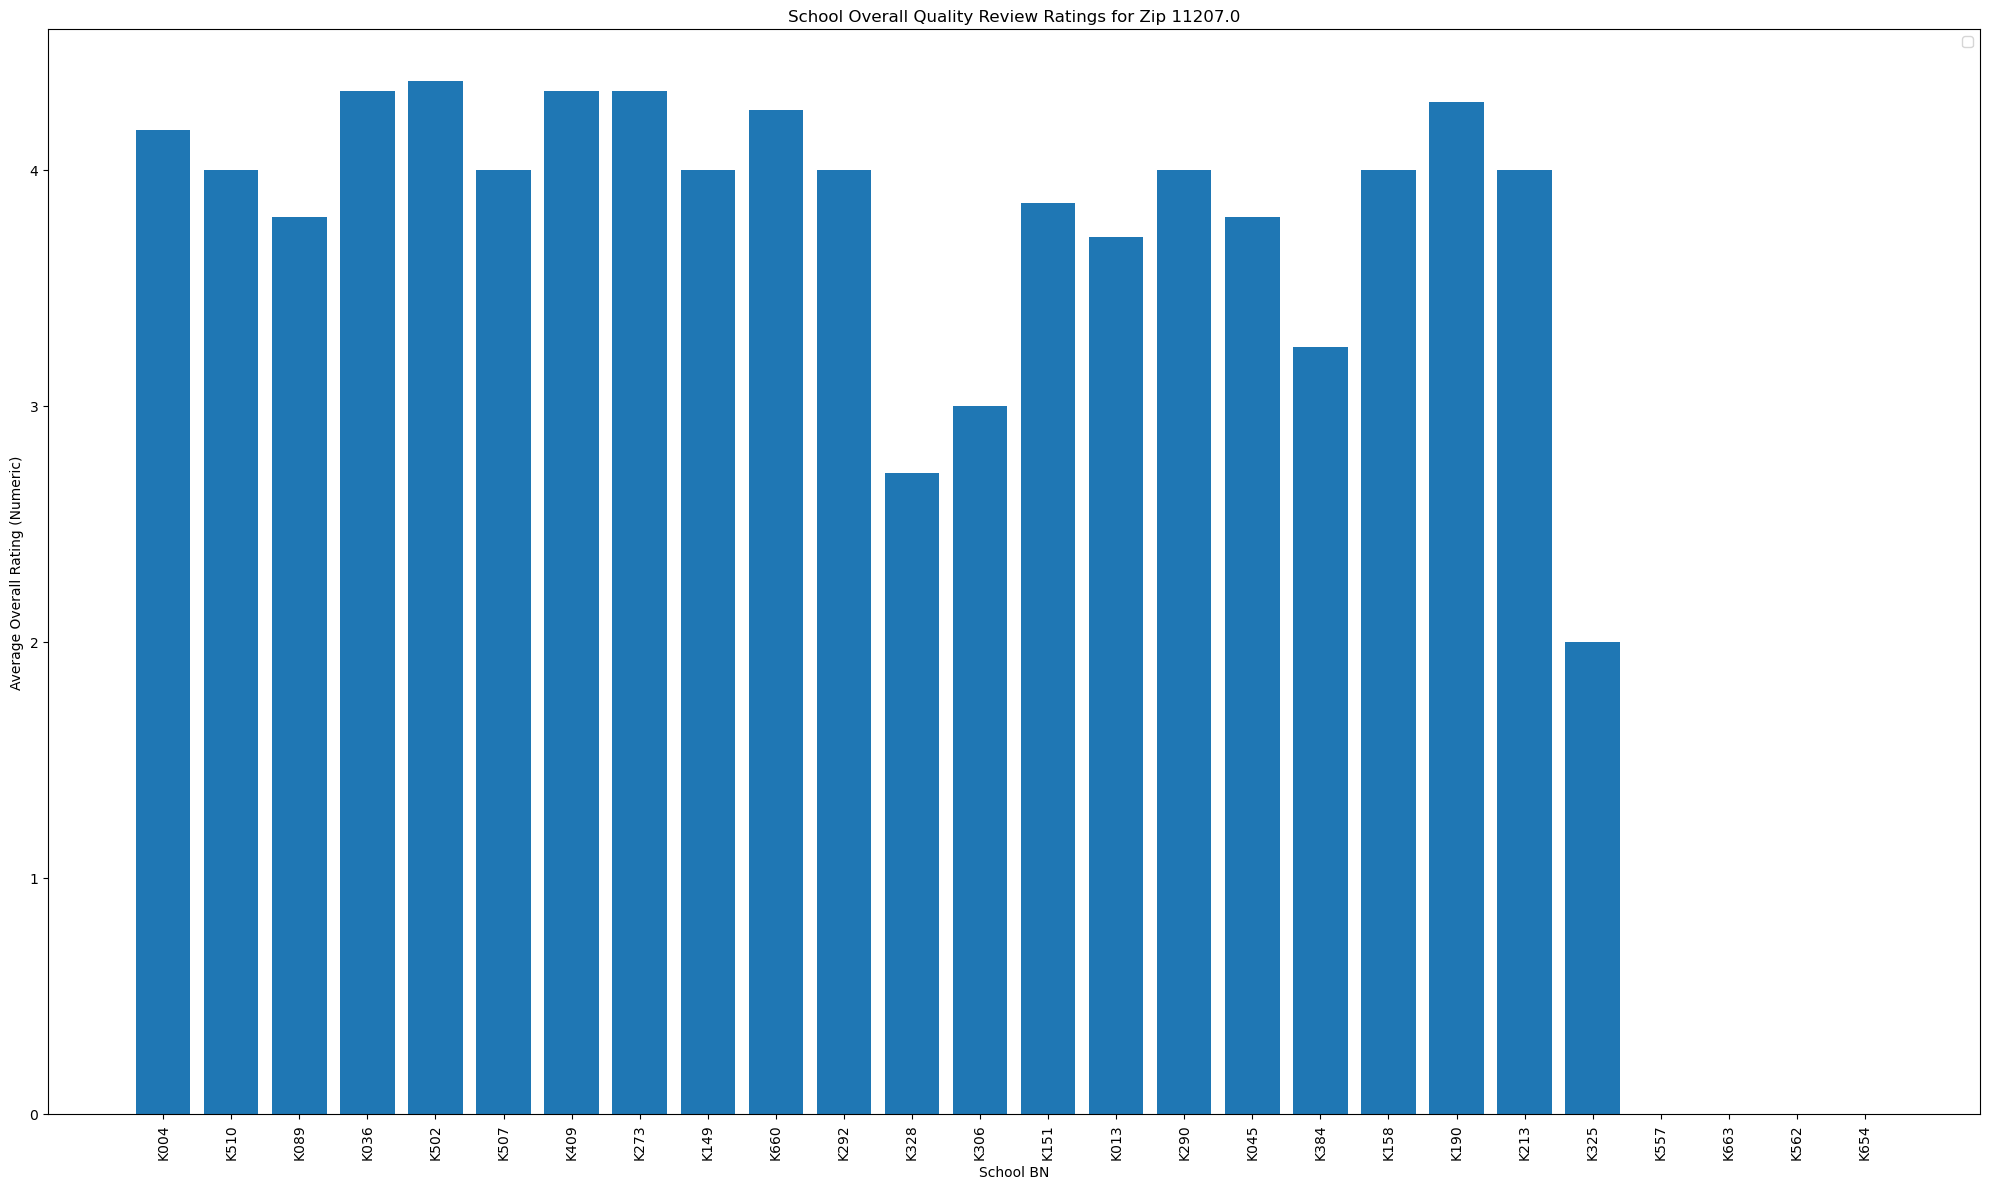

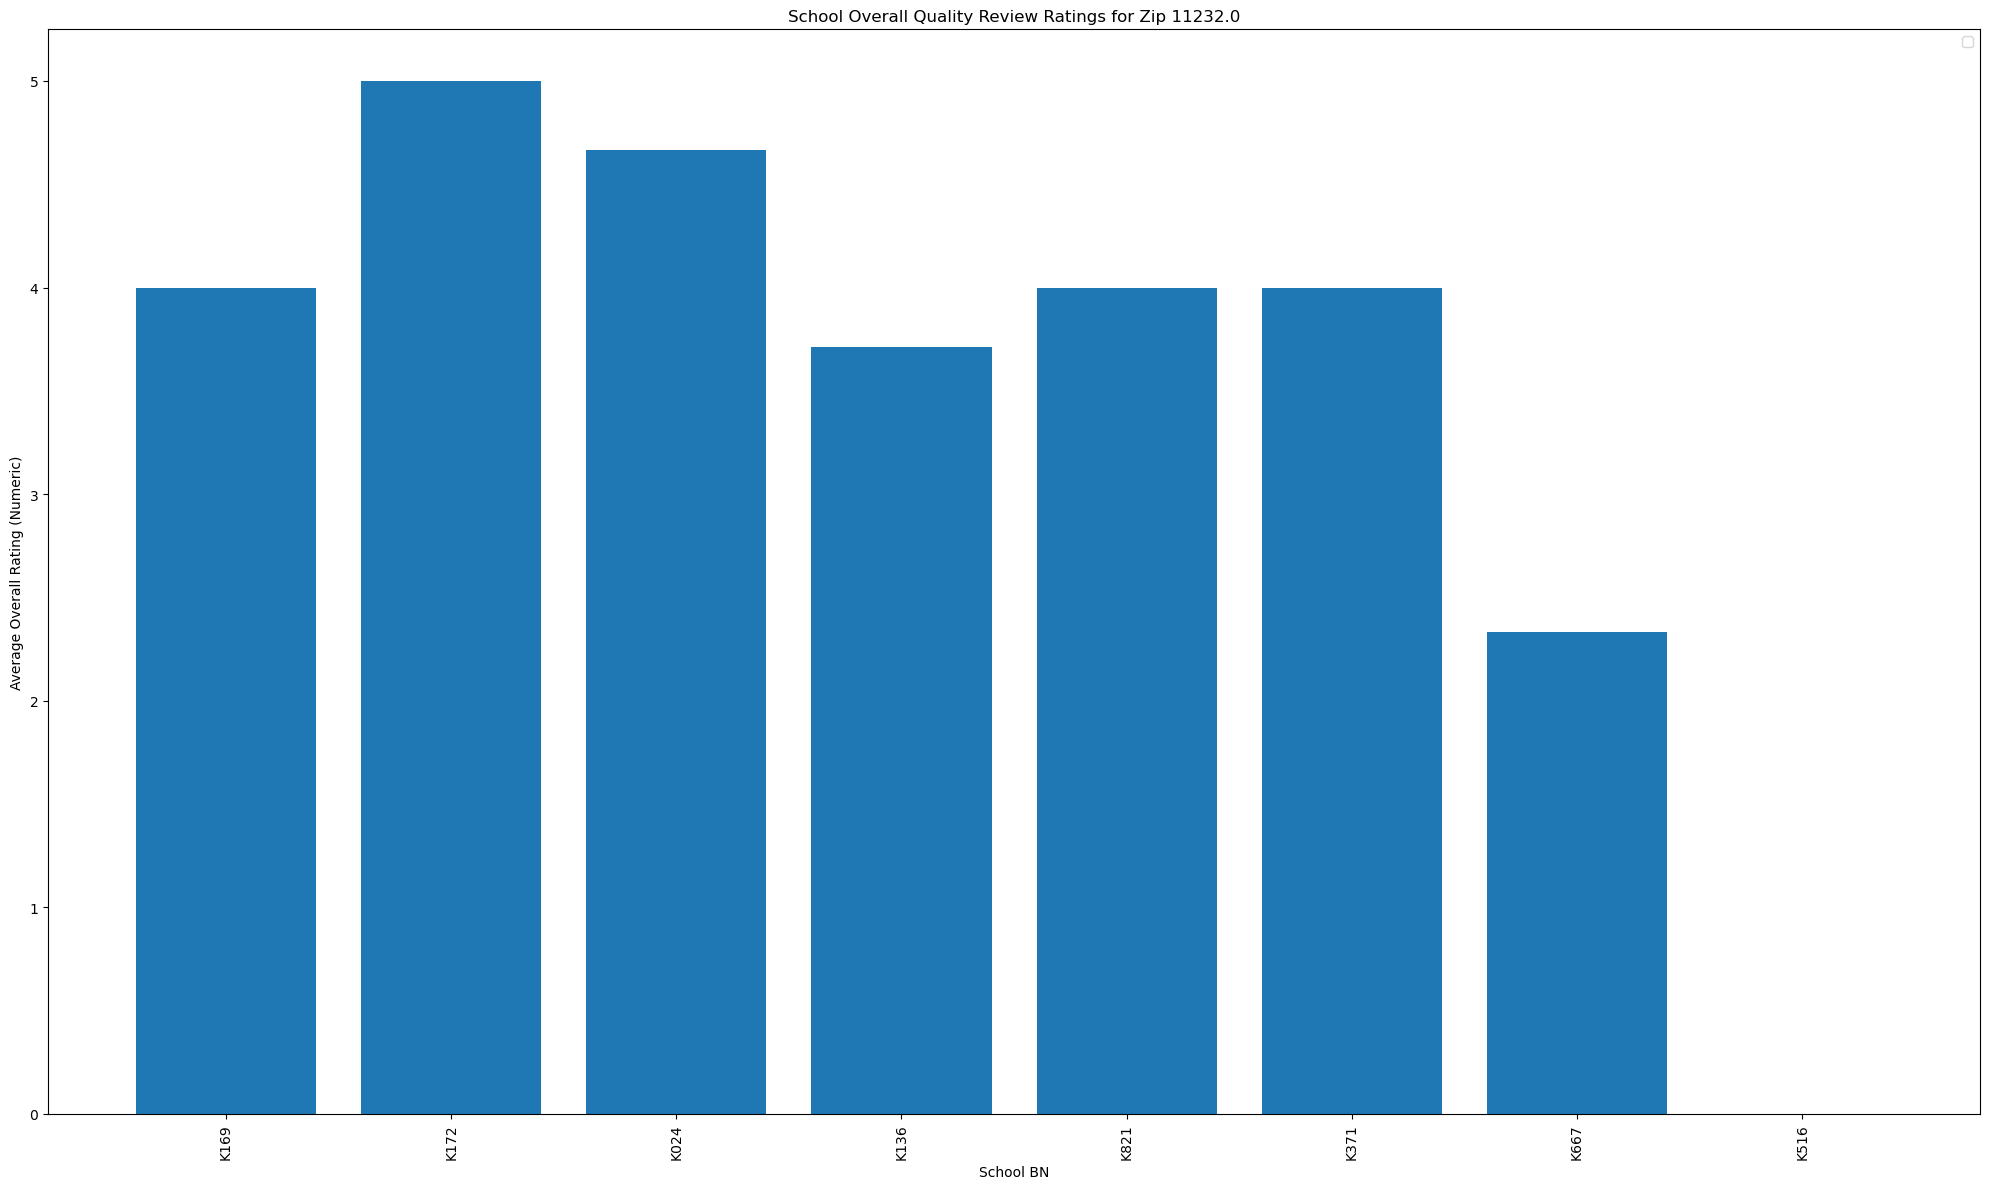

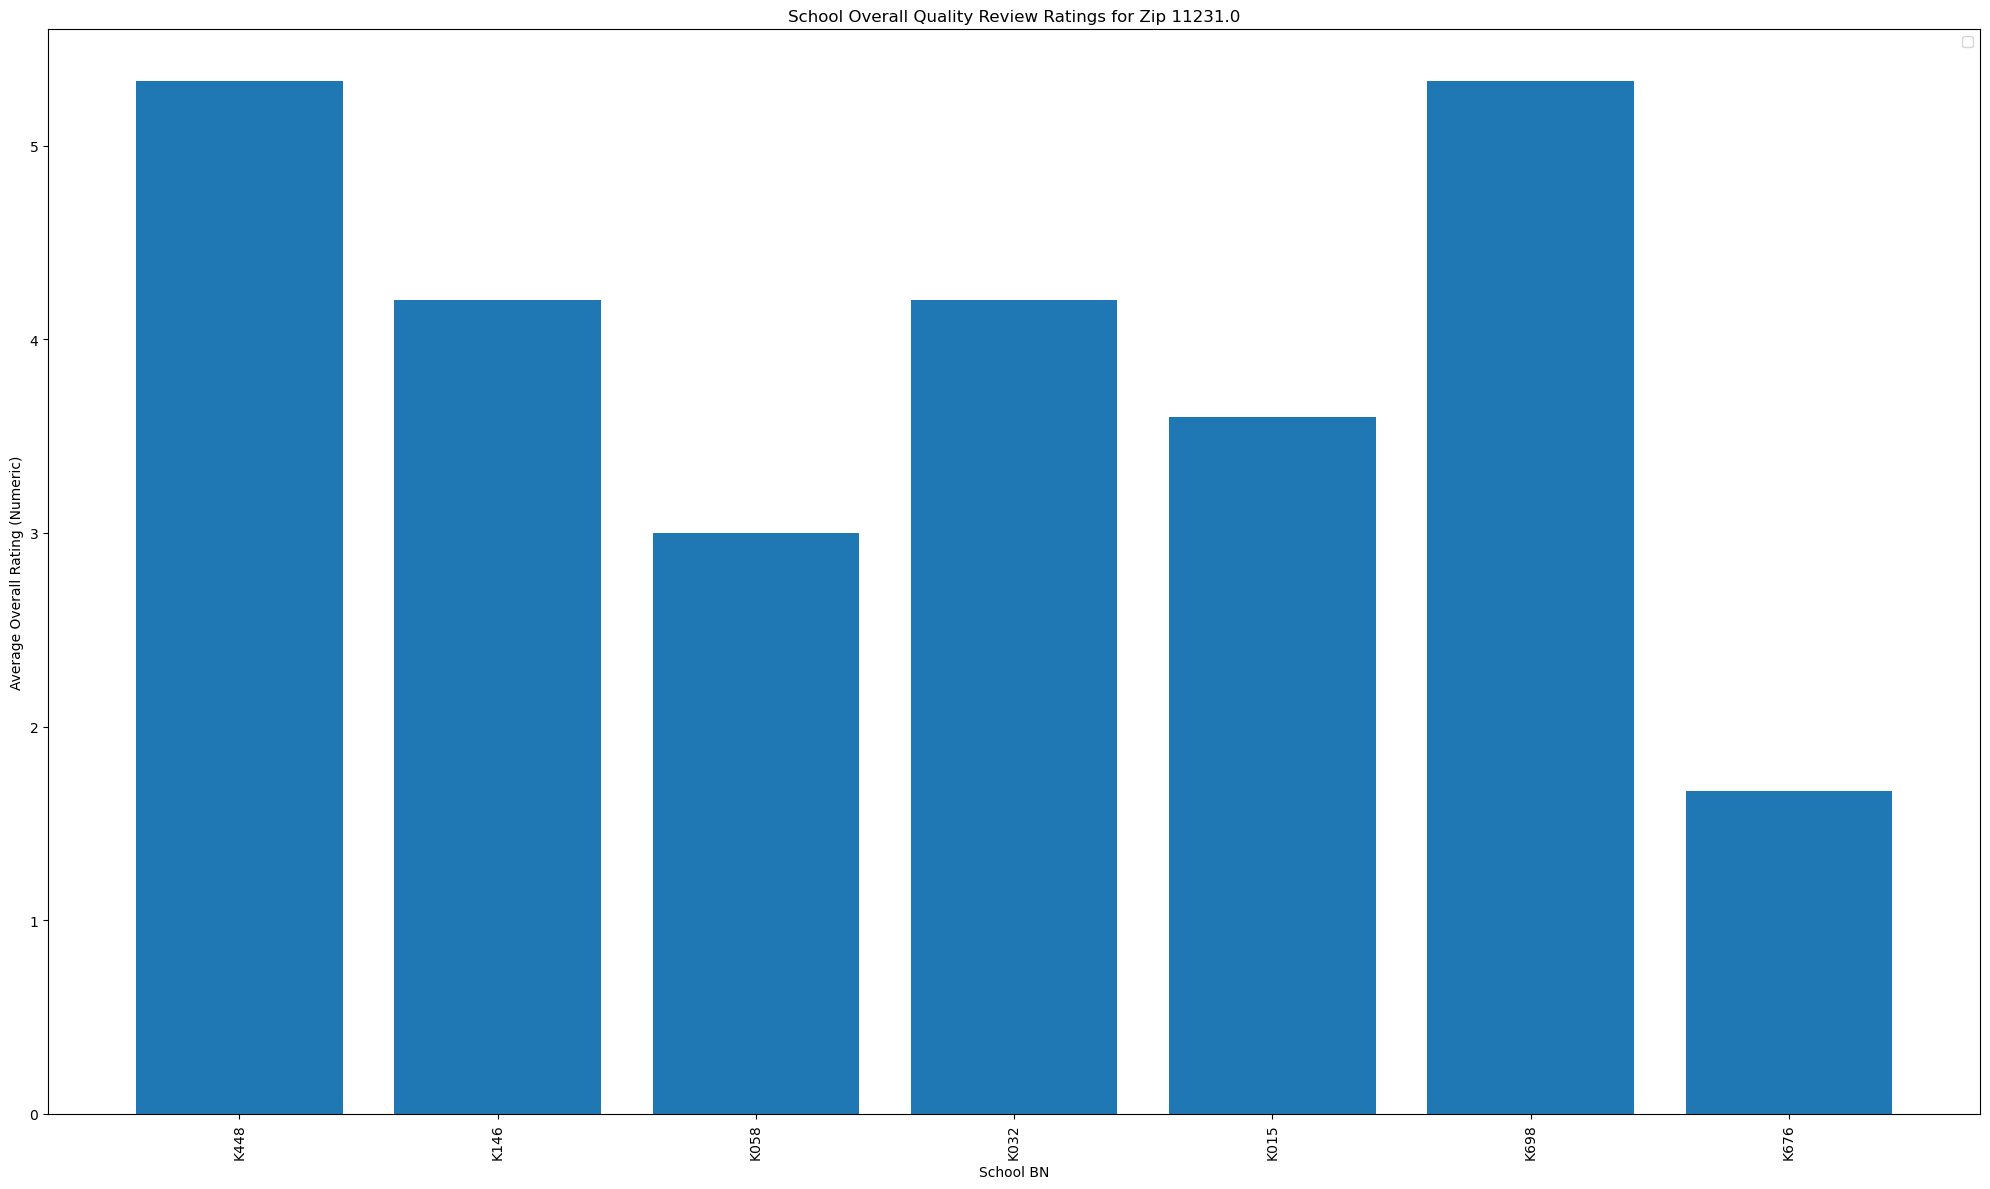

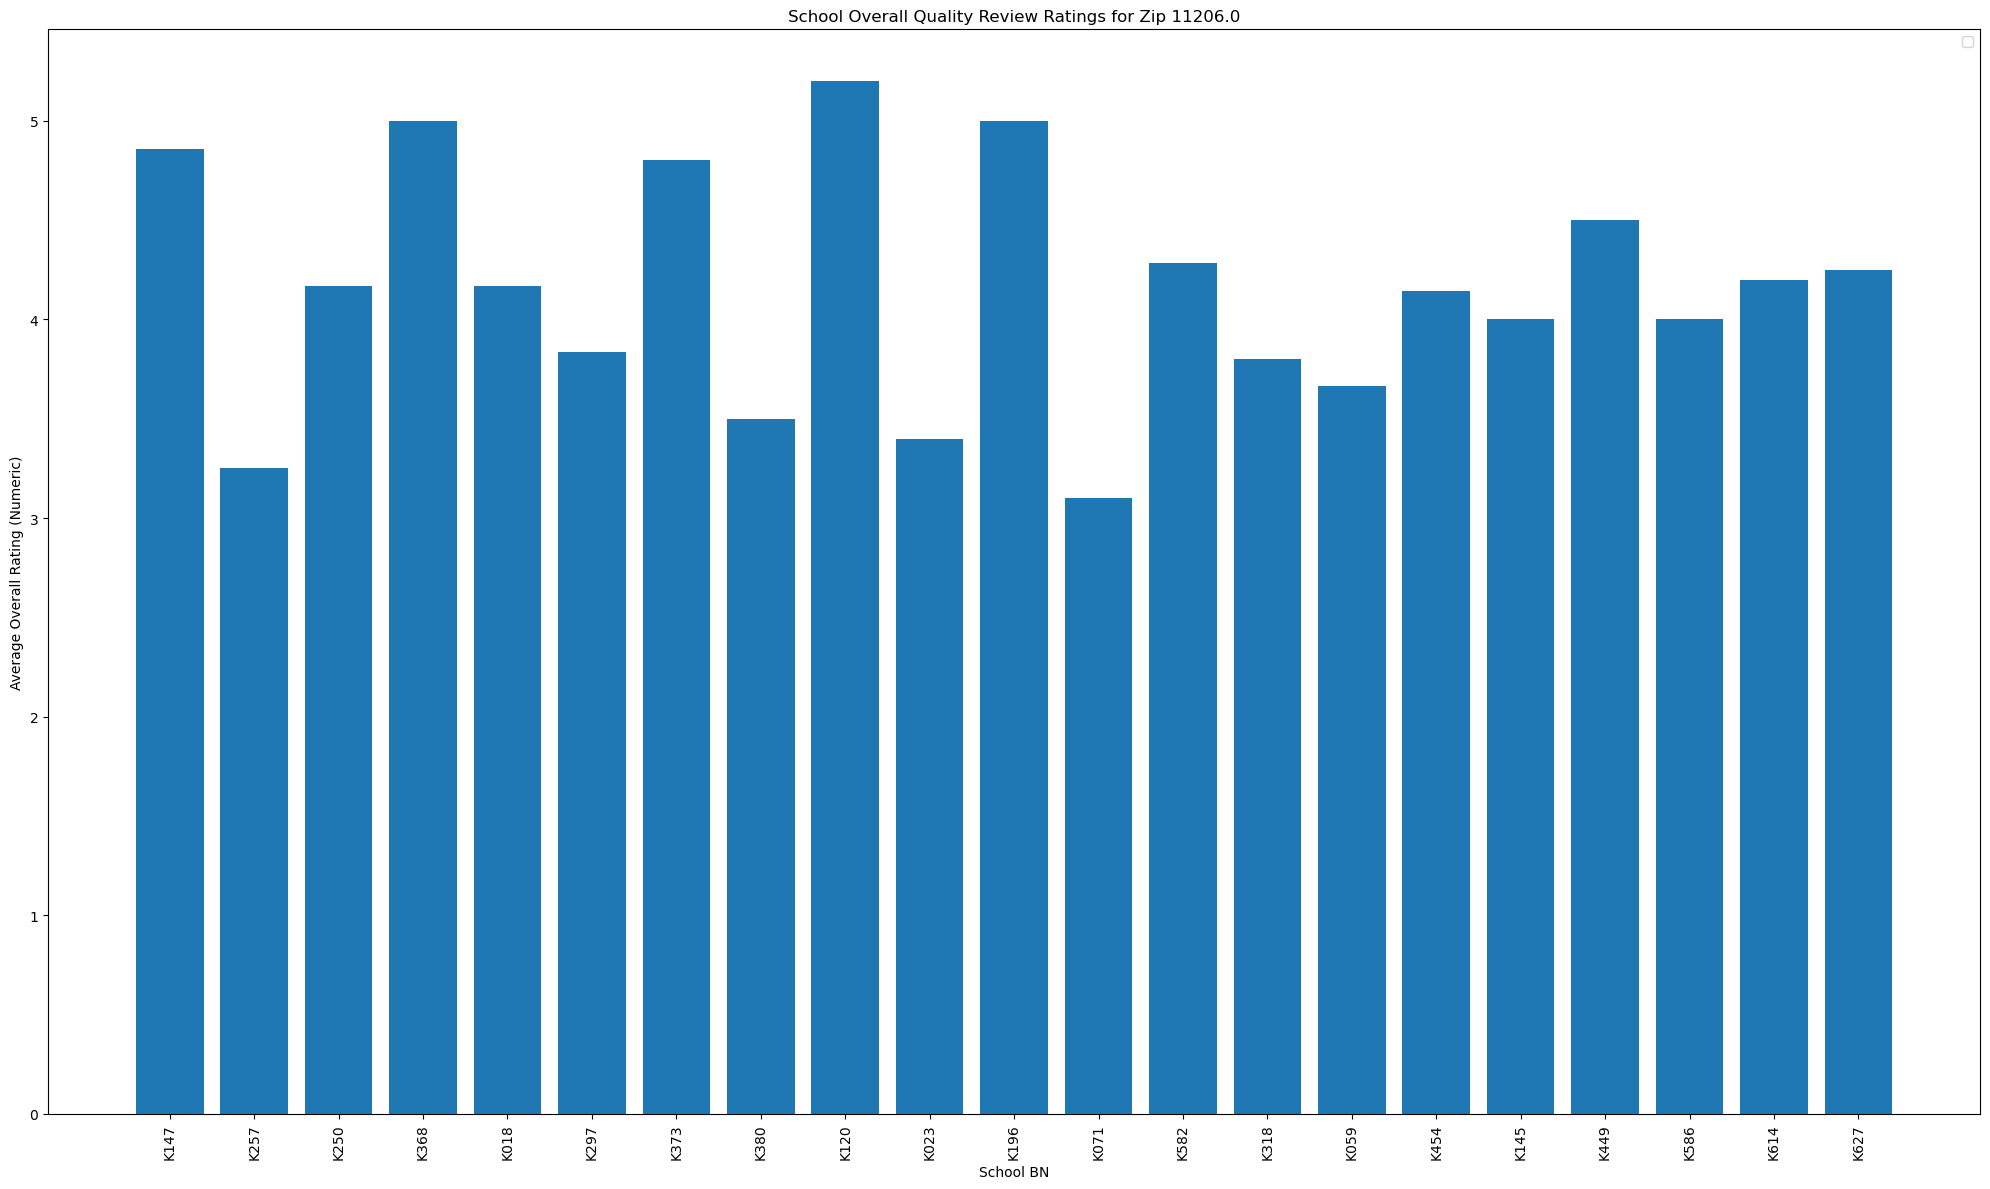

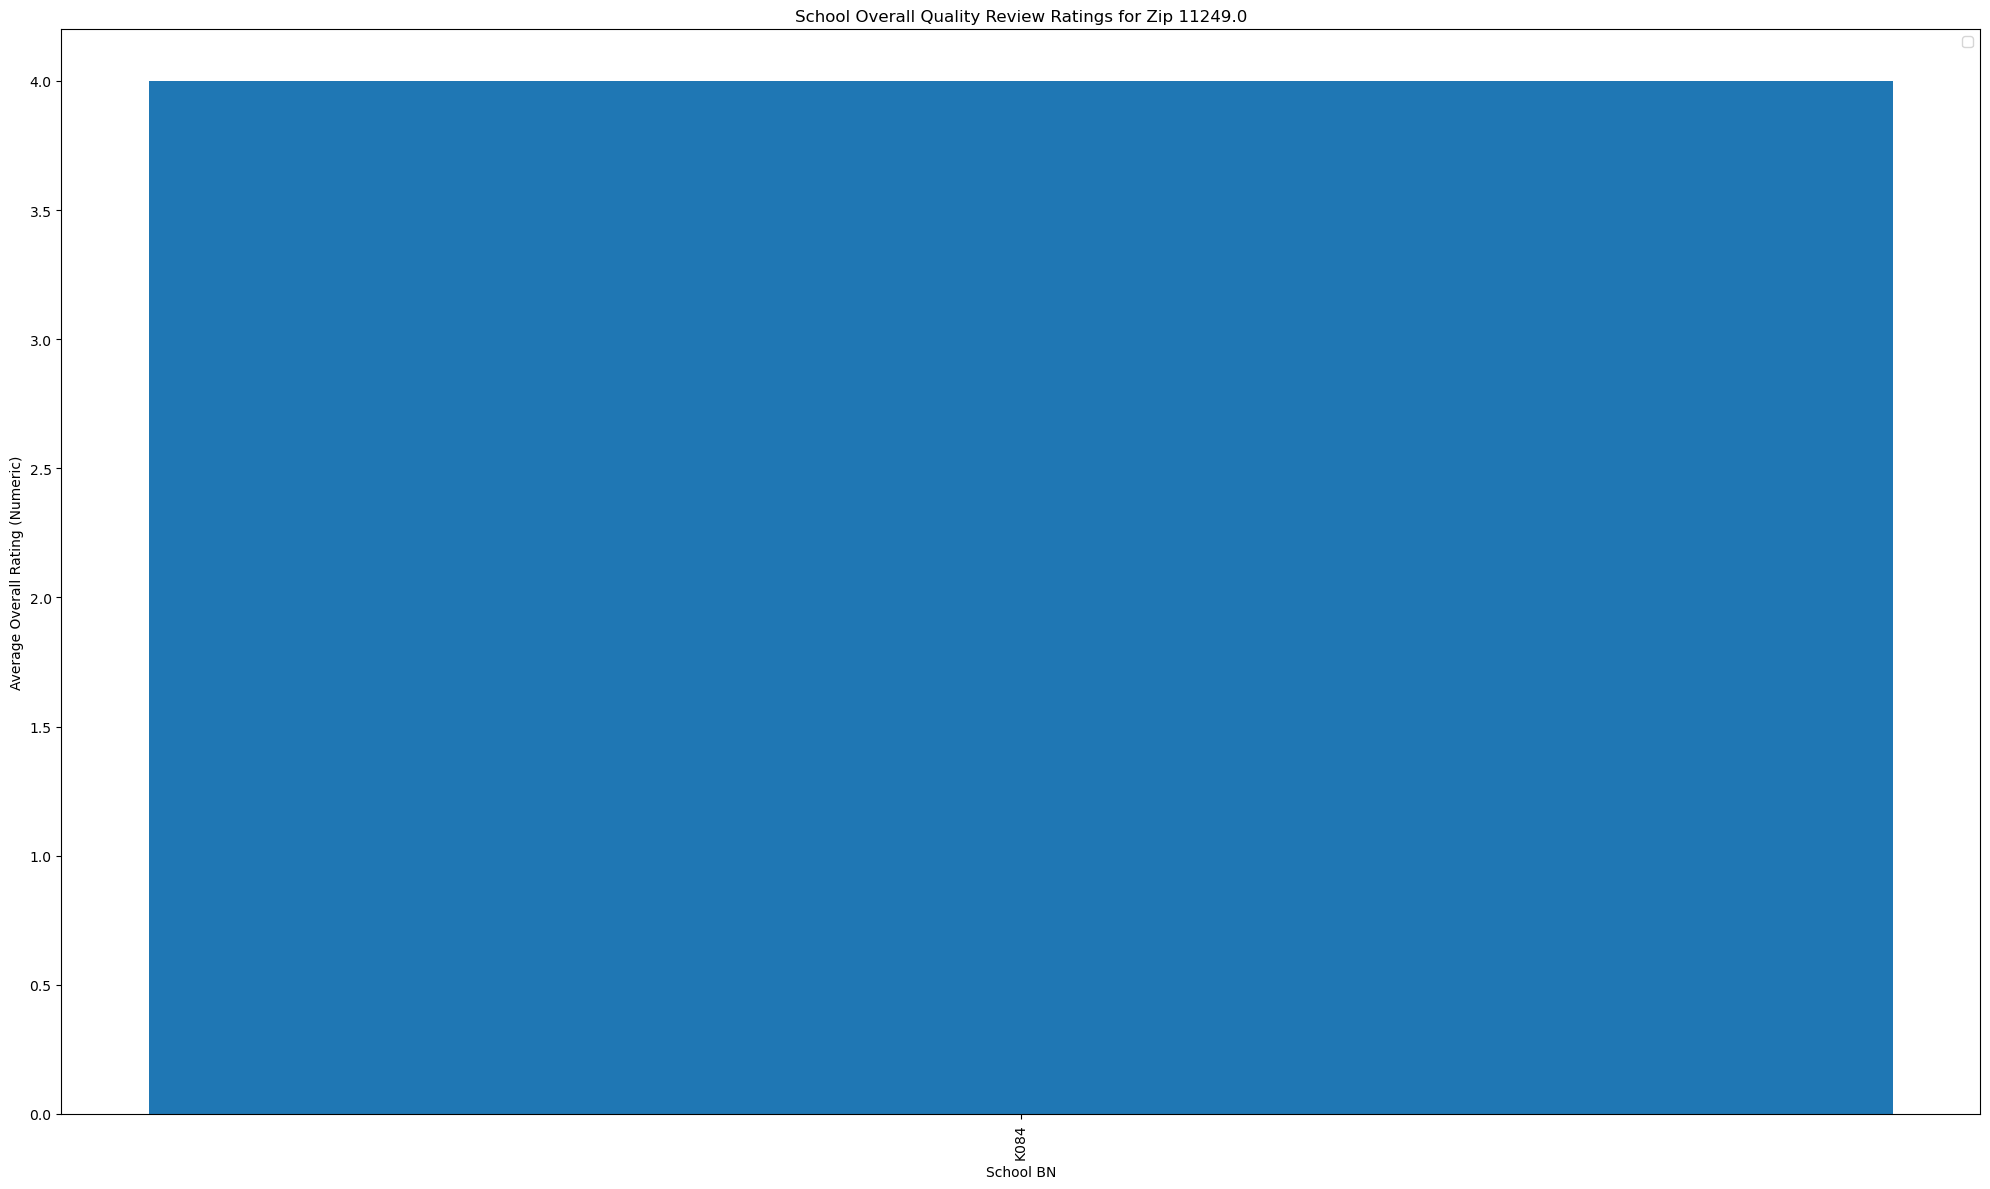

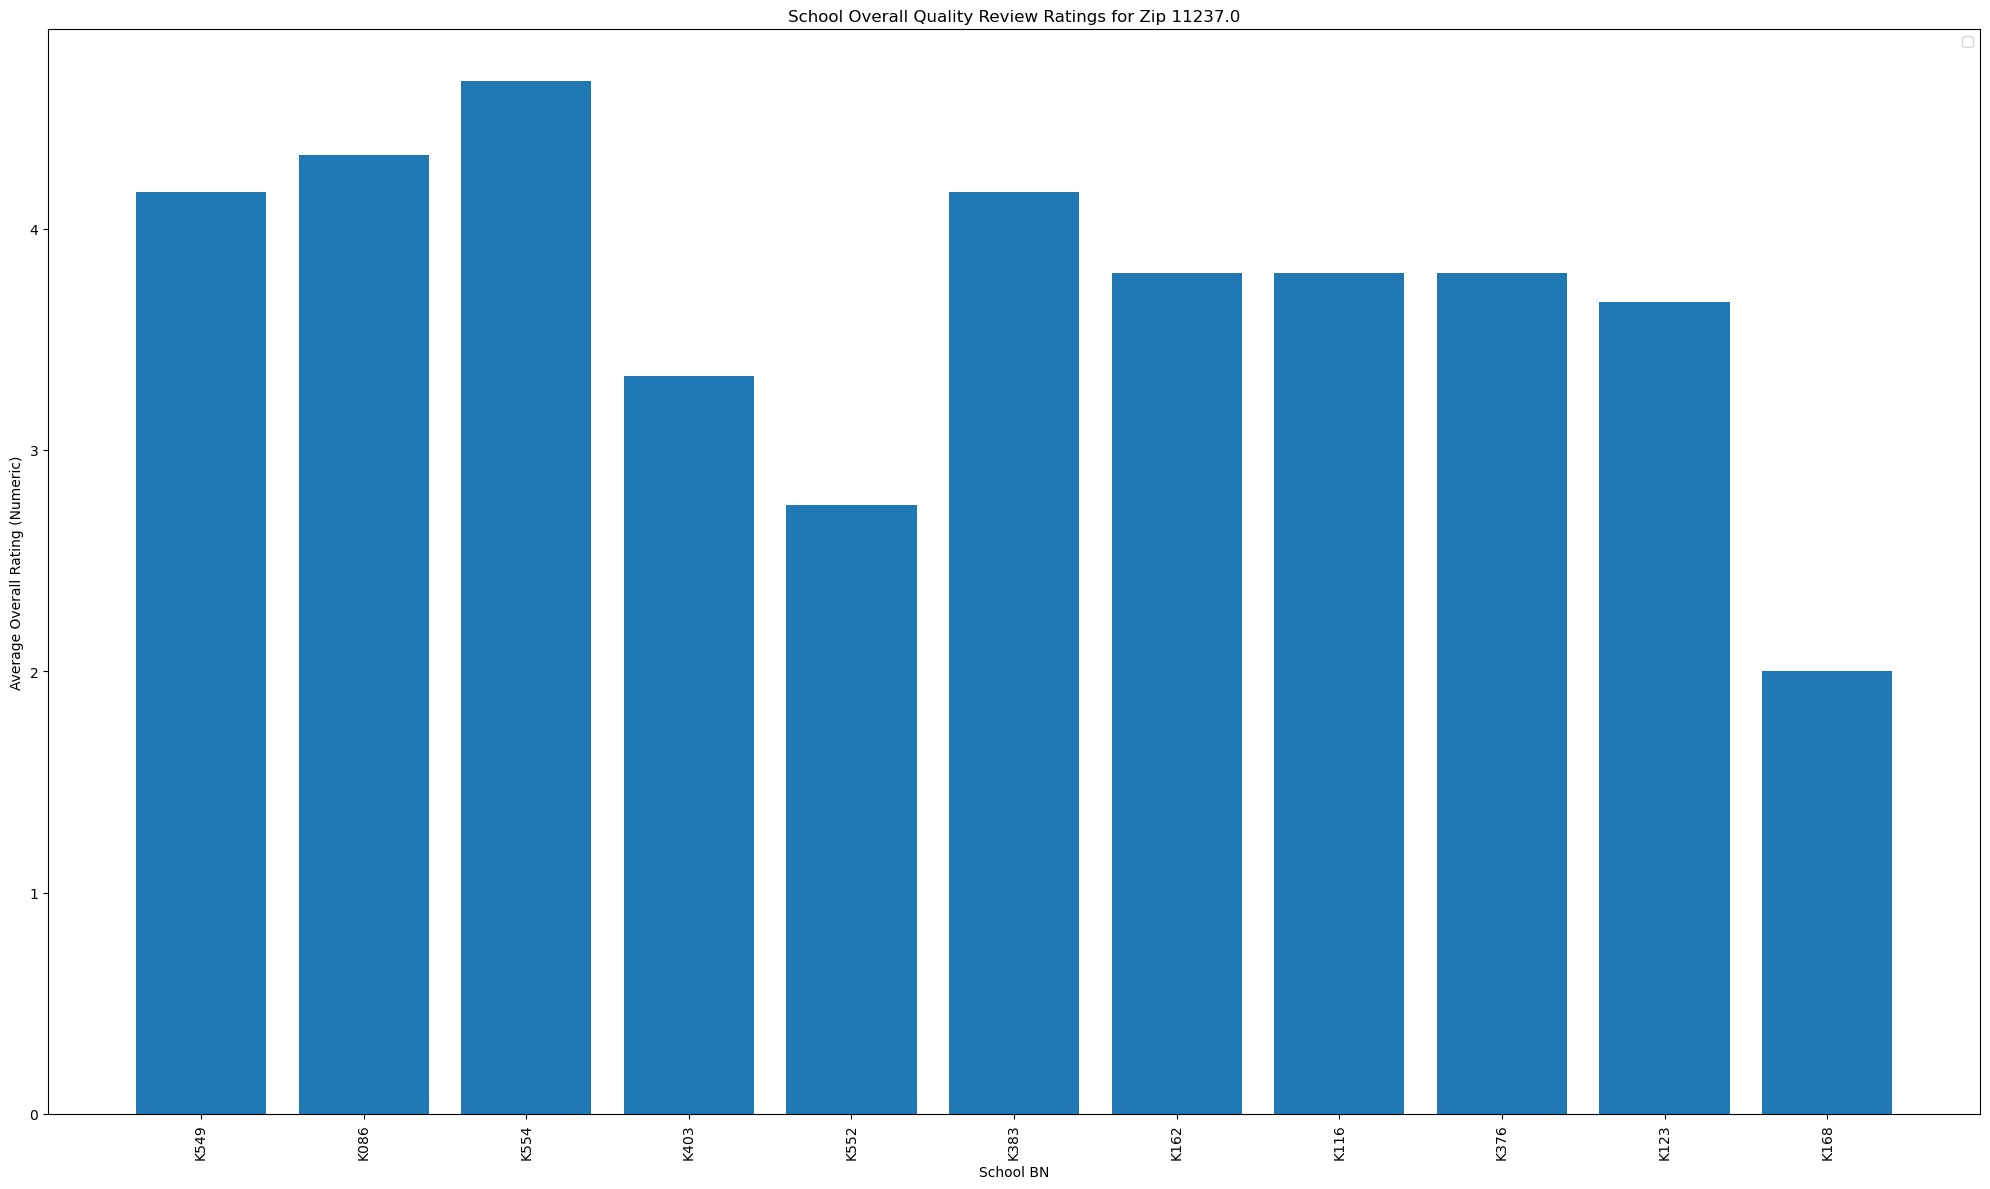

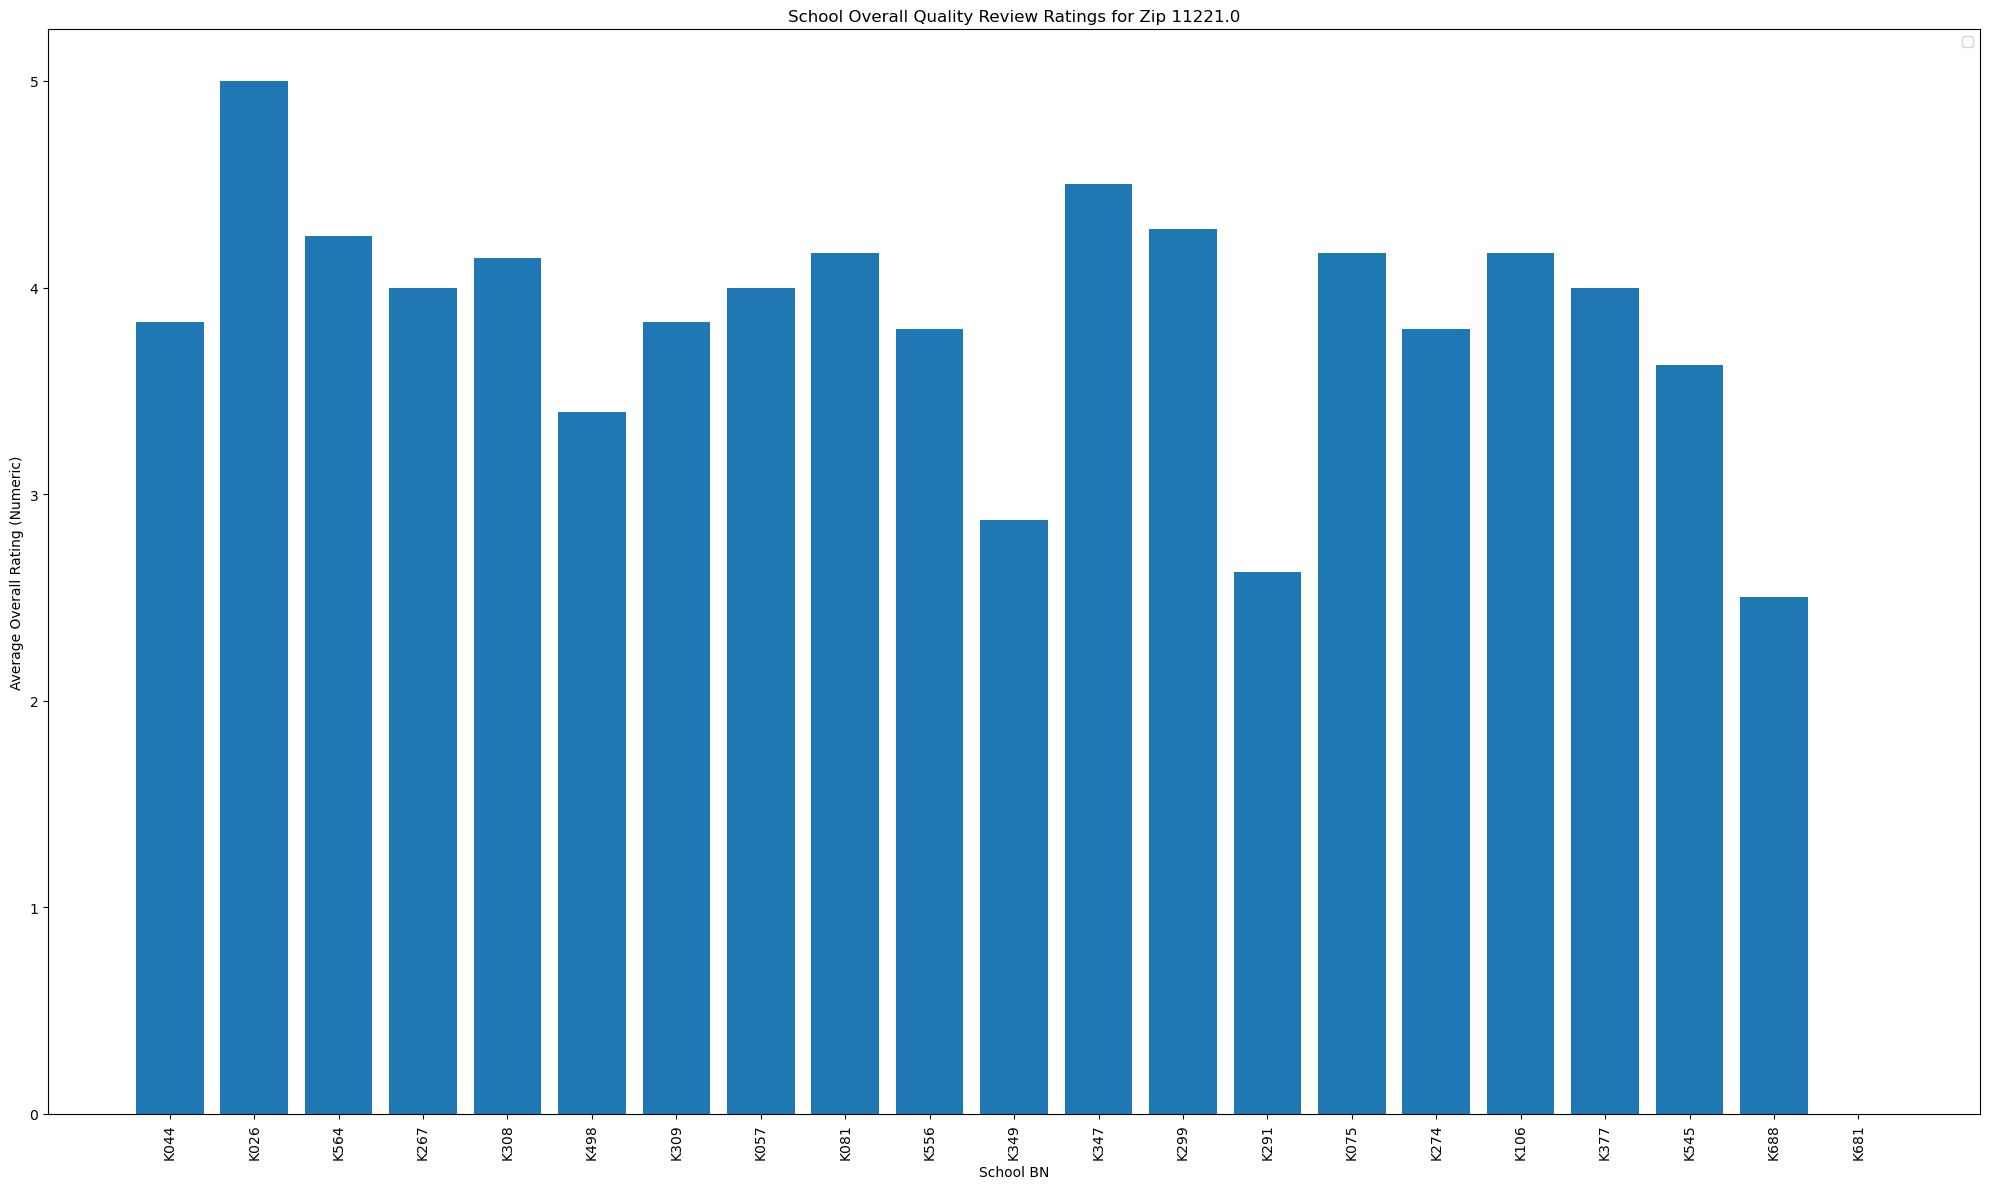

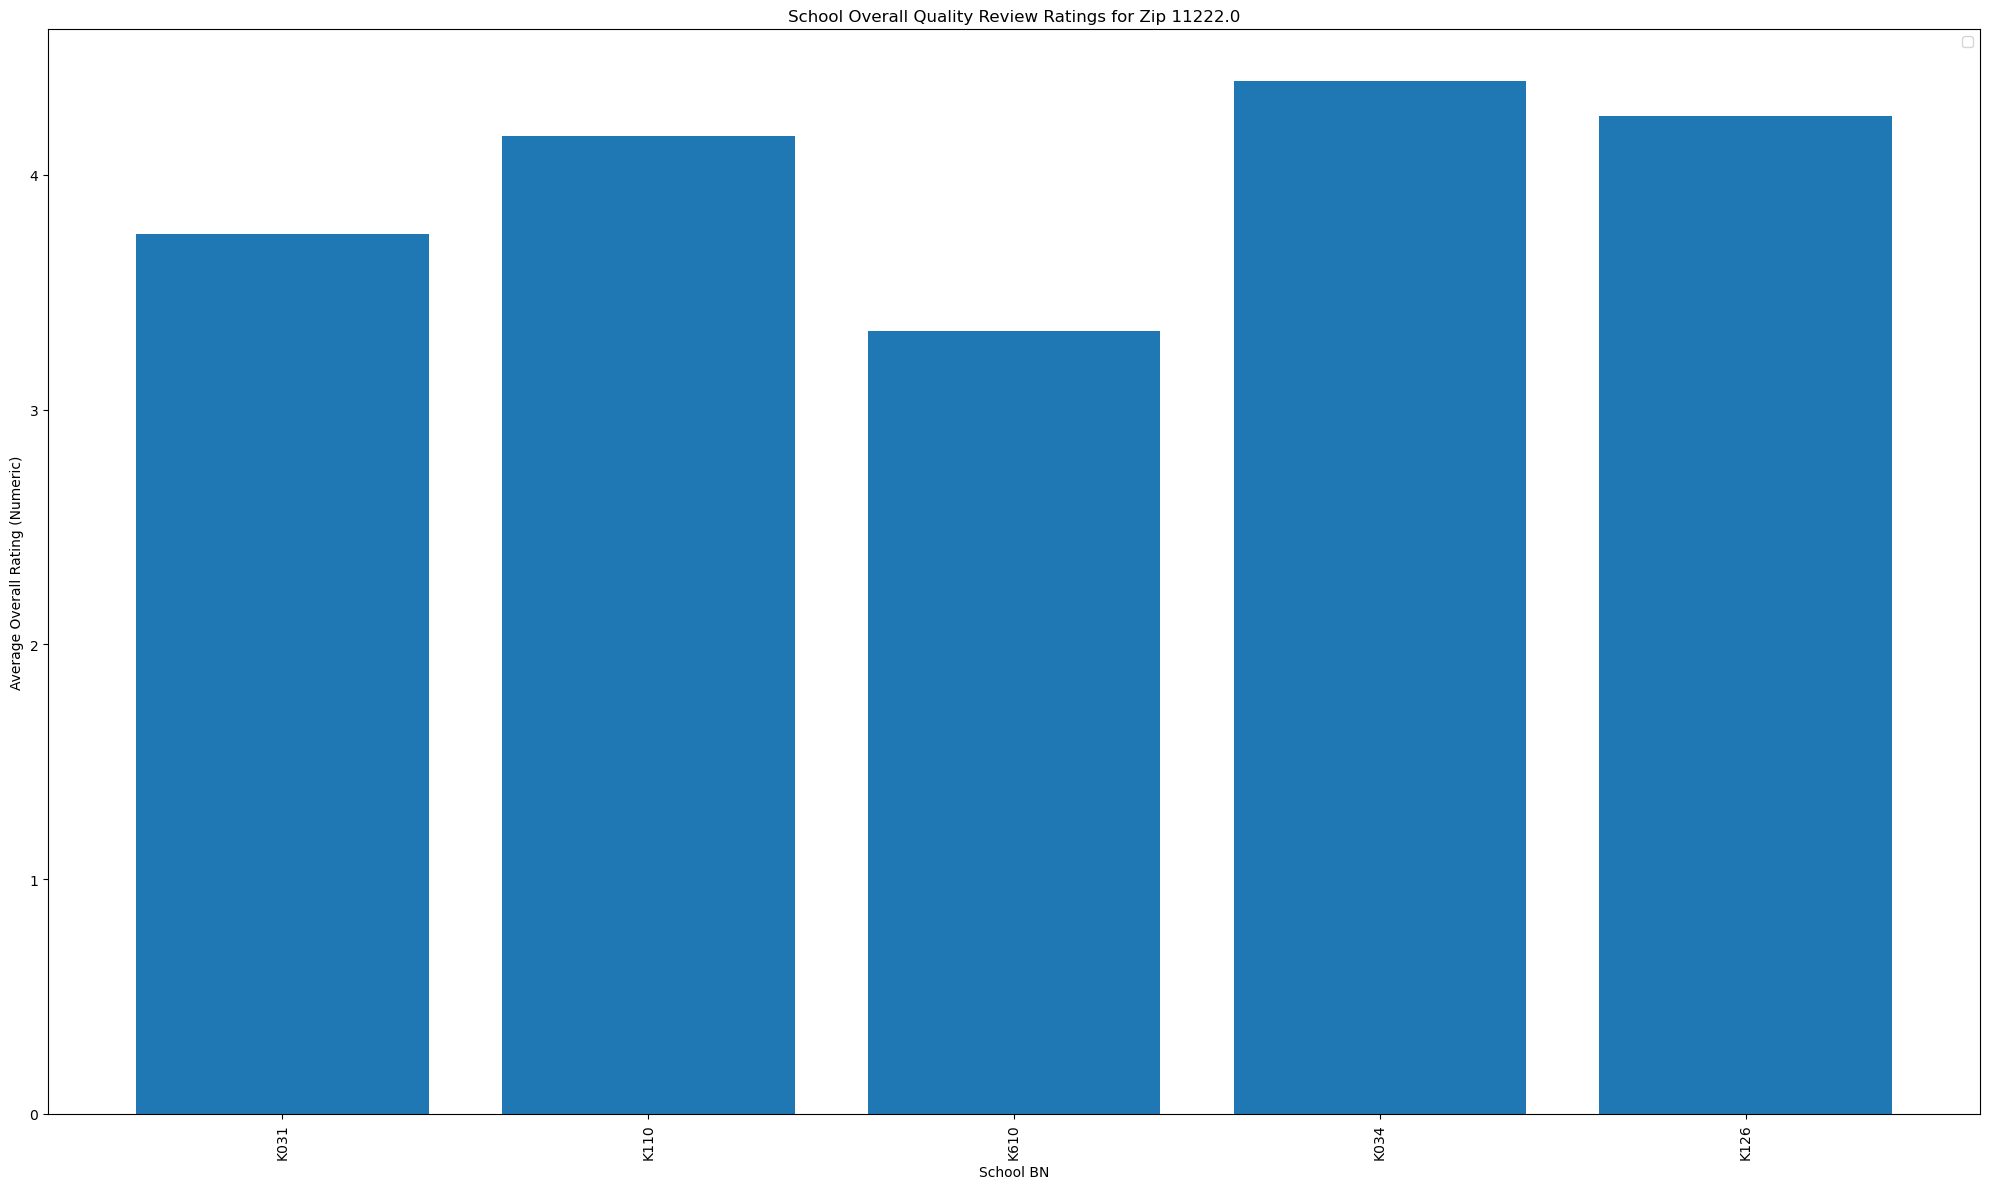

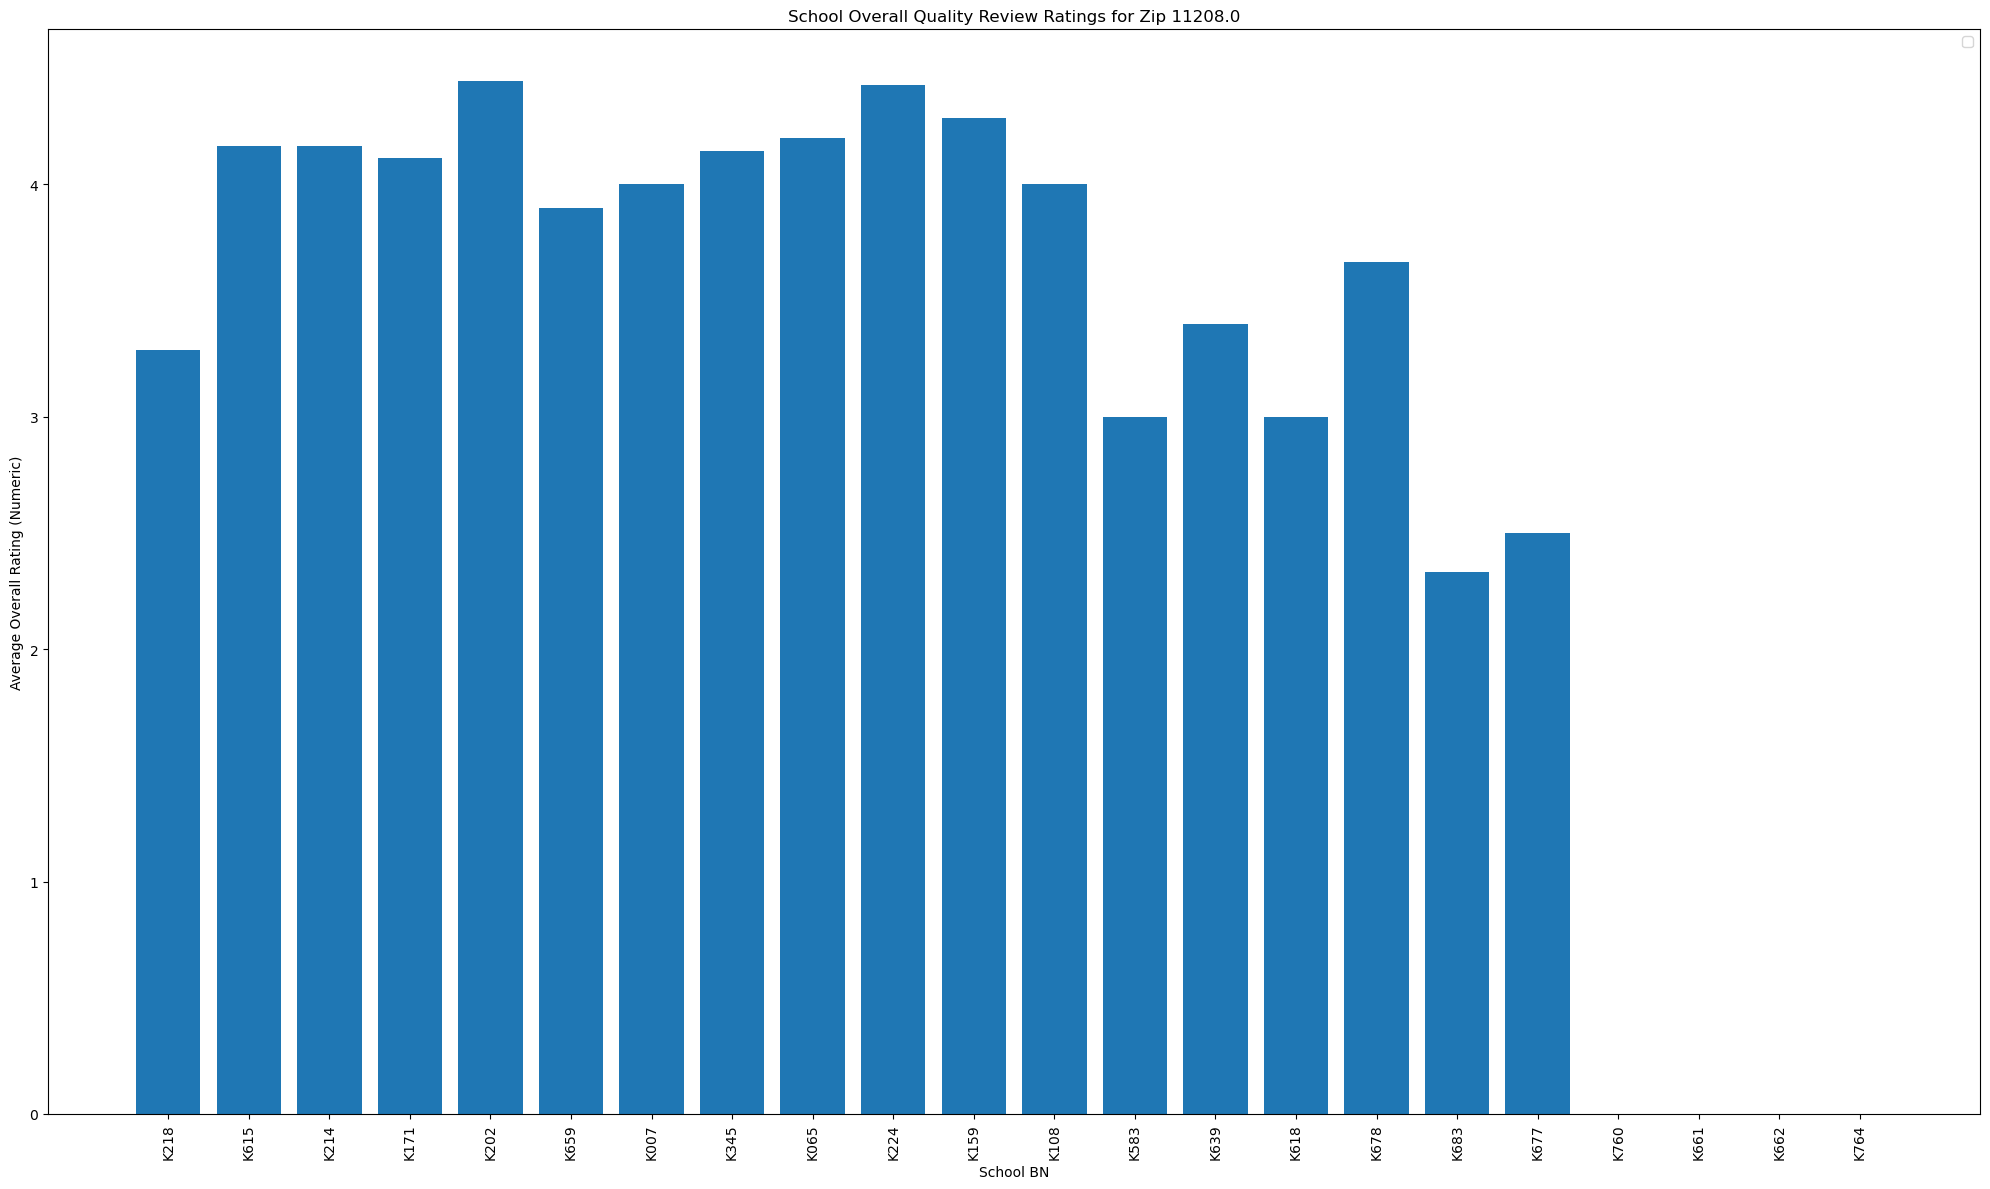

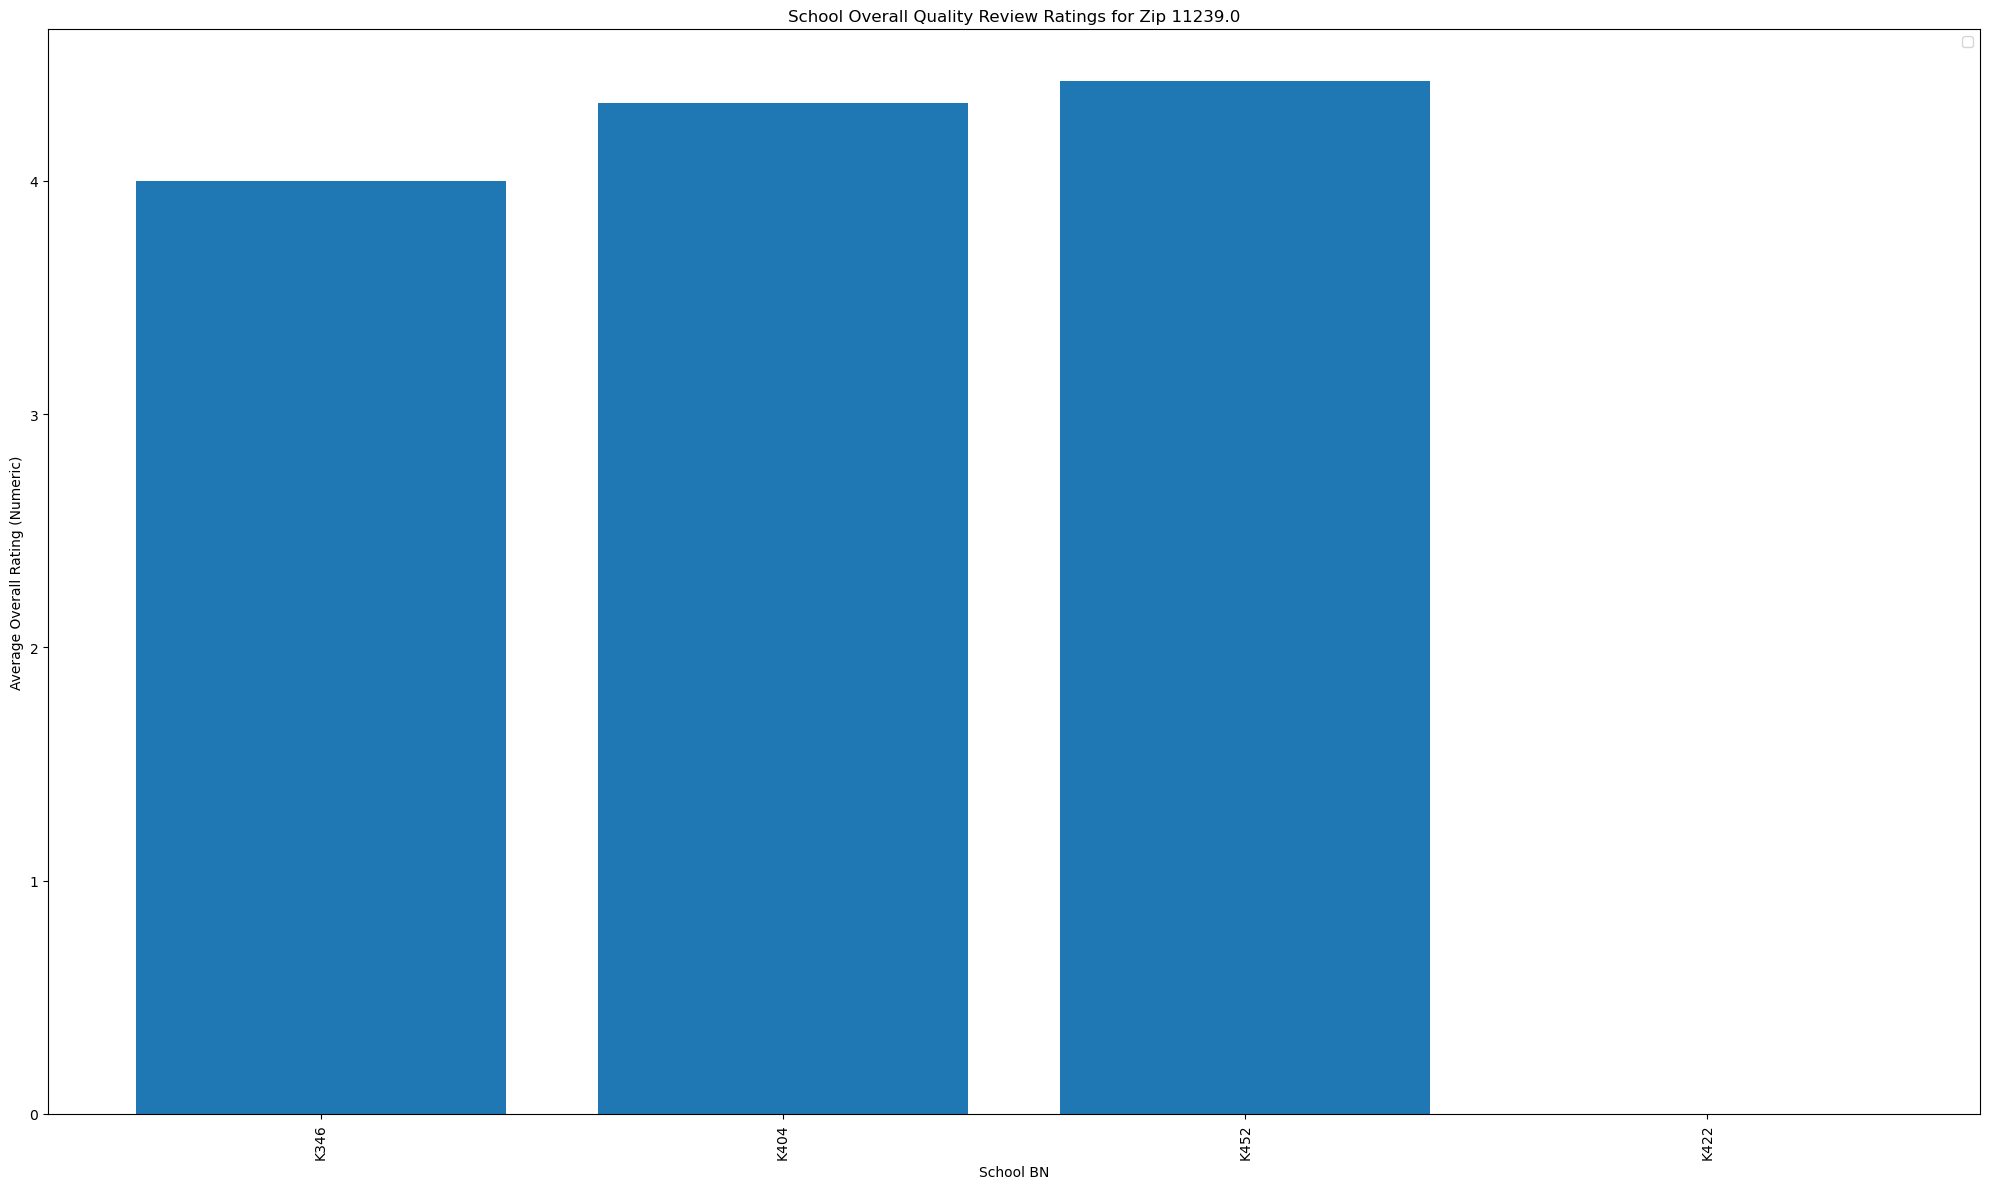

In [ ]:
K_avg_ratings = convert_to_avg_ratings(K_schools_dict)

#barplot_borough_schools_by_yr(K_schools_dict, school_location_df, 2020, ratings_rank)

# # # # SET THE Y AXIS LIMIT TO 0-8 FOR ALL PLOTS TO STANDARDIZE ACROSS ALL BOROUGHS AND LOCATIONS # # # # #

barplot_borough_avgs_by_location(K_avg_ratings, school_location_df, 'Zip')


'''
 NEXT STEPS: 
    1. Incorporate the function that calls yr, to set up barplots that show avg ratings by location for each yr
    2. Study Tableau to see how to visualize time series data better
    3. Create final visualizations for presentation
    
'''




In [ ]:
school_location_df[school_location_df['bn'] == 'K337']['Zip']

1009    11214
Name: Zip, dtype: int64

# Data Analysis:

In [ ]:
# 1,766 schools total
all_grouped.describe()

,data_pts,missing_overall_rating,first_review_date,last_review_date
count,1767.000000,1767.000000,1766,1766
mean,5.098472,1.799660,2008-03-22 19:43:08.901472256,2017-03-26 19:30:55.039637504
min,1.000000,0.000000,2006-04-05 00:00:00,2006-05-24 00:00:00
25%,4.000000,2.000000,2006-12-10 00:00:00,2016-12-08 00:00:00
50%,5.000000,2.000000,2007-03-15 00:00:00,2017-11-10 00:00:00
75%,6.000000,2.000000,2007-05-24 00:00:00,2018-11-17 00:00:00
max,12.000000,4.000000,2020-02-07 00:00:00,2020-03-14 00:00:00
std,1.938007,0.710335,NaN,NaN


In [ ]:
totally_missing = all_grouped.loc[all_grouped['data_pts'] == all_grouped['missing_overall_rating']]

# 133 schools missing all of their overall_rating data
totally_missing.sample(10)

,data_pts,missing_overall_rating,first_review_date,last_review_date
bn,,,,
Q376,1,1,2019-03-30,2019-03-30
X555,2,2,2015-05-13,2019-01-25
X361,2,2,2014-11-26,2019-02-09
K839,2,2,2016-05-15,2018-03-16
K630,2,2,2015-05-20,2016-10-22
Q243,2,2,2014-12-12,2017-01-14
X264,2,2,2015-05-24,2019-05-04
Q329,2,2,2015-05-13,2019-05-12
X594,1,1,2020-01-16,2020-01-16


In [ ]:
print(results_df[results_df['overall_rating'] == 'No Data'].shape)
grouped_df = results_df[results_df['overall_rating'] == 'No Data'].groupby('bn')['overall_rating', ].count().reset_index()
print(grouped_df.shape)
grouped_df.sample(20)

(3180, 47)
(1641, 2)


,bn,overall_rating
1563,X455,2
1375,X169,2
141,K177,2
1367,X154,3
1604,X544,2
215,K261,2
1421,X244,2
201,K243,2
803,M751,1
557,M124,2


In [ ]:
results_df[['bn', 'start_date_converted', 'overall_rating']][results_df['bn'] == 'X381']

,bn,start_date_converted,overall_rating
3448,X381,2009-12-16,P
4164,X381,2011-03-25,D
6663,X381,2015-04-01,No Data
7664,X381,2016-12-17,No Data


In [ ]:
results_df[~results_df['bn'].str.isalnum()]

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5,start_date_converted,dt_school_year
9008,All Quality Review Ratings from 2005 to 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
results_df['overall_rating'].unique()

array(['P', 'WD', 'U', 'DYO', 'UPF', 'O', 'D', 'UD', 'No Data', nan],
      dtype=object)

# Exporting Cleaned Data:

In [ ]:
# turning results_df into a new .csv file with cleaned data
results_df.to_csv('cleaned_data/QualityReviewRatings_Cleaned.csv', index=False)